# GAN example

In [13]:
# import necessary packages

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import LeakyReLU, Reshape, Conv2DTranspose, UpSampling2D

import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random

In [2]:
noise_dim = 100 

In [3]:
# creating the dataset of real images
size = 32

def create_images_vert(num):
    samples = []
    for i in range(num):
        sample = np.zeros((size,size,1))
        for _ in range(10):
            x0 = random.randrange(5,size-5)
            sample = cv2.line(sample,(x0,0),(x0,size-1),(255,255,255),1)
#         sample = cv2.GaussianBlur(sample,ksize=(5,5),sigmaX=100,sigmaY=100)
#         sample = np.expand_dims(sample,axis=2)
        samples.append(sample)
    return samples

def create_images_diag(num):
    samples = []
    for i in range(num):
        sample = np.zeros((size,size,1))
        for _ in range(3):
            x0 = random.randrange(-size/2,size/2)
            sample = cv2.line(sample,(x0,0),(x0+32,32),(255,255,255),2)
        sample = cv2.GaussianBlur(sample,ksize=(5,5),sigmaX=100,sigmaY=100)
        sample = np.expand_dims(sample,axis=2)
        samples.append(sample)
    return samples

def load_images(dir):
    samples = []
    for image_file in os.listdir(dir):
        if image_file.endswith("jpg"):
            sample = cv2.imread(f"{dir}/{image_file}")
            sample = cv2.resize(sample, (32,32))
            sample = cv2.cvtColor(sample, cv2.COLOR_BGR2GRAY)
            sample = np.expand_dims(sample,axis=2)
            samples.append(sample)
    return samples

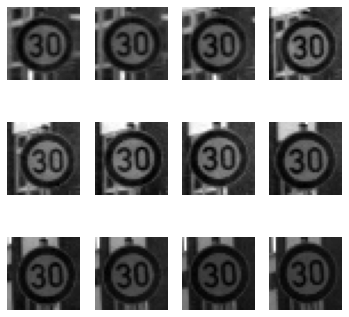

In [4]:
#samples = create_images_diag(1000)
#samples = create_images_vert(1000)
samples = load_images('signs')
samples = np.array(samples)
samples = samples/255

plt.figure(figsize=(6, 6))
for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(samples[i][:,:,0],cmap='gray')
    #plt.title(labels[i])
    plt.axis("off")

In [23]:
# Generator gets a noise vector of size noise_dim and generates an image of size (32 x 32 x 1)
# Our aim: we want the image to be as similar to real images (generated above) as possible
def make_generator_model():
    model = Sequential()
    model.add(Dense(8*8*256, use_bias=False, input_shape=(noise_dim,)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Reshape((8, 8, 256)))

    model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', use_bias=False)) 
    
    #model.add(Conv2DTranspose(128, (3, 3), strides=(1, 1), padding='same', use_bias=False)) 
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    #model.add(Dropout(0.3))
    # output: 8 x 8 x 128

    model.add(UpSampling2D(size=(2, 2), data_format=None, interpolation="nearest"))
    model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', use_bias=False))
    #model.add(Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    #model.add(Dropout(0.3))
    # output: 16 x 16 x 64

    model.add(UpSampling2D(size=(2, 2), data_format=None, interpolation="nearest"))
    model.add(Conv2D(1, (3, 3), strides=(1, 1), padding='same', use_bias=False, activation='sigmoid'))
    #model.add(Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    #model.add(Conv2DTranspose(1, (3, 3), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    # output: 32 x 32 x 1 (our image)

    model.summary()
    return model




def make_generator_model_1():
    model = Sequential()
    model.add(Dense(8*8*256, use_bias=False, input_shape=(noise_dim,)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Reshape((8, 8, 256)))

    model.add(Conv2DTranspose(128, (3, 3), strides=(1, 1), padding='same', use_bias=False)) 
    
    #model.add(Conv2DTranspose(128, (3, 3), strides=(1, 1), padding='same', use_bias=False)) 
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    #model.add(Dropout(0.3))
    # output: 8 x 8 x 128

    
    model.add(Conv2DTranspose(64, (3, 3), strides=(1, 1), padding='same', use_bias=False))
    model.add(UpSampling2D(size=(2, 2), data_format=None, interpolation="nearest"))
    #model.add(Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    #model.add(Dropout(0.3))
    # output: 16 x 16 x 64

    model.add(Conv2DTranspose(1, (3, 3), strides=(1, 1), padding='same', use_bias=False, activation='sigmoid'))
    model.add(UpSampling2D(size=(2, 2), data_format=None, interpolation="nearest"))
    #model.add(Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    #model.add(Conv2DTranspose(1, (3, 3), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    # output: 32 x 32 x 1 (our image)

    model.summary()
    return model




def make_generator_model_org():
    model = Sequential()
    model.add(Dense(8*8*256, use_bias=False, input_shape=(noise_dim,)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Reshape((8, 8, 256)))

    model.add(Conv2DTranspose(128, (3, 3), strides=(1, 1), padding='same', use_bias=False)) 
    #model.add(Conv2DTranspose(128, (3, 3), strides=(1, 1), padding='same', use_bias=False)) 
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    #model.add(Dropout(0.3))
    # output: 8 x 8 x 128

    
    model.add(Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', use_bias=False))
    #model.add(Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    #model.add(Dropout(0.3))
    # output: 16 x 16 x 64

    model.add(Conv2DTranspose(1, (3, 3), strides=(2, 2), padding='same', use_bias=False, activation='sigmoid'))
    #model.add(Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    #model.add(Conv2DTranspose(1, (3, 3), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    # output: 32 x 32 x 1 (our image)

    model.summary()
    return model

generator = make_generator_model()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16384)             1638400   
_________________________________________________________________
batch_normalization_9 (Batch (None, 16384)             65536     
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 16384)             0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         294912    
_________________________________________________________________
batch_normalization_10 (Batc (None, 8, 8, 128)         512       
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 8, 8, 128)        

In [24]:
# Discriminator gets image of size (32 x 32 x 1) and decides if it is real or fake
# The result of the discriminator is used by generator to improve 'faking'

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[32, 32, 1]))
    model.add(LeakyReLU())
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(LeakyReLU())
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(1,activation='sigmoid'))
    #model.add(Dense(1))
    # output: one number 0-fake, 1-real
    model.summary()

    return model

discriminator = make_discriminator_model()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 16, 16, 64)        1664      
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)             

In [7]:
# returns randomly choosen n samples

def sample_from_dataset(n,samples):
    prev_numbers = []
    new_samples = []
    while len(new_samples)<n:
        number = random.randrange(len(samples))
        if number in prev_numbers: continue
        prev_numbers.append(number)
        new_samples.append(samples[number])
    new_samples = np.array(new_samples,dtype=float)    

    return new_samples

In [8]:
# training parameters
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)
#cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
cross_entropy = tf.keras.losses.BinaryCrossentropy()


In [31]:
from numpy.random import randn

def calc_ok(vct):
    ok = 0
    for x in vct: 
        if x>=0.5: 
            ok+=1 
    return ok

# The training step

#history = []
##@tf.function
def do_step(images):
    batch_size = len(images)
    images = np.array(images)
    # create random noise for generator
    input_noise = randn(batch_size * noise_dim)
    input_noise = input_noise.reshape(batch_size, noise_dim)
    input_noise = tf.convert_to_tensor(input_noise)
    #noise = tf.random.normal([batch_size, noise_dim])
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        # generate fake image using noise
        generated_images = generator(input_noise, training=True)
        # evaluate fake images
        fake_output = discriminator(generated_images, training=True)
        fake_acc = (batch_size-calc_ok(fake_output))/batch_size
        # generator want all images to be accepted (output=1)!
        gen_loss = cross_entropy(tf.ones_like(fake_output), fake_output)
        
        # evaluate real images
        real_output = discriminator(images, training=True)
        real_acc = calc_ok(real_output)/batch_size
        # discriminator wants to classify all real images as 1 and fake images as 0
        real_loss = cross_entropy(tf.ones_like(real_output), real_output)
        fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
        disc_loss = real_loss + fake_loss # sum up both losses

    # calculate how to change generator to minimze its loss
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables) # step 4. calculate the gradient of the losses
    # calculate how to change discriminator to minimze its loss
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    # update weights for both networks
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables)) # step 5. Apply the optimizers and update weights
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    print("Epoch",epoch+4000,'g_loss=',gen_loss.numpy(),'d_loss=',disc_loss.numpy(),"real_acc=",real_acc,"fake_acc=",fake_acc)
    history.append([gen_loss.numpy(),disc_loss.numpy(),real_acc,fake_acc])
    

Epoch 4000 g_loss= 0.7294635 d_loss= 1.3879955 real_acc= 0.4 fake_acc= 0.72


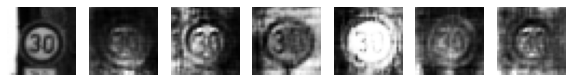

Epoch 4001 g_loss= 0.73796827 d_loss= 1.4040031 real_acc= 0.24 fake_acc= 0.66
Epoch 4002 g_loss= 0.76718277 d_loss= 1.384835 real_acc= 0.4 fake_acc= 0.76
Epoch 4003 g_loss= 0.7665492 d_loss= 1.4049816 real_acc= 0.36 fake_acc= 0.8
Epoch 4004 g_loss= 0.7526146 d_loss= 1.4473491 real_acc= 0.26 fake_acc= 0.8
Epoch 4005 g_loss= 0.7335892 d_loss= 1.4093218 real_acc= 0.38 fake_acc= 0.64
Epoch 4006 g_loss= 0.71079224 d_loss= 1.3996007 real_acc= 0.4 fake_acc= 0.54
Epoch 4007 g_loss= 0.71744066 d_loss= 1.3906195 real_acc= 0.48 fake_acc= 0.66
Epoch 4008 g_loss= 0.701501 d_loss= 1.3612747 real_acc= 0.62 fake_acc= 0.4
Epoch 4009 g_loss= 0.6832043 d_loss= 1.3863151 real_acc= 0.64 fake_acc= 0.44
Epoch 4010 g_loss= 0.7060302 d_loss= 1.3352971 real_acc= 0.68 fake_acc= 0.52


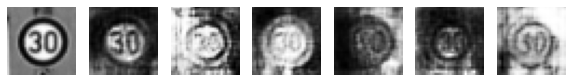

Epoch 4011 g_loss= 0.6751654 d_loss= 1.3996748 real_acc= 0.62 fake_acc= 0.38
Epoch 4012 g_loss= 0.677753 d_loss= 1.3827434 real_acc= 0.66 fake_acc= 0.42
Epoch 4013 g_loss= 0.6939599 d_loss= 1.3764181 real_acc= 0.64 fake_acc= 0.46
Epoch 4014 g_loss= 0.6937826 d_loss= 1.3767498 real_acc= 0.66 fake_acc= 0.5
Epoch 4015 g_loss= 0.7260807 d_loss= 1.3484424 real_acc= 0.56 fake_acc= 0.5
Epoch 4016 g_loss= 0.7676498 d_loss= 1.3287861 real_acc= 0.64 fake_acc= 0.72
Epoch 4017 g_loss= 0.7574939 d_loss= 1.3390155 real_acc= 0.56 fake_acc= 0.62
Epoch 4018 g_loss= 0.7777828 d_loss= 1.3209579 real_acc= 0.54 fake_acc= 0.7
Epoch 4019 g_loss= 0.7940548 d_loss= 1.3549488 real_acc= 0.36 fake_acc= 0.72
Epoch 4020 g_loss= 0.7806133 d_loss= 1.3605891 real_acc= 0.38 fake_acc= 0.72


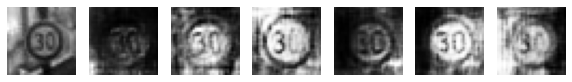

Epoch 4021 g_loss= 0.77796805 d_loss= 1.325602 real_acc= 0.54 fake_acc= 0.6
Epoch 4022 g_loss= 0.78053147 d_loss= 1.3449385 real_acc= 0.52 fake_acc= 0.62
Epoch 4023 g_loss= 0.76995337 d_loss= 1.3500862 real_acc= 0.5 fake_acc= 0.62
Epoch 4024 g_loss= 0.70421565 d_loss= 1.3599423 real_acc= 0.64 fake_acc= 0.46
Epoch 4025 g_loss= 0.7099329 d_loss= 1.3361135 real_acc= 0.82 fake_acc= 0.44
Epoch 4026 g_loss= 0.69112974 d_loss= 1.3612179 real_acc= 0.68 fake_acc= 0.44
Epoch 4027 g_loss= 0.68383634 d_loss= 1.3399259 real_acc= 0.78 fake_acc= 0.34
Epoch 4028 g_loss= 0.6820712 d_loss= 1.3611104 real_acc= 0.72 fake_acc= 0.34
Epoch 4029 g_loss= 0.6909378 d_loss= 1.3415139 real_acc= 0.82 fake_acc= 0.38
Epoch 4030 g_loss= 0.7116685 d_loss= 1.3096864 real_acc= 0.82 fake_acc= 0.42


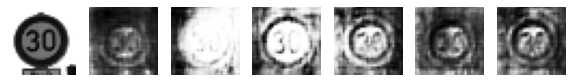

Epoch 4031 g_loss= 0.6970245 d_loss= 1.3200153 real_acc= 0.72 fake_acc= 0.46
Epoch 4032 g_loss= 0.72622526 d_loss= 1.2913435 real_acc= 0.84 fake_acc= 0.46
Epoch 4033 g_loss= 0.7402047 d_loss= 1.3075776 real_acc= 0.7 fake_acc= 0.54
Epoch 4034 g_loss= 0.74124664 d_loss= 1.3116509 real_acc= 0.62 fake_acc= 0.58
Epoch 4035 g_loss= 0.7801918 d_loss= 1.2991639 real_acc= 0.62 fake_acc= 0.8
Epoch 4036 g_loss= 0.7787691 d_loss= 1.3492699 real_acc= 0.5 fake_acc= 0.7
Epoch 4037 g_loss= 0.827113 d_loss= 1.3206477 real_acc= 0.44 fake_acc= 0.84
Epoch 4038 g_loss= 0.8096348 d_loss= 1.3422968 real_acc= 0.56 fake_acc= 0.9
Epoch 4039 g_loss= 0.82668173 d_loss= 1.3252134 real_acc= 0.38 fake_acc= 0.88
Epoch 4040 g_loss= 0.8356413 d_loss= 1.3472323 real_acc= 0.4 fake_acc= 0.86


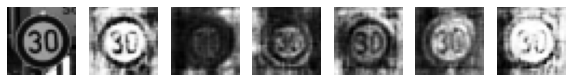

Epoch 4041 g_loss= 0.8095403 d_loss= 1.3278605 real_acc= 0.56 fake_acc= 0.8
Epoch 4042 g_loss= 0.7965578 d_loss= 1.3450369 real_acc= 0.46 fake_acc= 0.86
Epoch 4043 g_loss= 0.76545686 d_loss= 1.3145704 real_acc= 0.56 fake_acc= 0.66
Epoch 4044 g_loss= 0.7773217 d_loss= 1.3522425 real_acc= 0.46 fake_acc= 0.76
Epoch 4045 g_loss= 0.7414017 d_loss= 1.3671381 real_acc= 0.52 fake_acc= 0.6
Epoch 4046 g_loss= 0.70808244 d_loss= 1.3569894 real_acc= 0.68 fake_acc= 0.48
Epoch 4047 g_loss= 0.70823723 d_loss= 1.3571649 real_acc= 0.68 fake_acc= 0.56
Epoch 4048 g_loss= 0.69141597 d_loss= 1.3471029 real_acc= 0.68 fake_acc= 0.5
Epoch 4049 g_loss= 0.7052523 d_loss= 1.3514352 real_acc= 0.6 fake_acc= 0.5
Epoch 4050 g_loss= 0.6909068 d_loss= 1.3783929 real_acc= 0.6 fake_acc= 0.52


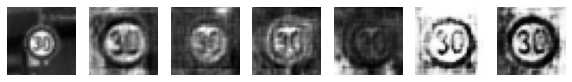

Epoch 4051 g_loss= 0.6930515 d_loss= 1.3770101 real_acc= 0.68 fake_acc= 0.52
Epoch 4052 g_loss= 0.7162178 d_loss= 1.3409755 real_acc= 0.68 fake_acc= 0.56
Epoch 4053 g_loss= 0.7162157 d_loss= 1.3459761 real_acc= 0.6 fake_acc= 0.58
Epoch 4054 g_loss= 0.73802024 d_loss= 1.3565648 real_acc= 0.5 fake_acc= 0.64
Epoch 4055 g_loss= 0.73098856 d_loss= 1.3966115 real_acc= 0.44 fake_acc= 0.58
Epoch 4056 g_loss= 0.7305061 d_loss= 1.3365884 real_acc= 0.64 fake_acc= 0.66
Epoch 4057 g_loss= 0.7425314 d_loss= 1.3402053 real_acc= 0.62 fake_acc= 0.7
Epoch 4058 g_loss= 0.75986695 d_loss= 1.3639569 real_acc= 0.44 fake_acc= 0.7
Epoch 4059 g_loss= 0.7341936 d_loss= 1.3622266 real_acc= 0.58 fake_acc= 0.6
Epoch 4060 g_loss= 0.72903496 d_loss= 1.3166902 real_acc= 0.68 fake_acc= 0.6


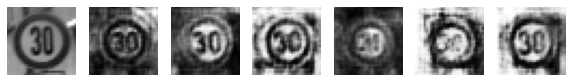

Epoch 4061 g_loss= 0.747439 d_loss= 1.302604 real_acc= 0.6 fake_acc= 0.7
Epoch 4062 g_loss= 0.7308884 d_loss= 1.3664219 real_acc= 0.52 fake_acc= 0.62
Epoch 4063 g_loss= 0.7553041 d_loss= 1.3417126 real_acc= 0.5 fake_acc= 0.76
Epoch 4064 g_loss= 0.7482627 d_loss= 1.320078 real_acc= 0.56 fake_acc= 0.72
Epoch 4065 g_loss= 0.7455156 d_loss= 1.3275888 real_acc= 0.56 fake_acc= 0.66
Epoch 4066 g_loss= 0.7564687 d_loss= 1.3415911 real_acc= 0.48 fake_acc= 0.68
Epoch 4067 g_loss= 0.75361395 d_loss= 1.3451648 real_acc= 0.42 fake_acc= 0.68
Epoch 4068 g_loss= 0.7809293 d_loss= 1.3219635 real_acc= 0.52 fake_acc= 0.72
Epoch 4069 g_loss= 0.7608838 d_loss= 1.3481212 real_acc= 0.4 fake_acc= 0.68
Epoch 4070 g_loss= 0.7494493 d_loss= 1.360055 real_acc= 0.42 fake_acc= 0.7


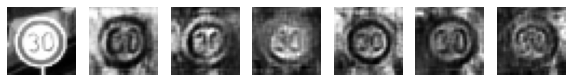

Epoch 4071 g_loss= 0.7620416 d_loss= 1.3344706 real_acc= 0.52 fake_acc= 0.7
Epoch 4072 g_loss= 0.74762344 d_loss= 1.3158729 real_acc= 0.62 fake_acc= 0.68
Epoch 4073 g_loss= 0.750078 d_loss= 1.3049126 real_acc= 0.62 fake_acc= 0.72
Epoch 4074 g_loss= 0.7613029 d_loss= 1.3638577 real_acc= 0.36 fake_acc= 0.74
Epoch 4075 g_loss= 0.75012153 d_loss= 1.3314538 real_acc= 0.56 fake_acc= 0.64
Epoch 4076 g_loss= 0.7511453 d_loss= 1.3520048 real_acc= 0.36 fake_acc= 0.7
Epoch 4077 g_loss= 0.7635757 d_loss= 1.3603706 real_acc= 0.44 fake_acc= 0.74
Epoch 4078 g_loss= 0.7306325 d_loss= 1.3319709 real_acc= 0.52 fake_acc= 0.6
Epoch 4079 g_loss= 0.73069453 d_loss= 1.3551577 real_acc= 0.48 fake_acc= 0.6
Epoch 4080 g_loss= 0.7354516 d_loss= 1.3725643 real_acc= 0.54 fake_acc= 0.6


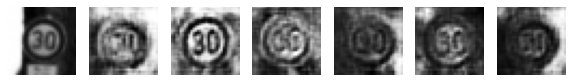

Epoch 4081 g_loss= 0.7188003 d_loss= 1.3454108 real_acc= 0.48 fake_acc= 0.6
Epoch 4082 g_loss= 0.7190826 d_loss= 1.3637979 real_acc= 0.48 fake_acc= 0.66
Epoch 4083 g_loss= 0.676465 d_loss= 1.3820269 real_acc= 0.62 fake_acc= 0.42
Epoch 4084 g_loss= 0.6877949 d_loss= 1.4062872 real_acc= 0.48 fake_acc= 0.46
Epoch 4085 g_loss= 0.70257926 d_loss= 1.3497281 real_acc= 0.6 fake_acc= 0.56
Epoch 4086 g_loss= 0.6912297 d_loss= 1.3887113 real_acc= 0.54 fake_acc= 0.62
Epoch 4087 g_loss= 0.6914068 d_loss= 1.385681 real_acc= 0.56 fake_acc= 0.56
Epoch 4088 g_loss= 0.705027 d_loss= 1.3794023 real_acc= 0.62 fake_acc= 0.56
Epoch 4089 g_loss= 0.6846163 d_loss= 1.4295462 real_acc= 0.54 fake_acc= 0.48
Epoch 4090 g_loss= 0.72481656 d_loss= 1.3808563 real_acc= 0.56 fake_acc= 0.62


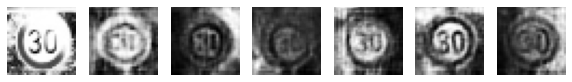

Epoch 4091 g_loss= 0.7016476 d_loss= 1.4128147 real_acc= 0.36 fake_acc= 0.56
Epoch 4092 g_loss= 0.70162195 d_loss= 1.4018697 real_acc= 0.4 fake_acc= 0.52
Epoch 4093 g_loss= 0.7129336 d_loss= 1.4259546 real_acc= 0.32 fake_acc= 0.52
Epoch 4094 g_loss= 0.70023316 d_loss= 1.3926528 real_acc= 0.44 fake_acc= 0.5
Epoch 4095 g_loss= 0.7001414 d_loss= 1.3980088 real_acc= 0.48 fake_acc= 0.54
Epoch 4096 g_loss= 0.7005215 d_loss= 1.3793142 real_acc= 0.54 fake_acc= 0.46
Epoch 4097 g_loss= 0.6751927 d_loss= 1.4465401 real_acc= 0.48 fake_acc= 0.44
Epoch 4098 g_loss= 0.70410466 d_loss= 1.3589163 real_acc= 0.6 fake_acc= 0.5
Epoch 4099 g_loss= 0.7013038 d_loss= 1.4079382 real_acc= 0.44 fake_acc= 0.48
Epoch 4100 g_loss= 0.721211 d_loss= 1.4349767 real_acc= 0.4 fake_acc= 0.62


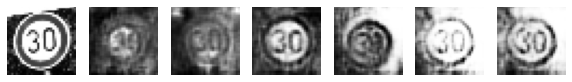

Epoch 4101 g_loss= 0.7242631 d_loss= 1.3866649 real_acc= 0.4 fake_acc= 0.6
Epoch 4102 g_loss= 0.7359758 d_loss= 1.4272594 real_acc= 0.34 fake_acc= 0.58
Epoch 4103 g_loss= 0.6949199 d_loss= 1.3860095 real_acc= 0.52 fake_acc= 0.48
Epoch 4104 g_loss= 0.68931234 d_loss= 1.4070733 real_acc= 0.56 fake_acc= 0.46
Epoch 4105 g_loss= 0.67043906 d_loss= 1.4096556 real_acc= 0.64 fake_acc= 0.32
Epoch 4106 g_loss= 0.66402024 d_loss= 1.3826137 real_acc= 0.66 fake_acc= 0.36
Epoch 4107 g_loss= 0.6784195 d_loss= 1.4138641 real_acc= 0.56 fake_acc= 0.4
Epoch 4108 g_loss= 0.6991102 d_loss= 1.3384914 real_acc= 0.66 fake_acc= 0.44
Epoch 4109 g_loss= 0.70086694 d_loss= 1.3951523 real_acc= 0.54 fake_acc= 0.4
Epoch 4110 g_loss= 0.7040336 d_loss= 1.4362984 real_acc= 0.48 fake_acc= 0.44


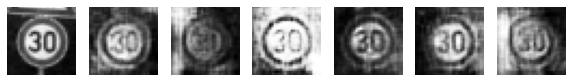

Epoch 4111 g_loss= 0.6998653 d_loss= 1.3882697 real_acc= 0.62 fake_acc= 0.42
Epoch 4112 g_loss= 0.7161075 d_loss= 1.391143 real_acc= 0.58 fake_acc= 0.5
Epoch 4113 g_loss= 0.6909381 d_loss= 1.3659072 real_acc= 0.66 fake_acc= 0.42
Epoch 4114 g_loss= 0.6991657 d_loss= 1.4025137 real_acc= 0.54 fake_acc= 0.46
Epoch 4115 g_loss= 0.709811 d_loss= 1.4092872 real_acc= 0.54 fake_acc= 0.4
Epoch 4116 g_loss= 0.6783538 d_loss= 1.390387 real_acc= 0.68 fake_acc= 0.46
Epoch 4117 g_loss= 0.7085024 d_loss= 1.3733315 real_acc= 0.68 fake_acc= 0.48
Epoch 4118 g_loss= 0.67316246 d_loss= 1.3866534 real_acc= 0.64 fake_acc= 0.42
Epoch 4119 g_loss= 0.717352 d_loss= 1.3721198 real_acc= 0.6 fake_acc= 0.52
Epoch 4120 g_loss= 0.69559777 d_loss= 1.3818119 real_acc= 0.58 fake_acc= 0.38


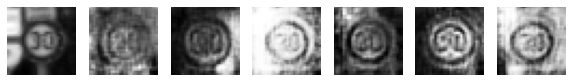

Epoch 4121 g_loss= 0.7069013 d_loss= 1.377159 real_acc= 0.62 fake_acc= 0.46
Epoch 4122 g_loss= 0.73617464 d_loss= 1.3533993 real_acc= 0.64 fake_acc= 0.6
Epoch 4123 g_loss= 0.750623 d_loss= 1.3996912 real_acc= 0.52 fake_acc= 0.5
Epoch 4124 g_loss= 0.7315274 d_loss= 1.3615516 real_acc= 0.56 fake_acc= 0.56
Epoch 4125 g_loss= 0.74010116 d_loss= 1.3942846 real_acc= 0.46 fake_acc= 0.56
Epoch 4126 g_loss= 0.7328826 d_loss= 1.3357208 real_acc= 0.62 fake_acc= 0.52
Epoch 4127 g_loss= 0.705706 d_loss= 1.3701379 real_acc= 0.6 fake_acc= 0.5
Epoch 4128 g_loss= 0.70485246 d_loss= 1.3996494 real_acc= 0.6 fake_acc= 0.44
Epoch 4129 g_loss= 0.69794464 d_loss= 1.4048761 real_acc= 0.56 fake_acc= 0.4
Epoch 4130 g_loss= 0.67164177 d_loss= 1.4048772 real_acc= 0.56 fake_acc= 0.28


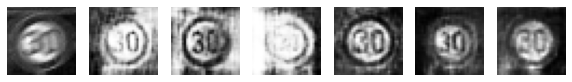

Epoch 4131 g_loss= 0.6521611 d_loss= 1.362176 real_acc= 0.82 fake_acc= 0.32
Epoch 4132 g_loss= 0.6689467 d_loss= 1.3764726 real_acc= 0.72 fake_acc= 0.36
Epoch 4133 g_loss= 0.66639906 d_loss= 1.3632705 real_acc= 0.82 fake_acc= 0.34
Epoch 4134 g_loss= 0.68429863 d_loss= 1.3884754 real_acc= 0.6 fake_acc= 0.44
Epoch 4135 g_loss= 0.6986131 d_loss= 1.3629034 real_acc= 0.66 fake_acc= 0.44
Epoch 4136 g_loss= 0.70133245 d_loss= 1.3644657 real_acc= 0.76 fake_acc= 0.44
Epoch 4137 g_loss= 0.67952317 d_loss= 1.3882637 real_acc= 0.6 fake_acc= 0.3
Epoch 4138 g_loss= 0.67612845 d_loss= 1.3671807 real_acc= 0.76 fake_acc= 0.34
Epoch 4139 g_loss= 0.68201005 d_loss= 1.3280113 real_acc= 0.82 fake_acc= 0.32
Epoch 4140 g_loss= 0.6732489 d_loss= 1.367871 real_acc= 0.62 fake_acc= 0.42


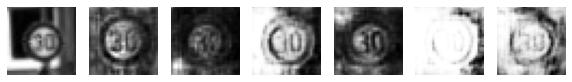

Epoch 4141 g_loss= 0.72770387 d_loss= 1.3503195 real_acc= 0.62 fake_acc= 0.52
Epoch 4142 g_loss= 0.7245042 d_loss= 1.3767209 real_acc= 0.44 fake_acc= 0.54
Epoch 4143 g_loss= 0.7094871 d_loss= 1.3762125 real_acc= 0.54 fake_acc= 0.48
Epoch 4144 g_loss= 0.72140115 d_loss= 1.3822362 real_acc= 0.5 fake_acc= 0.6
Epoch 4145 g_loss= 0.6985455 d_loss= 1.382555 real_acc= 0.58 fake_acc= 0.54
Epoch 4146 g_loss= 0.70855147 d_loss= 1.4121377 real_acc= 0.44 fake_acc= 0.58
Epoch 4147 g_loss= 0.7116664 d_loss= 1.3972809 real_acc= 0.44 fake_acc= 0.64
Epoch 4148 g_loss= 0.6895137 d_loss= 1.3712096 real_acc= 0.6 fake_acc= 0.48
Epoch 4149 g_loss= 0.68312943 d_loss= 1.4123211 real_acc= 0.48 fake_acc= 0.46
Epoch 4150 g_loss= 0.67857796 d_loss= 1.399807 real_acc= 0.48 fake_acc= 0.42


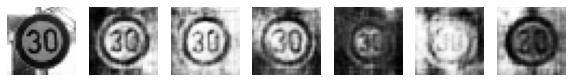

Epoch 4151 g_loss= 0.66355187 d_loss= 1.3722725 real_acc= 0.7 fake_acc= 0.36
Epoch 4152 g_loss= 0.6667566 d_loss= 1.3542615 real_acc= 0.68 fake_acc= 0.44
Epoch 4153 g_loss= 0.65798414 d_loss= 1.4024503 real_acc= 0.64 fake_acc= 0.36
Epoch 4154 g_loss= 0.6733777 d_loss= 1.3569119 real_acc= 0.68 fake_acc= 0.46
Epoch 4155 g_loss= 0.68880904 d_loss= 1.3738445 real_acc= 0.58 fake_acc= 0.54
Epoch 4156 g_loss= 0.7065726 d_loss= 1.3823729 real_acc= 0.46 fake_acc= 0.6
Epoch 4157 g_loss= 0.7085433 d_loss= 1.373239 real_acc= 0.46 fake_acc= 0.64
Epoch 4158 g_loss= 0.6976142 d_loss= 1.3836057 real_acc= 0.48 fake_acc= 0.52
Epoch 4159 g_loss= 0.7224502 d_loss= 1.3830786 real_acc= 0.46 fake_acc= 0.64
Epoch 4160 g_loss= 0.7533063 d_loss= 1.3610382 real_acc= 0.32 fake_acc= 0.82


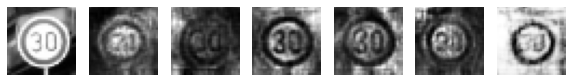

Epoch 4161 g_loss= 0.7523819 d_loss= 1.3656049 real_acc= 0.36 fake_acc= 0.72
Epoch 4162 g_loss= 0.7493695 d_loss= 1.374059 real_acc= 0.34 fake_acc= 0.78
Epoch 4163 g_loss= 0.75200224 d_loss= 1.3614285 real_acc= 0.3 fake_acc= 0.82
Epoch 4164 g_loss= 0.7421923 d_loss= 1.365633 real_acc= 0.4 fake_acc= 0.72
Epoch 4165 g_loss= 0.7528465 d_loss= 1.3382468 real_acc= 0.36 fake_acc= 0.76
Epoch 4166 g_loss= 0.7437144 d_loss= 1.3790307 real_acc= 0.3 fake_acc= 0.84
Epoch 4167 g_loss= 0.72303396 d_loss= 1.37601 real_acc= 0.44 fake_acc= 0.72
Epoch 4168 g_loss= 0.71232206 d_loss= 1.3889964 real_acc= 0.42 fake_acc= 0.64
Epoch 4169 g_loss= 0.74141645 d_loss= 1.3431416 real_acc= 0.48 fake_acc= 0.78
Epoch 4170 g_loss= 0.7260737 d_loss= 1.3306265 real_acc= 0.6 fake_acc= 0.72


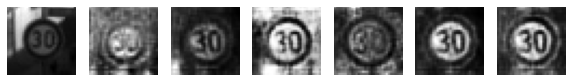

Epoch 4171 g_loss= 0.70795006 d_loss= 1.3872442 real_acc= 0.48 fake_acc= 0.66
Epoch 4172 g_loss= 0.71881086 d_loss= 1.3285825 real_acc= 0.64 fake_acc= 0.68
Epoch 4173 g_loss= 0.70788354 d_loss= 1.363488 real_acc= 0.54 fake_acc= 0.6
Epoch 4174 g_loss= 0.71727616 d_loss= 1.3969519 real_acc= 0.3 fake_acc= 0.66
Epoch 4175 g_loss= 0.7088425 d_loss= 1.3529565 real_acc= 0.56 fake_acc= 0.62
Epoch 4176 g_loss= 0.72451884 d_loss= 1.3496363 real_acc= 0.54 fake_acc= 0.7
Epoch 4177 g_loss= 0.7200746 d_loss= 1.3790479 real_acc= 0.4 fake_acc= 0.66
Epoch 4178 g_loss= 0.7321036 d_loss= 1.3637062 real_acc= 0.44 fake_acc= 0.7
Epoch 4179 g_loss= 0.7407194 d_loss= 1.341054 real_acc= 0.42 fake_acc= 0.8
Epoch 4180 g_loss= 0.7330822 d_loss= 1.3757416 real_acc= 0.4 fake_acc= 0.8


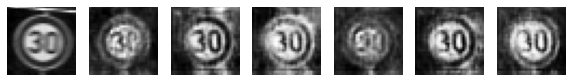

Epoch 4181 g_loss= 0.7370394 d_loss= 1.3588972 real_acc= 0.44 fake_acc= 0.7
Epoch 4182 g_loss= 0.7225408 d_loss= 1.3635542 real_acc= 0.44 fake_acc= 0.68
Epoch 4183 g_loss= 0.7241494 d_loss= 1.3439846 real_acc= 0.52 fake_acc= 0.68
Epoch 4184 g_loss= 0.7290371 d_loss= 1.3410964 real_acc= 0.48 fake_acc= 0.72
Epoch 4185 g_loss= 0.72181237 d_loss= 1.3684767 real_acc= 0.48 fake_acc= 0.76
Epoch 4186 g_loss= 0.7290274 d_loss= 1.3643675 real_acc= 0.4 fake_acc= 0.68
Epoch 4187 g_loss= 0.73412675 d_loss= 1.3591378 real_acc= 0.46 fake_acc= 0.76
Epoch 4188 g_loss= 0.75562865 d_loss= 1.33898 real_acc= 0.42 fake_acc= 0.78
Epoch 4189 g_loss= 0.7242214 d_loss= 1.3718891 real_acc= 0.42 fake_acc= 0.68
Epoch 4190 g_loss= 0.7592262 d_loss= 1.3496368 real_acc= 0.42 fake_acc= 0.84


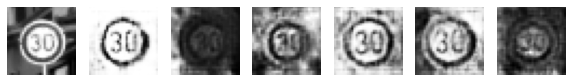

Epoch 4191 g_loss= 0.7377496 d_loss= 1.341966 real_acc= 0.58 fake_acc= 0.74
Epoch 4192 g_loss= 0.7250183 d_loss= 1.4004242 real_acc= 0.36 fake_acc= 0.62
Epoch 4193 g_loss= 0.75117856 d_loss= 1.3651831 real_acc= 0.44 fake_acc= 0.74
Epoch 4194 g_loss= 0.7074729 d_loss= 1.3583541 real_acc= 0.56 fake_acc= 0.54
Epoch 4195 g_loss= 0.7077893 d_loss= 1.3524598 real_acc= 0.6 fake_acc= 0.58
Epoch 4196 g_loss= 0.68274766 d_loss= 1.384443 real_acc= 0.6 fake_acc= 0.5
Epoch 4197 g_loss= 0.7101979 d_loss= 1.3326607 real_acc= 0.58 fake_acc= 0.52
Epoch 4198 g_loss= 0.7092061 d_loss= 1.3397514 real_acc= 0.48 fake_acc= 0.58
Epoch 4199 g_loss= 0.69754213 d_loss= 1.3755348 real_acc= 0.5 fake_acc= 0.44
Epoch 4200 g_loss= 0.7137611 d_loss= 1.3560121 real_acc= 0.56 fake_acc= 0.56


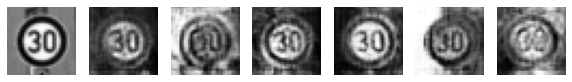

Epoch 4201 g_loss= 0.72517234 d_loss= 1.3457298 real_acc= 0.5 fake_acc= 0.64
Epoch 4202 g_loss= 0.72114533 d_loss= 1.3733592 real_acc= 0.48 fake_acc= 0.58
Epoch 4203 g_loss= 0.71774644 d_loss= 1.35696 real_acc= 0.48 fake_acc= 0.6
Epoch 4204 g_loss= 0.718935 d_loss= 1.3676522 real_acc= 0.46 fake_acc= 0.46
Epoch 4205 g_loss= 0.7277657 d_loss= 1.3703265 real_acc= 0.54 fake_acc= 0.7
Epoch 4206 g_loss= 0.74530846 d_loss= 1.3810232 real_acc= 0.38 fake_acc= 0.7
Epoch 4207 g_loss= 0.7349344 d_loss= 1.3685967 real_acc= 0.52 fake_acc= 0.6
Epoch 4208 g_loss= 0.74850917 d_loss= 1.364722 real_acc= 0.44 fake_acc= 0.7
Epoch 4209 g_loss= 0.7675029 d_loss= 1.355445 real_acc= 0.44 fake_acc= 0.76
Epoch 4210 g_loss= 0.72451216 d_loss= 1.3623219 real_acc= 0.5 fake_acc= 0.58


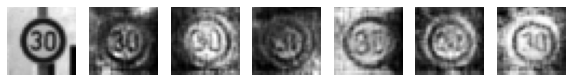

Epoch 4211 g_loss= 0.7413581 d_loss= 1.3716466 real_acc= 0.44 fake_acc= 0.66
Epoch 4212 g_loss= 0.71228564 d_loss= 1.3743405 real_acc= 0.48 fake_acc= 0.52
Epoch 4213 g_loss= 0.7370184 d_loss= 1.3466496 real_acc= 0.56 fake_acc= 0.62
Epoch 4214 g_loss= 0.6961695 d_loss= 1.3722875 real_acc= 0.64 fake_acc= 0.42
Epoch 4215 g_loss= 0.73592544 d_loss= 1.3477328 real_acc= 0.6 fake_acc= 0.6
Epoch 4216 g_loss= 0.7053748 d_loss= 1.4061499 real_acc= 0.52 fake_acc= 0.52
Epoch 4217 g_loss= 0.71942383 d_loss= 1.3578478 real_acc= 0.62 fake_acc= 0.54
Epoch 4218 g_loss= 0.70967406 d_loss= 1.3725582 real_acc= 0.62 fake_acc= 0.44
Epoch 4219 g_loss= 0.7068269 d_loss= 1.3832846 real_acc= 0.58 fake_acc= 0.56
Epoch 4220 g_loss= 0.6917813 d_loss= 1.386004 real_acc= 0.6 fake_acc= 0.38


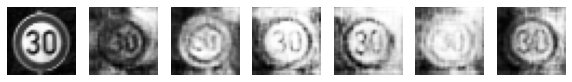

Epoch 4221 g_loss= 0.7011609 d_loss= 1.3616369 real_acc= 0.64 fake_acc= 0.46
Epoch 4222 g_loss= 0.69762284 d_loss= 1.373656 real_acc= 0.66 fake_acc= 0.44
Epoch 4223 g_loss= 0.7183415 d_loss= 1.3465283 real_acc= 0.56 fake_acc= 0.56
Epoch 4224 g_loss= 0.69376093 d_loss= 1.3513372 real_acc= 0.7 fake_acc= 0.44
Epoch 4225 g_loss= 0.7094673 d_loss= 1.3439835 real_acc= 0.66 fake_acc= 0.48
Epoch 4226 g_loss= 0.70640105 d_loss= 1.3809563 real_acc= 0.64 fake_acc= 0.54
Epoch 4227 g_loss= 0.722299 d_loss= 1.36974 real_acc= 0.56 fake_acc= 0.56
Epoch 4228 g_loss= 0.7159402 d_loss= 1.3528547 real_acc= 0.6 fake_acc= 0.6
Epoch 4229 g_loss= 0.71846026 d_loss= 1.3428322 real_acc= 0.66 fake_acc= 0.52
Epoch 4230 g_loss= 0.7067009 d_loss= 1.3934261 real_acc= 0.54 fake_acc= 0.48


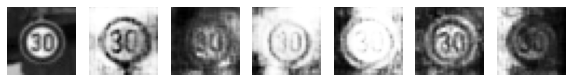

Epoch 4231 g_loss= 0.7055923 d_loss= 1.3551997 real_acc= 0.66 fake_acc= 0.46
Epoch 4232 g_loss= 0.71004456 d_loss= 1.3375638 real_acc= 0.68 fake_acc= 0.5
Epoch 4233 g_loss= 0.7154478 d_loss= 1.3434322 real_acc= 0.64 fake_acc= 0.52
Epoch 4234 g_loss= 0.71329546 d_loss= 1.3371155 real_acc= 0.66 fake_acc= 0.52
Epoch 4235 g_loss= 0.7176895 d_loss= 1.3365841 real_acc= 0.6 fake_acc= 0.54
Epoch 4236 g_loss= 0.718392 d_loss= 1.3359134 real_acc= 0.74 fake_acc= 0.46
Epoch 4237 g_loss= 0.71642 d_loss= 1.347631 real_acc= 0.7 fake_acc= 0.52
Epoch 4238 g_loss= 0.70874345 d_loss= 1.3737206 real_acc= 0.6 fake_acc= 0.56
Epoch 4239 g_loss= 0.709452 d_loss= 1.376693 real_acc= 0.56 fake_acc= 0.5
Epoch 4240 g_loss= 0.7115461 d_loss= 1.3378123 real_acc= 0.76 fake_acc= 0.46


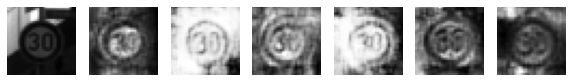

Epoch 4241 g_loss= 0.6767899 d_loss= 1.3508403 real_acc= 0.78 fake_acc= 0.38
Epoch 4242 g_loss= 0.69278437 d_loss= 1.3467073 real_acc= 0.74 fake_acc= 0.42
Epoch 4243 g_loss= 0.6843836 d_loss= 1.3454247 real_acc= 0.8 fake_acc= 0.36
Epoch 4244 g_loss= 0.6957405 d_loss= 1.3413069 real_acc= 0.72 fake_acc= 0.42
Epoch 4245 g_loss= 0.706115 d_loss= 1.334287 real_acc= 0.72 fake_acc= 0.46
Epoch 4246 g_loss= 0.6829485 d_loss= 1.3589014 real_acc= 0.7 fake_acc= 0.38
Epoch 4247 g_loss= 0.7320643 d_loss= 1.3199701 real_acc= 0.68 fake_acc= 0.58
Epoch 4248 g_loss= 0.72319436 d_loss= 1.3441603 real_acc= 0.68 fake_acc= 0.58
Epoch 4249 g_loss= 0.73567307 d_loss= 1.3279284 real_acc= 0.68 fake_acc= 0.54
Epoch 4250 g_loss= 0.7176194 d_loss= 1.3352895 real_acc= 0.66 fake_acc= 0.48


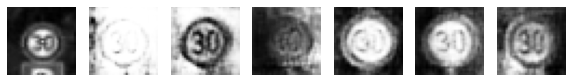

Epoch 4251 g_loss= 0.7457355 d_loss= 1.3547356 real_acc= 0.58 fake_acc= 0.6
Epoch 4252 g_loss= 0.74515235 d_loss= 1.3264546 real_acc= 0.56 fake_acc= 0.6
Epoch 4253 g_loss= 0.7265026 d_loss= 1.3363789 real_acc= 0.62 fake_acc= 0.5
Epoch 4254 g_loss= 0.71853375 d_loss= 1.3410518 real_acc= 0.54 fake_acc= 0.42
Epoch 4255 g_loss= 0.7263477 d_loss= 1.3459098 real_acc= 0.7 fake_acc= 0.44
Epoch 4256 g_loss= 0.7006288 d_loss= 1.3911741 real_acc= 0.48 fake_acc= 0.38
Epoch 4257 g_loss= 0.6827709 d_loss= 1.3470846 real_acc= 0.72 fake_acc= 0.34
Epoch 4258 g_loss= 0.6833125 d_loss= 1.369035 real_acc= 0.74 fake_acc= 0.34
Epoch 4259 g_loss= 0.67912465 d_loss= 1.3639826 real_acc= 0.66 fake_acc= 0.34
Epoch 4260 g_loss= 0.677737 d_loss= 1.3527792 real_acc= 0.7 fake_acc= 0.4


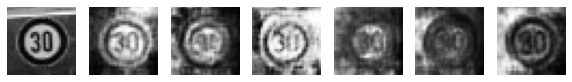

Epoch 4261 g_loss= 0.6644211 d_loss= 1.4047123 real_acc= 0.64 fake_acc= 0.38
Epoch 4262 g_loss= 0.65762466 d_loss= 1.374445 real_acc= 0.72 fake_acc= 0.46
Epoch 4263 g_loss= 0.6774528 d_loss= 1.3898817 real_acc= 0.68 fake_acc= 0.5
Epoch 4264 g_loss= 0.67845297 d_loss= 1.3983266 real_acc= 0.52 fake_acc= 0.44
Epoch 4265 g_loss= 0.6749908 d_loss= 1.3832469 real_acc= 0.64 fake_acc= 0.48
Epoch 4266 g_loss= 0.68299735 d_loss= 1.3957399 real_acc= 0.48 fake_acc= 0.42
Epoch 4267 g_loss= 0.6853926 d_loss= 1.3999603 real_acc= 0.54 fake_acc= 0.44
Epoch 4268 g_loss= 0.6804993 d_loss= 1.4088601 real_acc= 0.54 fake_acc= 0.52
Epoch 4269 g_loss= 0.6822829 d_loss= 1.4193318 real_acc= 0.34 fake_acc= 0.56
Epoch 4270 g_loss= 0.7131064 d_loss= 1.4038694 real_acc= 0.42 fake_acc= 0.58


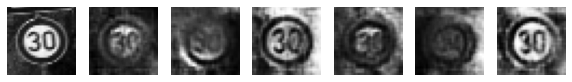

Epoch 4271 g_loss= 0.68347925 d_loss= 1.4093969 real_acc= 0.44 fake_acc= 0.62
Epoch 4272 g_loss= 0.71311516 d_loss= 1.4451728 real_acc= 0.3 fake_acc= 0.58
Epoch 4273 g_loss= 0.7068555 d_loss= 1.4522874 real_acc= 0.36 fake_acc= 0.62
Epoch 4274 g_loss= 0.7259541 d_loss= 1.4208816 real_acc= 0.3 fake_acc= 0.66
Epoch 4275 g_loss= 0.7080166 d_loss= 1.4390465 real_acc= 0.34 fake_acc= 0.54
Epoch 4276 g_loss= 0.68173903 d_loss= 1.4394366 real_acc= 0.44 fake_acc= 0.52
Epoch 4277 g_loss= 0.69803727 d_loss= 1.3944677 real_acc= 0.46 fake_acc= 0.52
Epoch 4278 g_loss= 0.6729158 d_loss= 1.4015697 real_acc= 0.5 fake_acc= 0.46
Epoch 4279 g_loss= 0.6683943 d_loss= 1.4438074 real_acc= 0.38 fake_acc= 0.38
Epoch 4280 g_loss= 0.6681191 d_loss= 1.4078155 real_acc= 0.5 fake_acc= 0.44


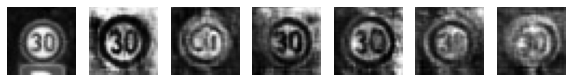

Epoch 4281 g_loss= 0.68104166 d_loss= 1.4069473 real_acc= 0.48 fake_acc= 0.44
Epoch 4282 g_loss= 0.6837475 d_loss= 1.3941461 real_acc= 0.46 fake_acc= 0.48
Epoch 4283 g_loss= 0.6887381 d_loss= 1.4053862 real_acc= 0.44 fake_acc= 0.54
Epoch 4284 g_loss= 0.68926543 d_loss= 1.3836079 real_acc= 0.58 fake_acc= 0.46
Epoch 4285 g_loss= 0.703647 d_loss= 1.3592708 real_acc= 0.62 fake_acc= 0.58
Epoch 4286 g_loss= 0.720323 d_loss= 1.3765211 real_acc= 0.36 fake_acc= 0.62
Epoch 4287 g_loss= 0.70932245 d_loss= 1.3494189 real_acc= 0.6 fake_acc= 0.64
Epoch 4288 g_loss= 0.720318 d_loss= 1.347542 real_acc= 0.58 fake_acc= 0.7
Epoch 4289 g_loss= 0.71743333 d_loss= 1.3424966 real_acc= 0.5 fake_acc= 0.64
Epoch 4290 g_loss= 0.74483246 d_loss= 1.3366067 real_acc= 0.52 fake_acc= 0.76


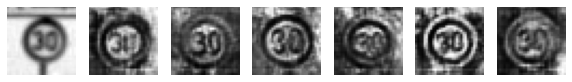

Epoch 4291 g_loss= 0.72312146 d_loss= 1.3391483 real_acc= 0.52 fake_acc= 0.66
Epoch 4292 g_loss= 0.7456727 d_loss= 1.3527162 real_acc= 0.4 fake_acc= 0.74
Epoch 4293 g_loss= 0.74951 d_loss= 1.3287499 real_acc= 0.48 fake_acc= 0.74
Epoch 4294 g_loss= 0.7813585 d_loss= 1.3161131 real_acc= 0.48 fake_acc= 0.8
Epoch 4295 g_loss= 0.78765696 d_loss= 1.3137608 real_acc= 0.54 fake_acc= 0.92
Epoch 4296 g_loss= 0.77261806 d_loss= 1.3330811 real_acc= 0.4 fake_acc= 0.84
Epoch 4297 g_loss= 0.74562436 d_loss= 1.3006132 real_acc= 0.66 fake_acc= 0.72
Epoch 4298 g_loss= 0.76400435 d_loss= 1.3363408 real_acc= 0.38 fake_acc= 0.8
Epoch 4299 g_loss= 0.7477584 d_loss= 1.3041408 real_acc= 0.58 fake_acc= 0.76
Epoch 4300 g_loss= 0.75672853 d_loss= 1.2952048 real_acc= 0.66 fake_acc= 0.8


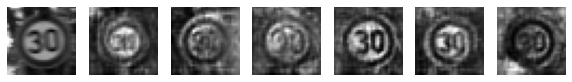

Epoch 4301 g_loss= 0.73417985 d_loss= 1.3051357 real_acc= 0.5 fake_acc= 0.62
Epoch 4302 g_loss= 0.7336606 d_loss= 1.3205303 real_acc= 0.5 fake_acc= 0.74
Epoch 4303 g_loss= 0.69834536 d_loss= 1.3658876 real_acc= 0.54 fake_acc= 0.56
Epoch 4304 g_loss= 0.71807134 d_loss= 1.3277401 real_acc= 0.62 fake_acc= 0.68
Epoch 4305 g_loss= 0.7359275 d_loss= 1.2943118 real_acc= 0.6 fake_acc= 0.68
Epoch 4306 g_loss= 0.7579431 d_loss= 1.296807 real_acc= 0.52 fake_acc= 0.74
Epoch 4307 g_loss= 0.7406587 d_loss= 1.3182948 real_acc= 0.48 fake_acc= 0.64
Epoch 4308 g_loss= 0.7627 d_loss= 1.3499002 real_acc= 0.4 fake_acc= 0.76
Epoch 4309 g_loss= 0.7921031 d_loss= 1.3302373 real_acc= 0.38 fake_acc= 0.82
Epoch 4310 g_loss= 0.7916992 d_loss= 1.3300343 real_acc= 0.38 fake_acc= 0.74


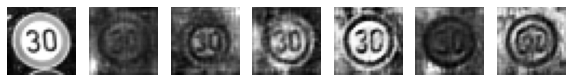

Epoch 4311 g_loss= 0.79316366 d_loss= 1.3471832 real_acc= 0.28 fake_acc= 0.86
Epoch 4312 g_loss= 0.7751268 d_loss= 1.3307345 real_acc= 0.28 fake_acc= 0.88
Epoch 4313 g_loss= 0.7765815 d_loss= 1.3794911 real_acc= 0.22 fake_acc= 0.84
Epoch 4314 g_loss= 0.78426003 d_loss= 1.3687376 real_acc= 0.28 fake_acc= 0.8
Epoch 4315 g_loss= 0.7438916 d_loss= 1.311341 real_acc= 0.5 fake_acc= 0.72
Epoch 4316 g_loss= 0.7392042 d_loss= 1.4197772 real_acc= 0.2 fake_acc= 0.76
Epoch 4317 g_loss= 0.6999971 d_loss= 1.4601976 real_acc= 0.24 fake_acc= 0.66
Epoch 4318 g_loss= 0.7487741 d_loss= 1.3576553 real_acc= 0.44 fake_acc= 0.74
Epoch 4319 g_loss= 0.7405309 d_loss= 1.419704 real_acc= 0.34 fake_acc= 0.64
Epoch 4320 g_loss= 0.75177735 d_loss= 1.3678019 real_acc= 0.5 fake_acc= 0.74


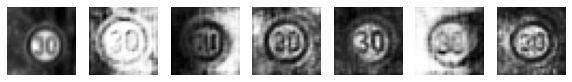

Epoch 4321 g_loss= 0.69930685 d_loss= 1.401351 real_acc= 0.5 fake_acc= 0.46
Epoch 4322 g_loss= 0.72262084 d_loss= 1.3615544 real_acc= 0.54 fake_acc= 0.62
Epoch 4323 g_loss= 0.715628 d_loss= 1.4088655 real_acc= 0.46 fake_acc= 0.54
Epoch 4324 g_loss= 0.72535294 d_loss= 1.4030638 real_acc= 0.46 fake_acc= 0.58
Epoch 4325 g_loss= 0.6923573 d_loss= 1.4602565 real_acc= 0.32 fake_acc= 0.46
Epoch 4326 g_loss= 0.69833213 d_loss= 1.4081411 real_acc= 0.48 fake_acc= 0.52
Epoch 4327 g_loss= 0.69149315 d_loss= 1.3848994 real_acc= 0.68 fake_acc= 0.4
Epoch 4328 g_loss= 0.6988868 d_loss= 1.4126534 real_acc= 0.5 fake_acc= 0.38
Epoch 4329 g_loss= 0.7100574 d_loss= 1.4108224 real_acc= 0.5 fake_acc= 0.54
Epoch 4330 g_loss= 0.7414753 d_loss= 1.3435221 real_acc= 0.6 fake_acc= 0.68


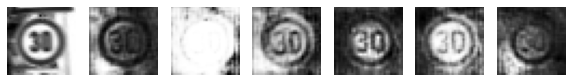

Epoch 4331 g_loss= 0.75056463 d_loss= 1.4026699 real_acc= 0.56 fake_acc= 0.58
Epoch 4332 g_loss= 0.7567241 d_loss= 1.4203962 real_acc= 0.38 fake_acc= 0.64
Epoch 4333 g_loss= 0.7658918 d_loss= 1.3855579 real_acc= 0.48 fake_acc= 0.62
Epoch 4334 g_loss= 0.75853187 d_loss= 1.3956498 real_acc= 0.5 fake_acc= 0.62
Epoch 4335 g_loss= 0.7341893 d_loss= 1.3496181 real_acc= 0.62 fake_acc= 0.4
Epoch 4336 g_loss= 0.71685135 d_loss= 1.3849293 real_acc= 0.56 fake_acc= 0.52
Epoch 4337 g_loss= 0.68262845 d_loss= 1.398669 real_acc= 0.68 fake_acc= 0.46
Epoch 4338 g_loss= 0.6631405 d_loss= 1.3394694 real_acc= 0.76 fake_acc= 0.46
Epoch 4339 g_loss= 0.67412156 d_loss= 1.4052899 real_acc= 0.6 fake_acc= 0.48
Epoch 4340 g_loss= 0.6874414 d_loss= 1.3722645 real_acc= 0.7 fake_acc= 0.36


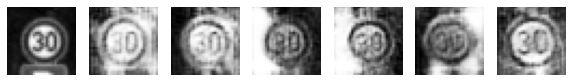

Epoch 4341 g_loss= 0.69909406 d_loss= 1.3691299 real_acc= 0.66 fake_acc= 0.36
Epoch 4342 g_loss= 0.72718287 d_loss= 1.3554688 real_acc= 0.68 fake_acc= 0.52
Epoch 4343 g_loss= 0.7206007 d_loss= 1.3796835 real_acc= 0.7 fake_acc= 0.48
Epoch 4344 g_loss= 0.73240393 d_loss= 1.3452315 real_acc= 0.6 fake_acc= 0.46
Epoch 4345 g_loss= 0.7309074 d_loss= 1.2943273 real_acc= 0.78 fake_acc= 0.48
Epoch 4346 g_loss= 0.7107238 d_loss= 1.3376613 real_acc= 0.78 fake_acc= 0.46
Epoch 4347 g_loss= 0.76038355 d_loss= 1.3441509 real_acc= 0.66 fake_acc= 0.46
Epoch 4348 g_loss= 0.73909044 d_loss= 1.322184 real_acc= 0.72 fake_acc= 0.52
Epoch 4349 g_loss= 0.7682339 d_loss= 1.3505448 real_acc= 0.64 fake_acc= 0.6
Epoch 4350 g_loss= 0.7867721 d_loss= 1.3958335 real_acc= 0.54 fake_acc= 0.46


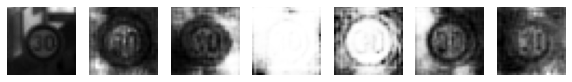

Epoch 4351 g_loss= 0.7836429 d_loss= 1.3114967 real_acc= 0.7 fake_acc= 0.58
Epoch 4352 g_loss= 0.73180634 d_loss= 1.3539419 real_acc= 0.7 fake_acc= 0.46
Epoch 4353 g_loss= 0.744485 d_loss= 1.3164399 real_acc= 0.7 fake_acc= 0.52
Epoch 4354 g_loss= 0.7368987 d_loss= 1.3597107 real_acc= 0.74 fake_acc= 0.54
Epoch 4355 g_loss= 0.7012419 d_loss= 1.3650069 real_acc= 0.76 fake_acc= 0.34
Epoch 4356 g_loss= 0.72588617 d_loss= 1.3353848 real_acc= 0.76 fake_acc= 0.42
Epoch 4357 g_loss= 0.7052436 d_loss= 1.4100783 real_acc= 0.54 fake_acc= 0.46
Epoch 4358 g_loss= 0.7220379 d_loss= 1.3536649 real_acc= 0.7 fake_acc= 0.46
Epoch 4359 g_loss= 0.72178084 d_loss= 1.3250989 real_acc= 0.66 fake_acc= 0.46
Epoch 4360 g_loss= 0.7037515 d_loss= 1.3877497 real_acc= 0.52 fake_acc= 0.4


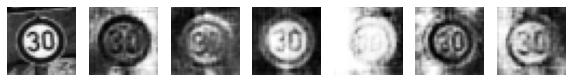

Epoch 4361 g_loss= 0.705683 d_loss= 1.3703817 real_acc= 0.64 fake_acc= 0.36
Epoch 4362 g_loss= 0.7361194 d_loss= 1.3362179 real_acc= 0.6 fake_acc= 0.5
Epoch 4363 g_loss= 0.69991493 d_loss= 1.4105959 real_acc= 0.62 fake_acc= 0.42
Epoch 4364 g_loss= 0.707013 d_loss= 1.3488405 real_acc= 0.66 fake_acc= 0.48
Epoch 4365 g_loss= 0.6961637 d_loss= 1.365969 real_acc= 0.64 fake_acc= 0.42
Epoch 4366 g_loss= 0.688548 d_loss= 1.4008727 real_acc= 0.62 fake_acc= 0.38
Epoch 4367 g_loss= 0.6421155 d_loss= 1.4105322 real_acc= 0.72 fake_acc= 0.22
Epoch 4368 g_loss= 0.67818433 d_loss= 1.3698819 real_acc= 0.68 fake_acc= 0.4
Epoch 4369 g_loss= 0.6741717 d_loss= 1.3718652 real_acc= 0.64 fake_acc= 0.34
Epoch 4370 g_loss= 0.67717063 d_loss= 1.4100249 real_acc= 0.58 fake_acc= 0.44


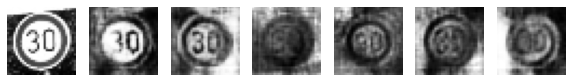

Epoch 4371 g_loss= 0.68872666 d_loss= 1.3688786 real_acc= 0.68 fake_acc= 0.48
Epoch 4372 g_loss= 0.66277015 d_loss= 1.3920802 real_acc= 0.64 fake_acc= 0.4
Epoch 4373 g_loss= 0.67172 d_loss= 1.4038713 real_acc= 0.56 fake_acc= 0.46
Epoch 4374 g_loss= 0.6916562 d_loss= 1.4039832 real_acc= 0.48 fake_acc= 0.5
Epoch 4375 g_loss= 0.71853256 d_loss= 1.3892144 real_acc= 0.5 fake_acc= 0.66
Epoch 4376 g_loss= 0.68096304 d_loss= 1.4124715 real_acc= 0.52 fake_acc= 0.54
Epoch 4377 g_loss= 0.6779516 d_loss= 1.4626801 real_acc= 0.44 fake_acc= 0.56
Epoch 4378 g_loss= 0.70052904 d_loss= 1.3950994 real_acc= 0.5 fake_acc= 0.58
Epoch 4379 g_loss= 0.65678155 d_loss= 1.4356961 real_acc= 0.46 fake_acc= 0.4
Epoch 4380 g_loss= 0.67940474 d_loss= 1.4324751 real_acc= 0.46 fake_acc= 0.48


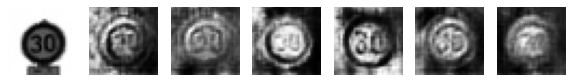

Epoch 4381 g_loss= 0.7028885 d_loss= 1.3943837 real_acc= 0.48 fake_acc= 0.56
Epoch 4382 g_loss= 0.69221824 d_loss= 1.4377129 real_acc= 0.4 fake_acc= 0.52
Epoch 4383 g_loss= 0.68060786 d_loss= 1.3840721 real_acc= 0.6 fake_acc= 0.54
Epoch 4384 g_loss= 0.6972032 d_loss= 1.381677 real_acc= 0.54 fake_acc= 0.64
Epoch 4385 g_loss= 0.70371795 d_loss= 1.4045238 real_acc= 0.4 fake_acc= 0.62
Epoch 4386 g_loss= 0.7039075 d_loss= 1.4083203 real_acc= 0.36 fake_acc= 0.6
Epoch 4387 g_loss= 0.7192987 d_loss= 1.3559544 real_acc= 0.6 fake_acc= 0.64
Epoch 4388 g_loss= 0.68561673 d_loss= 1.4374435 real_acc= 0.36 fake_acc= 0.54
Epoch 4389 g_loss= 0.70363826 d_loss= 1.3927634 real_acc= 0.5 fake_acc= 0.54
Epoch 4390 g_loss= 0.7209225 d_loss= 1.3670785 real_acc= 0.46 fake_acc= 0.64


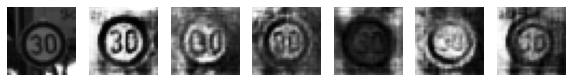

Epoch 4391 g_loss= 0.72013247 d_loss= 1.3702247 real_acc= 0.42 fake_acc= 0.64
Epoch 4392 g_loss= 0.71717733 d_loss= 1.3710349 real_acc= 0.44 fake_acc= 0.62
Epoch 4393 g_loss= 0.7047555 d_loss= 1.3798053 real_acc= 0.46 fake_acc= 0.62
Epoch 4394 g_loss= 0.73407626 d_loss= 1.3464154 real_acc= 0.38 fake_acc= 0.72
Epoch 4395 g_loss= 0.73296106 d_loss= 1.3209385 real_acc= 0.58 fake_acc= 0.66
Epoch 4396 g_loss= 0.73473173 d_loss= 1.3807929 real_acc= 0.28 fake_acc= 0.62
Epoch 4397 g_loss= 0.7386207 d_loss= 1.3322787 real_acc= 0.46 fake_acc= 0.66
Epoch 4398 g_loss= 0.7438862 d_loss= 1.3524902 real_acc= 0.4 fake_acc= 0.68
Epoch 4399 g_loss= 0.7787807 d_loss= 1.3176513 real_acc= 0.32 fake_acc= 0.76
Epoch 4400 g_loss= 0.7807553 d_loss= 1.3271511 real_acc= 0.4 fake_acc= 0.76


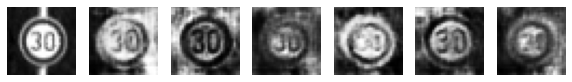

Epoch 4401 g_loss= 0.80591184 d_loss= 1.289555 real_acc= 0.4 fake_acc= 0.8
Epoch 4402 g_loss= 0.79028666 d_loss= 1.3264838 real_acc= 0.42 fake_acc= 0.76
Epoch 4403 g_loss= 0.8182417 d_loss= 1.2935772 real_acc= 0.34 fake_acc= 0.8
Epoch 4404 g_loss= 0.83302414 d_loss= 1.2510571 real_acc= 0.5 fake_acc= 0.84
Epoch 4405 g_loss= 0.8070979 d_loss= 1.3335395 real_acc= 0.34 fake_acc= 0.78
Epoch 4406 g_loss= 0.8093932 d_loss= 1.3100936 real_acc= 0.4 fake_acc= 0.76
Epoch 4407 g_loss= 0.799491 d_loss= 1.3172936 real_acc= 0.38 fake_acc= 0.72
Epoch 4408 g_loss= 0.80127573 d_loss= 1.2962772 real_acc= 0.42 fake_acc= 0.76
Epoch 4409 g_loss= 0.81301737 d_loss= 1.2905962 real_acc= 0.4 fake_acc= 0.84
Epoch 4410 g_loss= 0.8029159 d_loss= 1.3265465 real_acc= 0.36 fake_acc= 0.74


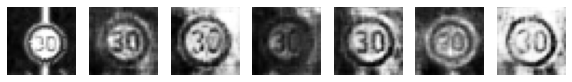

Epoch 4411 g_loss= 0.79487526 d_loss= 1.360652 real_acc= 0.38 fake_acc= 0.66
Epoch 4412 g_loss= 0.7901173 d_loss= 1.3738815 real_acc= 0.32 fake_acc= 0.76
Epoch 4413 g_loss= 0.7799835 d_loss= 1.3699057 real_acc= 0.38 fake_acc= 0.72
Epoch 4414 g_loss= 0.80040133 d_loss= 1.2835536 real_acc= 0.52 fake_acc= 0.68
Epoch 4415 g_loss= 0.7731686 d_loss= 1.3176036 real_acc= 0.56 fake_acc= 0.7
Epoch 4416 g_loss= 0.794232 d_loss= 1.3227615 real_acc= 0.44 fake_acc= 0.7
Epoch 4417 g_loss= 0.7508408 d_loss= 1.362932 real_acc= 0.44 fake_acc= 0.68
Epoch 4418 g_loss= 0.76603204 d_loss= 1.4019883 real_acc= 0.4 fake_acc= 0.68
Epoch 4419 g_loss= 0.76525897 d_loss= 1.3913218 real_acc= 0.34 fake_acc= 0.74
Epoch 4420 g_loss= 0.730293 d_loss= 1.4109209 real_acc= 0.36 fake_acc= 0.64


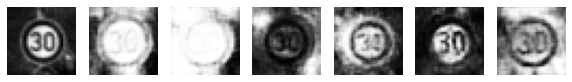

Epoch 4421 g_loss= 0.7283748 d_loss= 1.4481217 real_acc= 0.32 fake_acc= 0.64
Epoch 4422 g_loss= 0.7153156 d_loss= 1.4166173 real_acc= 0.4 fake_acc= 0.68
Epoch 4423 g_loss= 0.72748375 d_loss= 1.4038563 real_acc= 0.34 fake_acc= 0.6
Epoch 4424 g_loss= 0.73548126 d_loss= 1.3759401 real_acc= 0.38 fake_acc= 0.68
Epoch 4425 g_loss= 0.6760166 d_loss= 1.4513307 real_acc= 0.44 fake_acc= 0.56
Epoch 4426 g_loss= 0.7281307 d_loss= 1.3785212 real_acc= 0.44 fake_acc= 0.72
Epoch 4427 g_loss= 0.6900313 d_loss= 1.427673 real_acc= 0.4 fake_acc= 0.58
Epoch 4428 g_loss= 0.7045365 d_loss= 1.4049842 real_acc= 0.36 fake_acc= 0.48
Epoch 4429 g_loss= 0.69646865 d_loss= 1.3917435 real_acc= 0.5 fake_acc= 0.6
Epoch 4430 g_loss= 0.7064774 d_loss= 1.4002777 real_acc= 0.46 fake_acc= 0.6


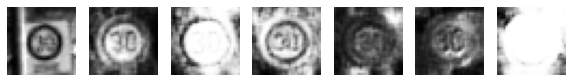

Epoch 4431 g_loss= 0.7248455 d_loss= 1.4096642 real_acc= 0.3 fake_acc= 0.62
Epoch 4432 g_loss= 0.7221993 d_loss= 1.3713304 real_acc= 0.46 fake_acc= 0.54
Epoch 4433 g_loss= 0.71270156 d_loss= 1.3931103 real_acc= 0.48 fake_acc= 0.6
Epoch 4434 g_loss= 0.694273 d_loss= 1.3831041 real_acc= 0.58 fake_acc= 0.48
Epoch 4435 g_loss= 0.677499 d_loss= 1.389854 real_acc= 0.58 fake_acc= 0.42
Epoch 4436 g_loss= 0.7070547 d_loss= 1.37181 real_acc= 0.52 fake_acc= 0.56
Epoch 4437 g_loss= 0.69658935 d_loss= 1.371032 real_acc= 0.6 fake_acc= 0.48
Epoch 4438 g_loss= 0.70003855 d_loss= 1.3740214 real_acc= 0.6 fake_acc= 0.48
Epoch 4439 g_loss= 0.7042139 d_loss= 1.3813567 real_acc= 0.52 fake_acc= 0.54
Epoch 4440 g_loss= 0.7164432 d_loss= 1.3735738 real_acc= 0.46 fake_acc= 0.62


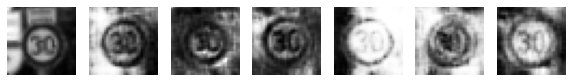

Epoch 4441 g_loss= 0.7242322 d_loss= 1.3529111 real_acc= 0.56 fake_acc= 0.58
Epoch 4442 g_loss= 0.70758605 d_loss= 1.3751086 real_acc= 0.48 fake_acc= 0.6
Epoch 4443 g_loss= 0.7158626 d_loss= 1.372831 real_acc= 0.5 fake_acc= 0.64
Epoch 4444 g_loss= 0.7079428 d_loss= 1.3648317 real_acc= 0.62 fake_acc= 0.6
Epoch 4445 g_loss= 0.7070614 d_loss= 1.3594053 real_acc= 0.58 fake_acc= 0.54
Epoch 4446 g_loss= 0.668421 d_loss= 1.3822098 real_acc= 0.66 fake_acc= 0.3
Epoch 4447 g_loss= 0.68487734 d_loss= 1.3569282 real_acc= 0.68 fake_acc= 0.46
Epoch 4448 g_loss= 0.69909203 d_loss= 1.3397509 real_acc= 0.7 fake_acc= 0.56
Epoch 4449 g_loss= 0.69284546 d_loss= 1.3386567 real_acc= 0.7 fake_acc= 0.44
Epoch 4450 g_loss= 0.6924817 d_loss= 1.3574332 real_acc= 0.66 fake_acc= 0.42


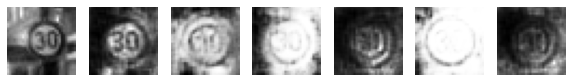

Epoch 4451 g_loss= 0.7073391 d_loss= 1.3303229 real_acc= 0.72 fake_acc= 0.54
Epoch 4452 g_loss= 0.7188375 d_loss= 1.355895 real_acc= 0.62 fake_acc= 0.58
Epoch 4453 g_loss= 0.7376546 d_loss= 1.3323236 real_acc= 0.6 fake_acc= 0.54
Epoch 4454 g_loss= 0.7240939 d_loss= 1.3244412 real_acc= 0.78 fake_acc= 0.52
Epoch 4455 g_loss= 0.73173624 d_loss= 1.3312536 real_acc= 0.68 fake_acc= 0.56
Epoch 4456 g_loss= 0.7582553 d_loss= 1.366883 real_acc= 0.4 fake_acc= 0.7
Epoch 4457 g_loss= 0.75124514 d_loss= 1.3363186 real_acc= 0.48 fake_acc= 0.62
Epoch 4458 g_loss= 0.7153997 d_loss= 1.3552258 real_acc= 0.5 fake_acc= 0.6
Epoch 4459 g_loss= 0.7408937 d_loss= 1.3536212 real_acc= 0.56 fake_acc= 0.68
Epoch 4460 g_loss= 0.72231734 d_loss= 1.3447945 real_acc= 0.58 fake_acc= 0.54


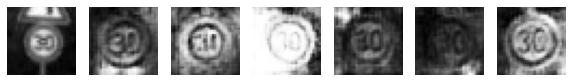

Epoch 4461 g_loss= 0.74751335 d_loss= 1.3218709 real_acc= 0.6 fake_acc= 0.62
Epoch 4462 g_loss= 0.7044598 d_loss= 1.3982759 real_acc= 0.6 fake_acc= 0.5
Epoch 4463 g_loss= 0.69373477 d_loss= 1.3613291 real_acc= 0.64 fake_acc= 0.5
Epoch 4464 g_loss= 0.70875883 d_loss= 1.3481858 real_acc= 0.58 fake_acc= 0.44
Epoch 4465 g_loss= 0.7210383 d_loss= 1.3418827 real_acc= 0.66 fake_acc= 0.54
Epoch 4466 g_loss= 0.7288898 d_loss= 1.306906 real_acc= 0.66 fake_acc= 0.58
Epoch 4467 g_loss= 0.69213057 d_loss= 1.381264 real_acc= 0.5 fake_acc= 0.48
Epoch 4468 g_loss= 0.709111 d_loss= 1.348029 real_acc= 0.56 fake_acc= 0.5
Epoch 4469 g_loss= 0.72883224 d_loss= 1.3617878 real_acc= 0.56 fake_acc= 0.64
Epoch 4470 g_loss= 0.72051316 d_loss= 1.337363 real_acc= 0.62 fake_acc= 0.52


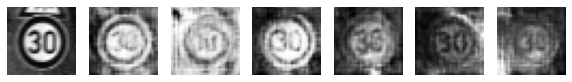

Epoch 4471 g_loss= 0.7309532 d_loss= 1.3539093 real_acc= 0.52 fake_acc= 0.54
Epoch 4472 g_loss= 0.73111916 d_loss= 1.3454571 real_acc= 0.56 fake_acc= 0.64
Epoch 4473 g_loss= 0.76439303 d_loss= 1.3416011 real_acc= 0.46 fake_acc= 0.64
Epoch 4474 g_loss= 0.7519548 d_loss= 1.3919356 real_acc= 0.36 fake_acc= 0.64
Epoch 4475 g_loss= 0.78609496 d_loss= 1.3763721 real_acc= 0.42 fake_acc= 0.7
Epoch 4476 g_loss= 0.77495766 d_loss= 1.3750541 real_acc= 0.44 fake_acc= 0.7
Epoch 4477 g_loss= 0.77579445 d_loss= 1.3704535 real_acc= 0.44 fake_acc= 0.66
Epoch 4478 g_loss= 0.75912887 d_loss= 1.3812349 real_acc= 0.48 fake_acc= 0.66
Epoch 4479 g_loss= 0.72325206 d_loss= 1.4391996 real_acc= 0.42 fake_acc= 0.52
Epoch 4480 g_loss= 0.69971055 d_loss= 1.4341872 real_acc= 0.42 fake_acc= 0.52


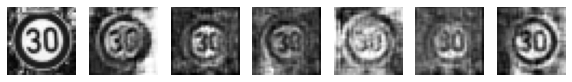

Epoch 4481 g_loss= 0.67504853 d_loss= 1.4210367 real_acc= 0.52 fake_acc= 0.54
Epoch 4482 g_loss= 0.6615317 d_loss= 1.4127443 real_acc= 0.58 fake_acc= 0.4
Epoch 4483 g_loss= 0.65584886 d_loss= 1.4169004 real_acc= 0.64 fake_acc= 0.44
Epoch 4484 g_loss= 0.656304 d_loss= 1.3903613 real_acc= 0.66 fake_acc= 0.46
Epoch 4485 g_loss= 0.68193626 d_loss= 1.4334245 real_acc= 0.54 fake_acc= 0.48
Epoch 4486 g_loss= 0.7342384 d_loss= 1.418803 real_acc= 0.42 fake_acc= 0.64
Epoch 4487 g_loss= 0.7374989 d_loss= 1.3919733 real_acc= 0.48 fake_acc= 0.6
Epoch 4488 g_loss= 0.7269518 d_loss= 1.3890355 real_acc= 0.54 fake_acc= 0.58
Epoch 4489 g_loss= 0.7354899 d_loss= 1.3769882 real_acc= 0.54 fake_acc= 0.7
Epoch 4490 g_loss= 0.71847105 d_loss= 1.4230242 real_acc= 0.42 fake_acc= 0.6


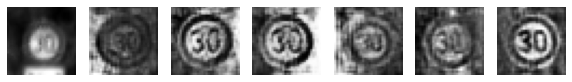

Epoch 4491 g_loss= 0.7120346 d_loss= 1.4763336 real_acc= 0.34 fake_acc= 0.52
Epoch 4492 g_loss= 0.72329164 d_loss= 1.3765148 real_acc= 0.52 fake_acc= 0.64
Epoch 4493 g_loss= 0.7049629 d_loss= 1.3669224 real_acc= 0.62 fake_acc= 0.54
Epoch 4494 g_loss= 0.7012417 d_loss= 1.4255211 real_acc= 0.54 fake_acc= 0.56
Epoch 4495 g_loss= 0.7042381 d_loss= 1.3871477 real_acc= 0.58 fake_acc= 0.56
Epoch 4496 g_loss= 0.6743684 d_loss= 1.4385425 real_acc= 0.46 fake_acc= 0.5
Epoch 4497 g_loss= 0.6633317 d_loss= 1.3768878 real_acc= 0.68 fake_acc= 0.42
Epoch 4498 g_loss= 0.6774785 d_loss= 1.4188662 real_acc= 0.54 fake_acc= 0.5
Epoch 4499 g_loss= 0.6827795 d_loss= 1.4165175 real_acc= 0.58 fake_acc= 0.42
Epoch 4500 g_loss= 0.66619146 d_loss= 1.4113288 real_acc= 0.62 fake_acc= 0.46


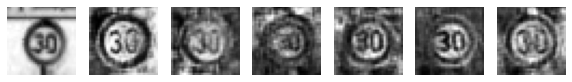

Epoch 4501 g_loss= 0.6850714 d_loss= 1.4054139 real_acc= 0.5 fake_acc= 0.52
Epoch 4502 g_loss= 0.6914189 d_loss= 1.3939755 real_acc= 0.58 fake_acc= 0.54
Epoch 4503 g_loss= 0.7141687 d_loss= 1.3673463 real_acc= 0.6 fake_acc= 0.56
Epoch 4504 g_loss= 0.72731924 d_loss= 1.363173 real_acc= 0.5 fake_acc= 0.62
Epoch 4505 g_loss= 0.7323931 d_loss= 1.349931 real_acc= 0.6 fake_acc= 0.66
Epoch 4506 g_loss= 0.74679625 d_loss= 1.3471687 real_acc= 0.48 fake_acc= 0.7
Epoch 4507 g_loss= 0.73878527 d_loss= 1.3624666 real_acc= 0.46 fake_acc= 0.72
Epoch 4508 g_loss= 0.7235429 d_loss= 1.3986397 real_acc= 0.38 fake_acc= 0.58
Epoch 4509 g_loss= 0.7038189 d_loss= 1.3586212 real_acc= 0.64 fake_acc= 0.54
Epoch 4510 g_loss= 0.7257618 d_loss= 1.3361948 real_acc= 0.58 fake_acc= 0.62


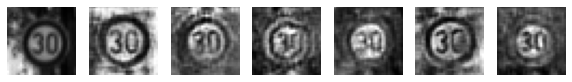

Epoch 4511 g_loss= 0.6983924 d_loss= 1.3657296 real_acc= 0.48 fake_acc= 0.5
Epoch 4512 g_loss= 0.7222776 d_loss= 1.3444197 real_acc= 0.64 fake_acc= 0.62
Epoch 4513 g_loss= 0.7176493 d_loss= 1.3363034 real_acc= 0.68 fake_acc= 0.5
Epoch 4514 g_loss= 0.7193217 d_loss= 1.3384967 real_acc= 0.66 fake_acc= 0.52
Epoch 4515 g_loss= 0.7030936 d_loss= 1.3814802 real_acc= 0.58 fake_acc= 0.56
Epoch 4516 g_loss= 0.74382484 d_loss= 1.3293498 real_acc= 0.5 fake_acc= 0.62
Epoch 4517 g_loss= 0.7398056 d_loss= 1.3353206 real_acc= 0.56 fake_acc= 0.68
Epoch 4518 g_loss= 0.7436875 d_loss= 1.361647 real_acc= 0.4 fake_acc= 0.72
Epoch 4519 g_loss= 0.76609683 d_loss= 1.2691913 real_acc= 0.62 fake_acc= 0.78
Epoch 4520 g_loss= 0.7611727 d_loss= 1.2962759 real_acc= 0.54 fake_acc= 0.78


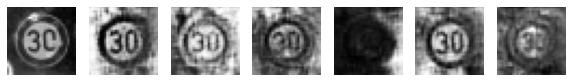

Epoch 4521 g_loss= 0.7528722 d_loss= 1.3745548 real_acc= 0.46 fake_acc= 0.66
Epoch 4522 g_loss= 0.76325995 d_loss= 1.3402408 real_acc= 0.46 fake_acc= 0.7
Epoch 4523 g_loss= 0.7189176 d_loss= 1.3062675 real_acc= 0.66 fake_acc= 0.68
Epoch 4524 g_loss= 0.7099026 d_loss= 1.3782818 real_acc= 0.58 fake_acc= 0.54
Epoch 4525 g_loss= 0.7142148 d_loss= 1.3955753 real_acc= 0.5 fake_acc= 0.58
Epoch 4526 g_loss= 0.7031191 d_loss= 1.4072337 real_acc= 0.4 fake_acc= 0.58
Epoch 4527 g_loss= 0.7223927 d_loss= 1.3508008 real_acc= 0.56 fake_acc= 0.46
Epoch 4528 g_loss= 0.73306745 d_loss= 1.3278513 real_acc= 0.56 fake_acc= 0.62
Epoch 4529 g_loss= 0.7790713 d_loss= 1.3244113 real_acc= 0.44 fake_acc= 0.72
Epoch 4530 g_loss= 0.7504191 d_loss= 1.3601179 real_acc= 0.44 fake_acc= 0.66


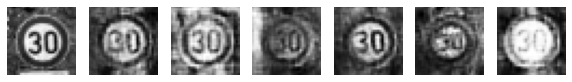

Epoch 4531 g_loss= 0.7528708 d_loss= 1.346598 real_acc= 0.44 fake_acc= 0.72
Epoch 4532 g_loss= 0.77332187 d_loss= 1.4053981 real_acc= 0.38 fake_acc= 0.7
Epoch 4533 g_loss= 0.7847774 d_loss= 1.3940151 real_acc= 0.34 fake_acc= 0.72
Epoch 4534 g_loss= 0.7690021 d_loss= 1.4066364 real_acc= 0.28 fake_acc= 0.74
Epoch 4535 g_loss= 0.7644212 d_loss= 1.3941672 real_acc= 0.36 fake_acc= 0.64
Epoch 4536 g_loss= 0.711662 d_loss= 1.453412 real_acc= 0.4 fake_acc= 0.52
Epoch 4537 g_loss= 0.7087328 d_loss= 1.4243671 real_acc= 0.38 fake_acc= 0.52
Epoch 4538 g_loss= 0.7016171 d_loss= 1.3909471 real_acc= 0.58 fake_acc= 0.58
Epoch 4539 g_loss= 0.6870185 d_loss= 1.4441687 real_acc= 0.4 fake_acc= 0.46
Epoch 4540 g_loss= 0.70669466 d_loss= 1.4157722 real_acc= 0.38 fake_acc= 0.52


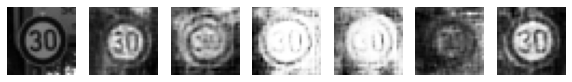

Epoch 4541 g_loss= 0.70318204 d_loss= 1.4118009 real_acc= 0.46 fake_acc= 0.54
Epoch 4542 g_loss= 0.7193944 d_loss= 1.4006016 real_acc= 0.42 fake_acc= 0.54
Epoch 4543 g_loss= 0.69241905 d_loss= 1.4481478 real_acc= 0.48 fake_acc= 0.52
Epoch 4544 g_loss= 0.70286614 d_loss= 1.3994582 real_acc= 0.5 fake_acc= 0.56
Epoch 4545 g_loss= 0.71129227 d_loss= 1.4175136 real_acc= 0.42 fake_acc= 0.56
Epoch 4546 g_loss= 0.7163098 d_loss= 1.3970883 real_acc= 0.5 fake_acc= 0.52
Epoch 4547 g_loss= 0.7228476 d_loss= 1.3932978 real_acc= 0.4 fake_acc= 0.62
Epoch 4548 g_loss= 0.7237381 d_loss= 1.3924804 real_acc= 0.48 fake_acc= 0.56
Epoch 4549 g_loss= 0.7342369 d_loss= 1.3858035 real_acc= 0.46 fake_acc= 0.62
Epoch 4550 g_loss= 0.7117665 d_loss= 1.3730776 real_acc= 0.56 fake_acc= 0.56


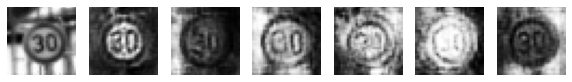

Epoch 4551 g_loss= 0.7200371 d_loss= 1.3657892 real_acc= 0.52 fake_acc= 0.56
Epoch 4552 g_loss= 0.7019324 d_loss= 1.3730233 real_acc= 0.62 fake_acc= 0.54
Epoch 4553 g_loss= 0.7319072 d_loss= 1.3660228 real_acc= 0.54 fake_acc= 0.6
Epoch 4554 g_loss= 0.7153486 d_loss= 1.3620892 real_acc= 0.54 fake_acc= 0.52
Epoch 4555 g_loss= 0.7227497 d_loss= 1.3605893 real_acc= 0.62 fake_acc= 0.58
Epoch 4556 g_loss= 0.70259285 d_loss= 1.368983 real_acc= 0.62 fake_acc= 0.52
Epoch 4557 g_loss= 0.72908056 d_loss= 1.3669682 real_acc= 0.6 fake_acc= 0.54
Epoch 4558 g_loss= 0.7485798 d_loss= 1.3420486 real_acc= 0.62 fake_acc= 0.58
Epoch 4559 g_loss= 0.7480646 d_loss= 1.3548427 real_acc= 0.58 fake_acc= 0.64
Epoch 4560 g_loss= 0.75515795 d_loss= 1.3574717 real_acc= 0.58 fake_acc= 0.6


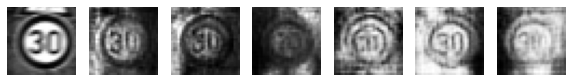

Epoch 4561 g_loss= 0.7459014 d_loss= 1.3314266 real_acc= 0.62 fake_acc= 0.46
Epoch 4562 g_loss= 0.7148295 d_loss= 1.3834647 real_acc= 0.58 fake_acc= 0.54
Epoch 4563 g_loss= 0.74260247 d_loss= 1.3187354 real_acc= 0.68 fake_acc= 0.56
Epoch 4564 g_loss= 0.7261712 d_loss= 1.3444642 real_acc= 0.64 fake_acc= 0.52
Epoch 4565 g_loss= 0.7317407 d_loss= 1.3409307 real_acc= 0.62 fake_acc= 0.42
Epoch 4566 g_loss= 0.72882384 d_loss= 1.3575817 real_acc= 0.62 fake_acc= 0.58
Epoch 4567 g_loss= 0.71269727 d_loss= 1.3834132 real_acc= 0.6 fake_acc= 0.44
Epoch 4568 g_loss= 0.6958419 d_loss= 1.3595157 real_acc= 0.68 fake_acc= 0.46
Epoch 4569 g_loss= 0.6986087 d_loss= 1.3249137 real_acc= 0.78 fake_acc= 0.44
Epoch 4570 g_loss= 0.69230705 d_loss= 1.3373543 real_acc= 0.72 fake_acc= 0.44


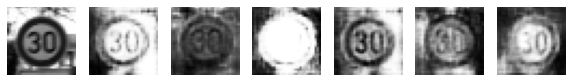

Epoch 4571 g_loss= 0.6998373 d_loss= 1.3723063 real_acc= 0.58 fake_acc= 0.42
Epoch 4572 g_loss= 0.68736833 d_loss= 1.3782313 real_acc= 0.66 fake_acc= 0.38
Epoch 4573 g_loss= 0.7011763 d_loss= 1.3938403 real_acc= 0.56 fake_acc= 0.46
Epoch 4574 g_loss= 0.7021166 d_loss= 1.3720567 real_acc= 0.66 fake_acc= 0.46
Epoch 4575 g_loss= 0.71678764 d_loss= 1.3503318 real_acc= 0.6 fake_acc= 0.52
Epoch 4576 g_loss= 0.71249205 d_loss= 1.3397683 real_acc= 0.7 fake_acc= 0.52
Epoch 4577 g_loss= 0.731936 d_loss= 1.3195362 real_acc= 0.72 fake_acc= 0.52
Epoch 4578 g_loss= 0.72202456 d_loss= 1.3328254 real_acc= 0.6 fake_acc= 0.52
Epoch 4579 g_loss= 0.72325224 d_loss= 1.3299677 real_acc= 0.7 fake_acc= 0.62
Epoch 4580 g_loss= 0.7161181 d_loss= 1.3630884 real_acc= 0.54 fake_acc= 0.54


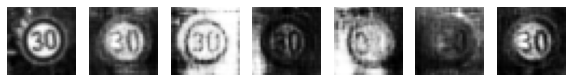

Epoch 4581 g_loss= 0.7139288 d_loss= 1.4074401 real_acc= 0.5 fake_acc= 0.6
Epoch 4582 g_loss= 0.7189969 d_loss= 1.3555655 real_acc= 0.58 fake_acc= 0.52
Epoch 4583 g_loss= 0.71099496 d_loss= 1.334218 real_acc= 0.62 fake_acc= 0.54
Epoch 4584 g_loss= 0.7041243 d_loss= 1.3242176 real_acc= 0.66 fake_acc= 0.54
Epoch 4585 g_loss= 0.6889455 d_loss= 1.364944 real_acc= 0.62 fake_acc= 0.56
Epoch 4586 g_loss= 0.70984024 d_loss= 1.3909917 real_acc= 0.48 fake_acc= 0.56
Epoch 4587 g_loss= 0.72431487 d_loss= 1.3707483 real_acc= 0.48 fake_acc= 0.64
Epoch 4588 g_loss= 0.6926006 d_loss= 1.4147401 real_acc= 0.42 fake_acc= 0.44
Epoch 4589 g_loss= 0.75343776 d_loss= 1.3381977 real_acc= 0.52 fake_acc= 0.66
Epoch 4590 g_loss= 0.7329562 d_loss= 1.3567863 real_acc= 0.56 fake_acc= 0.58


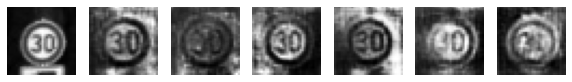

Epoch 4591 g_loss= 0.733818 d_loss= 1.3816164 real_acc= 0.48 fake_acc= 0.66
Epoch 4592 g_loss= 0.7289519 d_loss= 1.3684449 real_acc= 0.54 fake_acc= 0.66
Epoch 4593 g_loss= 0.73440516 d_loss= 1.3314996 real_acc= 0.6 fake_acc= 0.66
Epoch 4594 g_loss= 0.70888066 d_loss= 1.3356192 real_acc= 0.56 fake_acc= 0.56
Epoch 4595 g_loss= 0.70148194 d_loss= 1.3766158 real_acc= 0.5 fake_acc= 0.52
Epoch 4596 g_loss= 0.7167885 d_loss= 1.4124024 real_acc= 0.38 fake_acc= 0.54
Epoch 4597 g_loss= 0.69791275 d_loss= 1.3604486 real_acc= 0.5 fake_acc= 0.62
Epoch 4598 g_loss= 0.7164572 d_loss= 1.3677711 real_acc= 0.56 fake_acc= 0.66
Epoch 4599 g_loss= 0.7087321 d_loss= 1.382839 real_acc= 0.5 fake_acc= 0.48
Epoch 4600 g_loss= 0.7130209 d_loss= 1.3597535 real_acc= 0.5 fake_acc= 0.58


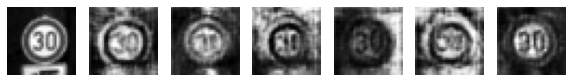

Epoch 4601 g_loss= 0.7281135 d_loss= 1.3555274 real_acc= 0.6 fake_acc= 0.66
Epoch 4602 g_loss= 0.75095826 d_loss= 1.3575726 real_acc= 0.38 fake_acc= 0.72
Epoch 4603 g_loss= 0.7551392 d_loss= 1.39204 real_acc= 0.22 fake_acc= 0.82
Epoch 4604 g_loss= 0.7659139 d_loss= 1.3386214 real_acc= 0.44 fake_acc= 0.8
Epoch 4605 g_loss= 0.75125605 d_loss= 1.3688762 real_acc= 0.42 fake_acc= 0.72
Epoch 4606 g_loss= 0.752566 d_loss= 1.3555486 real_acc= 0.38 fake_acc= 0.74
Epoch 4607 g_loss= 0.7673241 d_loss= 1.3245159 real_acc= 0.46 fake_acc= 0.8
Epoch 4608 g_loss= 0.72763324 d_loss= 1.3659163 real_acc= 0.48 fake_acc= 0.64
Epoch 4609 g_loss= 0.7420276 d_loss= 1.3434688 real_acc= 0.5 fake_acc= 0.68
Epoch 4610 g_loss= 0.7471259 d_loss= 1.3605735 real_acc= 0.42 fake_acc= 0.68


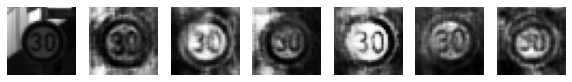

Epoch 4611 g_loss= 0.7288778 d_loss= 1.3678505 real_acc= 0.48 fake_acc= 0.64
Epoch 4612 g_loss= 0.7471884 d_loss= 1.324797 real_acc= 0.54 fake_acc= 0.64
Epoch 4613 g_loss= 0.74323684 d_loss= 1.3095756 real_acc= 0.64 fake_acc= 0.72
Epoch 4614 g_loss= 0.7617173 d_loss= 1.3392055 real_acc= 0.42 fake_acc= 0.8
Epoch 4615 g_loss= 0.7385774 d_loss= 1.3275293 real_acc= 0.6 fake_acc= 0.66
Epoch 4616 g_loss= 0.7507596 d_loss= 1.3300269 real_acc= 0.48 fake_acc= 0.72
Epoch 4617 g_loss= 0.75434995 d_loss= 1.2899172 real_acc= 0.54 fake_acc= 0.7
Epoch 4618 g_loss= 0.7395265 d_loss= 1.3305762 real_acc= 0.52 fake_acc= 0.76
Epoch 4619 g_loss= 0.7713027 d_loss= 1.3212025 real_acc= 0.52 fake_acc= 0.7
Epoch 4620 g_loss= 0.768795 d_loss= 1.305982 real_acc= 0.44 fake_acc= 0.78


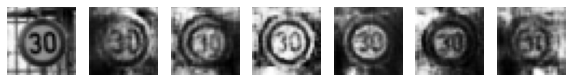

Epoch 4621 g_loss= 0.767202 d_loss= 1.3286437 real_acc= 0.42 fake_acc= 0.76
Epoch 4622 g_loss= 0.7564005 d_loss= 1.3341419 real_acc= 0.36 fake_acc= 0.76
Epoch 4623 g_loss= 0.75320464 d_loss= 1.3459486 real_acc= 0.48 fake_acc= 0.74
Epoch 4624 g_loss= 0.76501405 d_loss= 1.3339236 real_acc= 0.42 fake_acc= 0.78
Epoch 4625 g_loss= 0.7455167 d_loss= 1.3341333 real_acc= 0.46 fake_acc= 0.78
Epoch 4626 g_loss= 0.74471784 d_loss= 1.3419652 real_acc= 0.5 fake_acc= 0.72
Epoch 4627 g_loss= 0.7504418 d_loss= 1.3242961 real_acc= 0.44 fake_acc= 0.66
Epoch 4628 g_loss= 0.7531618 d_loss= 1.3219719 real_acc= 0.56 fake_acc= 0.72
Epoch 4629 g_loss= 0.7367728 d_loss= 1.3491249 real_acc= 0.46 fake_acc= 0.66
Epoch 4630 g_loss= 0.73465514 d_loss= 1.3489892 real_acc= 0.5 fake_acc= 0.76


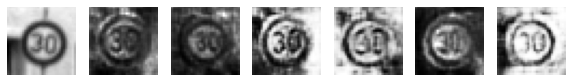

Epoch 4631 g_loss= 0.71178675 d_loss= 1.3282347 real_acc= 0.64 fake_acc= 0.64
Epoch 4632 g_loss= 0.70984864 d_loss= 1.3576233 real_acc= 0.56 fake_acc= 0.68
Epoch 4633 g_loss= 0.71251607 d_loss= 1.320192 real_acc= 0.6 fake_acc= 0.56
Epoch 4634 g_loss= 0.7160184 d_loss= 1.3576931 real_acc= 0.5 fake_acc= 0.62
Epoch 4635 g_loss= 0.7257045 d_loss= 1.3601078 real_acc= 0.5 fake_acc= 0.66
Epoch 4636 g_loss= 0.73040944 d_loss= 1.3569676 real_acc= 0.44 fake_acc= 0.68
Epoch 4637 g_loss= 0.74816585 d_loss= 1.3469965 real_acc= 0.5 fake_acc= 0.62
Epoch 4638 g_loss= 0.7540491 d_loss= 1.3465903 real_acc= 0.44 fake_acc= 0.7
Epoch 4639 g_loss= 0.73622876 d_loss= 1.4013329 real_acc= 0.32 fake_acc= 0.66
Epoch 4640 g_loss= 0.7519773 d_loss= 1.3776507 real_acc= 0.38 fake_acc= 0.74


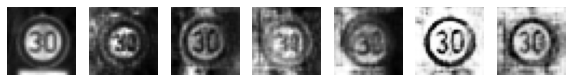

Epoch 4641 g_loss= 0.7466404 d_loss= 1.3574858 real_acc= 0.42 fake_acc= 0.62
Epoch 4642 g_loss= 0.7258781 d_loss= 1.377125 real_acc= 0.42 fake_acc= 0.62
Epoch 4643 g_loss= 0.725271 d_loss= 1.3855195 real_acc= 0.42 fake_acc= 0.64
Epoch 4644 g_loss= 0.70908046 d_loss= 1.3931596 real_acc= 0.44 fake_acc= 0.54
Epoch 4645 g_loss= 0.68894166 d_loss= 1.3957051 real_acc= 0.46 fake_acc= 0.58
Epoch 4646 g_loss= 0.69846827 d_loss= 1.3796719 real_acc= 0.56 fake_acc= 0.62
Epoch 4647 g_loss= 0.69243795 d_loss= 1.395097 real_acc= 0.5 fake_acc= 0.56
Epoch 4648 g_loss= 0.6813605 d_loss= 1.381531 real_acc= 0.54 fake_acc= 0.54
Epoch 4649 g_loss= 0.70355225 d_loss= 1.3646157 real_acc= 0.56 fake_acc= 0.58
Epoch 4650 g_loss= 0.6834684 d_loss= 1.4219551 real_acc= 0.38 fake_acc= 0.42


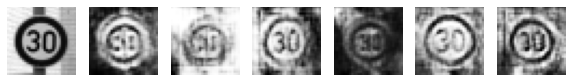

Epoch 4651 g_loss= 0.6832901 d_loss= 1.4082494 real_acc= 0.56 fake_acc= 0.54
Epoch 4652 g_loss= 0.6905088 d_loss= 1.4494369 real_acc= 0.34 fake_acc= 0.5
Epoch 4653 g_loss= 0.686813 d_loss= 1.4082056 real_acc= 0.46 fake_acc= 0.52
Epoch 4654 g_loss= 0.69993067 d_loss= 1.4144877 real_acc= 0.4 fake_acc= 0.58
Epoch 4655 g_loss= 0.6752891 d_loss= 1.4216647 real_acc= 0.5 fake_acc= 0.48
Epoch 4656 g_loss= 0.6993177 d_loss= 1.3909929 real_acc= 0.5 fake_acc= 0.6
Epoch 4657 g_loss= 0.67046183 d_loss= 1.416206 real_acc= 0.46 fake_acc= 0.5
Epoch 4658 g_loss= 0.6684912 d_loss= 1.4302775 real_acc= 0.48 fake_acc= 0.38
Epoch 4659 g_loss= 0.6512119 d_loss= 1.424858 real_acc= 0.58 fake_acc= 0.36
Epoch 4660 g_loss= 0.6768133 d_loss= 1.4087608 real_acc= 0.42 fake_acc= 0.46


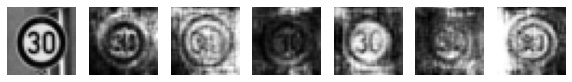

Epoch 4661 g_loss= 0.66931325 d_loss= 1.3976707 real_acc= 0.62 fake_acc= 0.4
Epoch 4662 g_loss= 0.6750424 d_loss= 1.3888806 real_acc= 0.58 fake_acc= 0.38
Epoch 4663 g_loss= 0.6733194 d_loss= 1.4039154 real_acc= 0.6 fake_acc= 0.4
Epoch 4664 g_loss= 0.6646405 d_loss= 1.420183 real_acc= 0.54 fake_acc= 0.36
Epoch 4665 g_loss= 0.6645329 d_loss= 1.397828 real_acc= 0.66 fake_acc= 0.42
Epoch 4666 g_loss= 0.65975463 d_loss= 1.4469135 real_acc= 0.4 fake_acc= 0.3
Epoch 4667 g_loss= 0.6577048 d_loss= 1.4301459 real_acc= 0.46 fake_acc= 0.36
Epoch 4668 g_loss= 0.6601096 d_loss= 1.4048254 real_acc= 0.56 fake_acc= 0.38
Epoch 4669 g_loss= 0.6717148 d_loss= 1.4112355 real_acc= 0.56 fake_acc= 0.48
Epoch 4670 g_loss= 0.67853475 d_loss= 1.3807303 real_acc= 0.62 fake_acc= 0.4


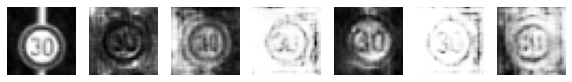

Epoch 4671 g_loss= 0.6700541 d_loss= 1.4037277 real_acc= 0.62 fake_acc= 0.4
Epoch 4672 g_loss= 0.6767946 d_loss= 1.4153211 real_acc= 0.42 fake_acc= 0.42
Epoch 4673 g_loss= 0.69720197 d_loss= 1.3944795 real_acc= 0.58 fake_acc= 0.52
Epoch 4674 g_loss= 0.701429 d_loss= 1.3731135 real_acc= 0.56 fake_acc= 0.58
Epoch 4675 g_loss= 0.7100351 d_loss= 1.3509762 real_acc= 0.62 fake_acc= 0.54
Epoch 4676 g_loss= 0.6888341 d_loss= 1.3956082 real_acc= 0.44 fake_acc= 0.54
Epoch 4677 g_loss= 0.7223103 d_loss= 1.3852253 real_acc= 0.44 fake_acc= 0.68
Epoch 4678 g_loss= 0.7453873 d_loss= 1.3606824 real_acc= 0.42 fake_acc= 0.74
Epoch 4679 g_loss= 0.7385778 d_loss= 1.3734107 real_acc= 0.4 fake_acc= 0.78
Epoch 4680 g_loss= 0.74419427 d_loss= 1.3794174 real_acc= 0.36 fake_acc= 0.78


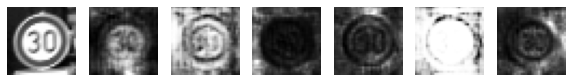

Epoch 4681 g_loss= 0.7439581 d_loss= 1.3887084 real_acc= 0.4 fake_acc= 0.82
Epoch 4682 g_loss= 0.7413352 d_loss= 1.3555868 real_acc= 0.56 fake_acc= 0.7
Epoch 4683 g_loss= 0.7509298 d_loss= 1.3492768 real_acc= 0.46 fake_acc= 0.7
Epoch 4684 g_loss= 0.72861147 d_loss= 1.3562593 real_acc= 0.54 fake_acc= 0.66
Epoch 4685 g_loss= 0.7256006 d_loss= 1.3262964 real_acc= 0.6 fake_acc= 0.76
Epoch 4686 g_loss= 0.7082811 d_loss= 1.3420182 real_acc= 0.66 fake_acc= 0.5
Epoch 4687 g_loss= 0.7141413 d_loss= 1.3193594 real_acc= 0.68 fake_acc= 0.64
Epoch 4688 g_loss= 0.7129478 d_loss= 1.3244576 real_acc= 0.74 fake_acc= 0.56
Epoch 4689 g_loss= 0.72280693 d_loss= 1.3233378 real_acc= 0.66 fake_acc= 0.7
Epoch 4690 g_loss= 0.73971635 d_loss= 1.3066113 real_acc= 0.7 fake_acc= 0.64


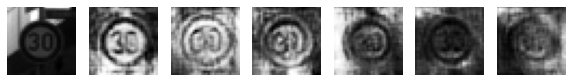

Epoch 4691 g_loss= 0.7450684 d_loss= 1.3417547 real_acc= 0.54 fake_acc= 0.64
Epoch 4692 g_loss= 0.76385224 d_loss= 1.2991418 real_acc= 0.64 fake_acc= 0.6
Epoch 4693 g_loss= 0.7443156 d_loss= 1.320552 real_acc= 0.7 fake_acc= 0.6
Epoch 4694 g_loss= 0.789063 d_loss= 1.257198 real_acc= 0.68 fake_acc= 0.72
Epoch 4695 g_loss= 0.75836474 d_loss= 1.2798967 real_acc= 0.7 fake_acc= 0.64
Epoch 4696 g_loss= 0.7686522 d_loss= 1.3008422 real_acc= 0.6 fake_acc= 0.6
Epoch 4697 g_loss= 0.76174426 d_loss= 1.2962316 real_acc= 0.64 fake_acc= 0.62
Epoch 4698 g_loss= 0.7461126 d_loss= 1.2875161 real_acc= 0.68 fake_acc= 0.6
Epoch 4699 g_loss= 0.73511195 d_loss= 1.3263142 real_acc= 0.58 fake_acc= 0.54
Epoch 4700 g_loss= 0.7168023 d_loss= 1.3228686 real_acc= 0.66 fake_acc= 0.5


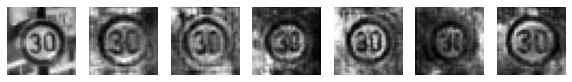

Epoch 4701 g_loss= 0.73585594 d_loss= 1.2861764 real_acc= 0.8 fake_acc= 0.58
Epoch 4702 g_loss= 0.7520379 d_loss= 1.2488382 real_acc= 0.72 fake_acc= 0.7
Epoch 4703 g_loss= 0.72002715 d_loss= 1.2835586 real_acc= 0.78 fake_acc= 0.64
Epoch 4704 g_loss= 0.7569412 d_loss= 1.3029798 real_acc= 0.64 fake_acc= 0.64
Epoch 4705 g_loss= 0.7536476 d_loss= 1.2486508 real_acc= 0.8 fake_acc= 0.64
Epoch 4706 g_loss= 0.7702413 d_loss= 1.3368571 real_acc= 0.6 fake_acc= 0.64
Epoch 4707 g_loss= 0.8126215 d_loss= 1.3329699 real_acc= 0.44 fake_acc= 0.74
Epoch 4708 g_loss= 0.7743116 d_loss= 1.3066014 real_acc= 0.62 fake_acc= 0.7
Epoch 4709 g_loss= 0.8082602 d_loss= 1.3301711 real_acc= 0.42 fake_acc= 0.7
Epoch 4710 g_loss= 0.7755653 d_loss= 1.3488543 real_acc= 0.52 fake_acc= 0.62


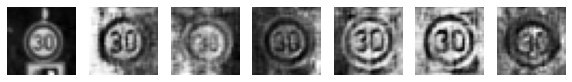

Epoch 4711 g_loss= 0.7829912 d_loss= 1.3015411 real_acc= 0.58 fake_acc= 0.64
Epoch 4712 g_loss= 0.76860815 d_loss= 1.404732 real_acc= 0.46 fake_acc= 0.64
Epoch 4713 g_loss= 0.7371594 d_loss= 1.3726033 real_acc= 0.6 fake_acc= 0.6
Epoch 4714 g_loss= 0.7438105 d_loss= 1.3314803 real_acc= 0.56 fake_acc= 0.66
Epoch 4715 g_loss= 0.7160239 d_loss= 1.3689933 real_acc= 0.56 fake_acc= 0.6
Epoch 4716 g_loss= 0.6859502 d_loss= 1.3410413 real_acc= 0.72 fake_acc= 0.46
Epoch 4717 g_loss= 0.6485751 d_loss= 1.3807354 real_acc= 0.72 fake_acc= 0.34
Epoch 4718 g_loss= 0.65642923 d_loss= 1.354528 real_acc= 0.7 fake_acc= 0.4
Epoch 4719 g_loss= 0.66393954 d_loss= 1.3460021 real_acc= 0.78 fake_acc= 0.36
Epoch 4720 g_loss= 0.6753916 d_loss= 1.3814516 real_acc= 0.66 fake_acc= 0.5


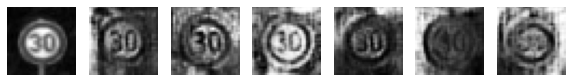

Epoch 4721 g_loss= 0.70408106 d_loss= 1.3333104 real_acc= 0.7 fake_acc= 0.5
Epoch 4722 g_loss= 0.7245917 d_loss= 1.3462923 real_acc= 0.58 fake_acc= 0.58
Epoch 4723 g_loss= 0.75467485 d_loss= 1.3652749 real_acc= 0.44 fake_acc= 0.7
Epoch 4724 g_loss= 0.77359694 d_loss= 1.4024544 real_acc= 0.38 fake_acc= 0.78
Epoch 4725 g_loss= 0.7732003 d_loss= 1.4168949 real_acc= 0.3 fake_acc= 0.72
Epoch 4726 g_loss= 0.7695832 d_loss= 1.365375 real_acc= 0.54 fake_acc= 0.68
Epoch 4727 g_loss= 0.75572586 d_loss= 1.3783624 real_acc= 0.44 fake_acc= 0.7
Epoch 4728 g_loss= 0.7552919 d_loss= 1.3556914 real_acc= 0.44 fake_acc= 0.8
Epoch 4729 g_loss= 0.7113911 d_loss= 1.3865526 real_acc= 0.5 fake_acc= 0.58
Epoch 4730 g_loss= 0.689905 d_loss= 1.3974276 real_acc= 0.5 fake_acc= 0.44


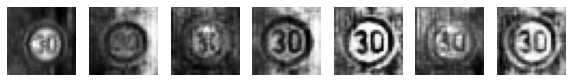

Epoch 4731 g_loss= 0.69394135 d_loss= 1.3594532 real_acc= 0.64 fake_acc= 0.5
Epoch 4732 g_loss= 0.6641008 d_loss= 1.3966615 real_acc= 0.64 fake_acc= 0.34
Epoch 4733 g_loss= 0.67246497 d_loss= 1.3647733 real_acc= 0.62 fake_acc= 0.42
Epoch 4734 g_loss= 0.64823014 d_loss= 1.4071169 real_acc= 0.6 fake_acc= 0.32
Epoch 4735 g_loss= 0.6791851 d_loss= 1.4021095 real_acc= 0.46 fake_acc= 0.48
Epoch 4736 g_loss= 0.7150021 d_loss= 1.3216329 real_acc= 0.64 fake_acc= 0.54
Epoch 4737 g_loss= 0.6924898 d_loss= 1.3802617 real_acc= 0.5 fake_acc= 0.4
Epoch 4738 g_loss= 0.7335384 d_loss= 1.3357439 real_acc= 0.56 fake_acc= 0.56
Epoch 4739 g_loss= 0.73748153 d_loss= 1.3712963 real_acc= 0.42 fake_acc= 0.68
Epoch 4740 g_loss= 0.75360537 d_loss= 1.3552067 real_acc= 0.48 fake_acc= 0.62


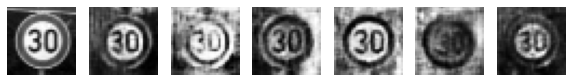

Epoch 4741 g_loss= 0.7621891 d_loss= 1.328676 real_acc= 0.48 fake_acc= 0.7
Epoch 4742 g_loss= 0.7507041 d_loss= 1.3938416 real_acc= 0.34 fake_acc= 0.68
Epoch 4743 g_loss= 0.7696999 d_loss= 1.3859781 real_acc= 0.3 fake_acc= 0.7
Epoch 4744 g_loss= 0.7776418 d_loss= 1.3640158 real_acc= 0.42 fake_acc= 0.68
Epoch 4745 g_loss= 0.7292477 d_loss= 1.4098458 real_acc= 0.3 fake_acc= 0.62
Epoch 4746 g_loss= 0.7595671 d_loss= 1.3593633 real_acc= 0.38 fake_acc= 0.68
Epoch 4747 g_loss= 0.76779276 d_loss= 1.3471823 real_acc= 0.44 fake_acc= 0.7
Epoch 4748 g_loss= 0.7396929 d_loss= 1.409698 real_acc= 0.44 fake_acc= 0.64
Epoch 4749 g_loss= 0.7583852 d_loss= 1.3649826 real_acc= 0.44 fake_acc= 0.72
Epoch 4750 g_loss= 0.7489968 d_loss= 1.3739319 real_acc= 0.44 fake_acc= 0.64


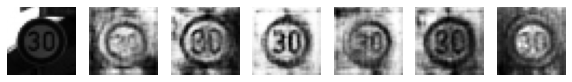

Epoch 4751 g_loss= 0.77563316 d_loss= 1.3414092 real_acc= 0.5 fake_acc= 0.76
Epoch 4752 g_loss= 0.73212564 d_loss= 1.4043478 real_acc= 0.34 fake_acc= 0.66
Epoch 4753 g_loss= 0.74240494 d_loss= 1.3856255 real_acc= 0.4 fake_acc= 0.7
Epoch 4754 g_loss= 0.7225142 d_loss= 1.4028976 real_acc= 0.42 fake_acc= 0.7
Epoch 4755 g_loss= 0.738571 d_loss= 1.3578366 real_acc= 0.54 fake_acc= 0.7
Epoch 4756 g_loss= 0.73344475 d_loss= 1.3630228 real_acc= 0.36 fake_acc= 0.72
Epoch 4757 g_loss= 0.7350132 d_loss= 1.4022949 real_acc= 0.4 fake_acc= 0.64
Epoch 4758 g_loss= 0.7130634 d_loss= 1.4255247 real_acc= 0.36 fake_acc= 0.64
Epoch 4759 g_loss= 0.73341423 d_loss= 1.4187633 real_acc= 0.36 fake_acc= 0.68
Epoch 4760 g_loss= 0.764097 d_loss= 1.3967113 real_acc= 0.32 fake_acc= 0.62


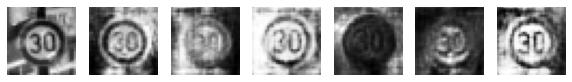

Epoch 4761 g_loss= 0.7409862 d_loss= 1.4372427 real_acc= 0.3 fake_acc= 0.72
Epoch 4762 g_loss= 0.7150315 d_loss= 1.4419079 real_acc= 0.34 fake_acc= 0.64
Epoch 4763 g_loss= 0.7174475 d_loss= 1.3946993 real_acc= 0.4 fake_acc= 0.54
Epoch 4764 g_loss= 0.73203015 d_loss= 1.4318984 real_acc= 0.28 fake_acc= 0.62
Epoch 4765 g_loss= 0.7454742 d_loss= 1.432549 real_acc= 0.24 fake_acc= 0.58
Epoch 4766 g_loss= 0.7673988 d_loss= 1.4129902 real_acc= 0.34 fake_acc= 0.7
Epoch 4767 g_loss= 0.75289077 d_loss= 1.4171925 real_acc= 0.26 fake_acc= 0.7
Epoch 4768 g_loss= 0.75647295 d_loss= 1.415167 real_acc= 0.2 fake_acc= 0.64
Epoch 4769 g_loss= 0.70157653 d_loss= 1.4217472 real_acc= 0.44 fake_acc= 0.56
Epoch 4770 g_loss= 0.6997694 d_loss= 1.4008067 real_acc= 0.48 fake_acc= 0.5


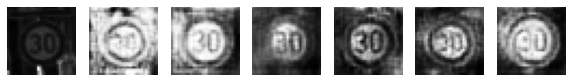

Epoch 4771 g_loss= 0.6818194 d_loss= 1.4162616 real_acc= 0.54 fake_acc= 0.5
Epoch 4772 g_loss= 0.67503893 d_loss= 1.4275872 real_acc= 0.62 fake_acc= 0.46
Epoch 4773 g_loss= 0.71396863 d_loss= 1.4129627 real_acc= 0.48 fake_acc= 0.54
Epoch 4774 g_loss= 0.71504503 d_loss= 1.40576 real_acc= 0.54 fake_acc= 0.44
Epoch 4775 g_loss= 0.73490614 d_loss= 1.3906658 real_acc= 0.46 fake_acc= 0.54
Epoch 4776 g_loss= 0.75405115 d_loss= 1.3787861 real_acc= 0.42 fake_acc= 0.66
Epoch 4777 g_loss= 0.7222375 d_loss= 1.3871596 real_acc= 0.6 fake_acc= 0.56
Epoch 4778 g_loss= 0.7071502 d_loss= 1.3948903 real_acc= 0.64 fake_acc= 0.48
Epoch 4779 g_loss= 0.6961872 d_loss= 1.379807 real_acc= 0.66 fake_acc= 0.46
Epoch 4780 g_loss= 0.6948581 d_loss= 1.3749304 real_acc= 0.68 fake_acc= 0.42


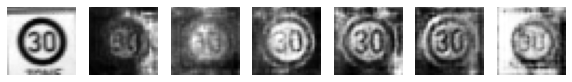

Epoch 4781 g_loss= 0.7010041 d_loss= 1.3715892 real_acc= 0.7 fake_acc= 0.48
Epoch 4782 g_loss= 0.69907916 d_loss= 1.3509345 real_acc= 0.64 fake_acc= 0.4
Epoch 4783 g_loss= 0.68534476 d_loss= 1.3752813 real_acc= 0.7 fake_acc= 0.38
Epoch 4784 g_loss= 0.71403074 d_loss= 1.3459938 real_acc= 0.68 fake_acc= 0.44
Epoch 4785 g_loss= 0.70353043 d_loss= 1.3441597 real_acc= 0.7 fake_acc= 0.48
Epoch 4786 g_loss= 0.7335186 d_loss= 1.3287289 real_acc= 0.74 fake_acc= 0.5
Epoch 4787 g_loss= 0.7388767 d_loss= 1.3375152 real_acc= 0.68 fake_acc= 0.62
Epoch 4788 g_loss= 0.7324796 d_loss= 1.3318574 real_acc= 0.7 fake_acc= 0.6
Epoch 4789 g_loss= 0.71761274 d_loss= 1.3637512 real_acc= 0.62 fake_acc= 0.52
Epoch 4790 g_loss= 0.71947426 d_loss= 1.3225999 real_acc= 0.68 fake_acc= 0.56


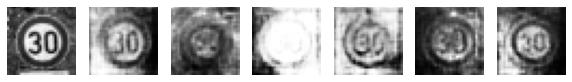

Epoch 4791 g_loss= 0.7125288 d_loss= 1.3381238 real_acc= 0.7 fake_acc= 0.5
Epoch 4792 g_loss= 0.7016548 d_loss= 1.3406167 real_acc= 0.7 fake_acc= 0.52
Epoch 4793 g_loss= 0.7004946 d_loss= 1.327762 real_acc= 0.76 fake_acc= 0.42
Epoch 4794 g_loss= 0.6964898 d_loss= 1.3215697 real_acc= 0.84 fake_acc= 0.46
Epoch 4795 g_loss= 0.70255905 d_loss= 1.3049346 real_acc= 0.86 fake_acc= 0.48
Epoch 4796 g_loss= 0.70013726 d_loss= 1.3184843 real_acc= 0.8 fake_acc= 0.44
Epoch 4797 g_loss= 0.72218376 d_loss= 1.3165375 real_acc= 0.78 fake_acc= 0.52
Epoch 4798 g_loss= 0.7528487 d_loss= 1.3036311 real_acc= 0.68 fake_acc= 0.68
Epoch 4799 g_loss= 0.7538713 d_loss= 1.3179613 real_acc= 0.58 fake_acc= 0.62
Epoch 4800 g_loss= 0.76979774 d_loss= 1.2878404 real_acc= 0.66 fake_acc= 0.66


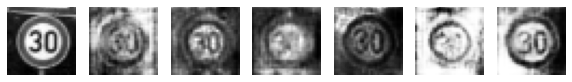

Epoch 4801 g_loss= 0.7720839 d_loss= 1.3154893 real_acc= 0.54 fake_acc= 0.66
Epoch 4802 g_loss= 0.75861657 d_loss= 1.3159469 real_acc= 0.7 fake_acc= 0.72
Epoch 4803 g_loss= 0.75309175 d_loss= 1.2882366 real_acc= 0.68 fake_acc= 0.6
Epoch 4804 g_loss= 0.7509248 d_loss= 1.3080544 real_acc= 0.72 fake_acc= 0.68
Epoch 4805 g_loss= 0.742187 d_loss= 1.3000361 real_acc= 0.7 fake_acc= 0.66
Epoch 4806 g_loss= 0.739382 d_loss= 1.2757083 real_acc= 0.82 fake_acc= 0.62
Epoch 4807 g_loss= 0.7325203 d_loss= 1.2927179 real_acc= 0.78 fake_acc= 0.66
Epoch 4808 g_loss= 0.73367465 d_loss= 1.3054862 real_acc= 0.72 fake_acc= 0.6
Epoch 4809 g_loss= 0.7535326 d_loss= 1.3258703 real_acc= 0.66 fake_acc= 0.6
Epoch 4810 g_loss= 0.74043345 d_loss= 1.3498597 real_acc= 0.58 fake_acc= 0.64


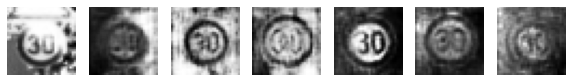

Epoch 4811 g_loss= 0.7667019 d_loss= 1.3318038 real_acc= 0.58 fake_acc= 0.7
Epoch 4812 g_loss= 0.770389 d_loss= 1.3119472 real_acc= 0.56 fake_acc= 0.62
Epoch 4813 g_loss= 0.7795608 d_loss= 1.3243086 real_acc= 0.54 fake_acc= 0.66
Epoch 4814 g_loss= 0.7488589 d_loss= 1.3523203 real_acc= 0.56 fake_acc= 0.7
Epoch 4815 g_loss= 0.729568 d_loss= 1.3508971 real_acc= 0.56 fake_acc= 0.54
Epoch 4816 g_loss= 0.7176958 d_loss= 1.338424 real_acc= 0.64 fake_acc= 0.56
Epoch 4817 g_loss= 0.7114898 d_loss= 1.3520427 real_acc= 0.62 fake_acc= 0.54
Epoch 4818 g_loss= 0.68927383 d_loss= 1.3007792 real_acc= 0.8 fake_acc= 0.38
Epoch 4819 g_loss= 0.68570703 d_loss= 1.354786 real_acc= 0.64 fake_acc= 0.42
Epoch 4820 g_loss= 0.6633495 d_loss= 1.3624411 real_acc= 0.72 fake_acc= 0.34


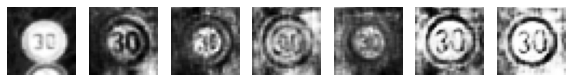

Epoch 4821 g_loss= 0.6992244 d_loss= 1.3402032 real_acc= 0.62 fake_acc= 0.46
Epoch 4822 g_loss= 0.6878627 d_loss= 1.3385667 real_acc= 0.76 fake_acc= 0.44
Epoch 4823 g_loss= 0.7137275 d_loss= 1.3442643 real_acc= 0.68 fake_acc= 0.48
Epoch 4824 g_loss= 0.7336733 d_loss= 1.3701633 real_acc= 0.46 fake_acc= 0.6
Epoch 4825 g_loss= 0.7128546 d_loss= 1.3552935 real_acc= 0.54 fake_acc= 0.54
Epoch 4826 g_loss= 0.69619703 d_loss= 1.3674428 real_acc= 0.54 fake_acc= 0.46
Epoch 4827 g_loss= 0.74175644 d_loss= 1.3697363 real_acc= 0.44 fake_acc= 0.56
Epoch 4828 g_loss= 0.72891337 d_loss= 1.33316 real_acc= 0.64 fake_acc= 0.56
Epoch 4829 g_loss= 0.72843504 d_loss= 1.3756179 real_acc= 0.44 fake_acc= 0.62
Epoch 4830 g_loss= 0.7260017 d_loss= 1.3539228 real_acc= 0.58 fake_acc= 0.58


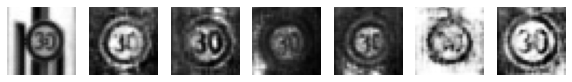

Epoch 4831 g_loss= 0.7344434 d_loss= 1.3434424 real_acc= 0.6 fake_acc= 0.58
Epoch 4832 g_loss= 0.71836746 d_loss= 1.3606912 real_acc= 0.64 fake_acc= 0.6
Epoch 4833 g_loss= 0.7127786 d_loss= 1.3947343 real_acc= 0.54 fake_acc= 0.48
Epoch 4834 g_loss= 0.70494443 d_loss= 1.4195526 real_acc= 0.4 fake_acc= 0.44
Epoch 4835 g_loss= 0.6911017 d_loss= 1.4027025 real_acc= 0.5 fake_acc= 0.5
Epoch 4836 g_loss= 0.70694596 d_loss= 1.3841469 real_acc= 0.5 fake_acc= 0.52
Epoch 4837 g_loss= 0.7144085 d_loss= 1.3687572 real_acc= 0.56 fake_acc= 0.52
Epoch 4838 g_loss= 0.68283117 d_loss= 1.4015989 real_acc= 0.5 fake_acc= 0.48
Epoch 4839 g_loss= 0.68073213 d_loss= 1.3881608 real_acc= 0.58 fake_acc= 0.42
Epoch 4840 g_loss= 0.6954349 d_loss= 1.3798194 real_acc= 0.62 fake_acc= 0.42


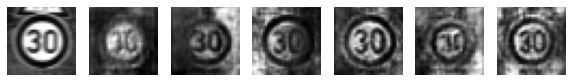

Epoch 4841 g_loss= 0.6962748 d_loss= 1.3975434 real_acc= 0.46 fake_acc= 0.54
Epoch 4842 g_loss= 0.6860741 d_loss= 1.4036024 real_acc= 0.58 fake_acc= 0.42
Epoch 4843 g_loss= 0.6901592 d_loss= 1.4039643 real_acc= 0.64 fake_acc= 0.36
Epoch 4844 g_loss= 0.6859625 d_loss= 1.4060884 real_acc= 0.58 fake_acc= 0.48
Epoch 4845 g_loss= 0.68789405 d_loss= 1.4039497 real_acc= 0.58 fake_acc= 0.44
Epoch 4846 g_loss= 0.71451795 d_loss= 1.345623 real_acc= 0.62 fake_acc= 0.56
Epoch 4847 g_loss= 0.7152438 d_loss= 1.3529029 real_acc= 0.56 fake_acc= 0.48
Epoch 4848 g_loss= 0.69770265 d_loss= 1.383152 real_acc= 0.54 fake_acc= 0.54
Epoch 4849 g_loss= 0.6946831 d_loss= 1.3601086 real_acc= 0.62 fake_acc= 0.5
Epoch 4850 g_loss= 0.6897983 d_loss= 1.4139802 real_acc= 0.46 fake_acc= 0.46


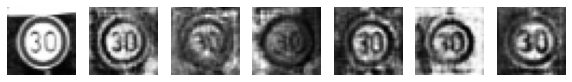

Epoch 4851 g_loss= 0.74333435 d_loss= 1.3514422 real_acc= 0.52 fake_acc= 0.66
Epoch 4852 g_loss= 0.7156524 d_loss= 1.3638297 real_acc= 0.52 fake_acc= 0.56
Epoch 4853 g_loss= 0.74548346 d_loss= 1.382188 real_acc= 0.38 fake_acc= 0.8
Epoch 4854 g_loss= 0.7425186 d_loss= 1.3921692 real_acc= 0.38 fake_acc= 0.7
Epoch 4855 g_loss= 0.7278416 d_loss= 1.3775467 real_acc= 0.44 fake_acc= 0.64
Epoch 4856 g_loss= 0.7378708 d_loss= 1.3871274 real_acc= 0.42 fake_acc= 0.72
Epoch 4857 g_loss= 0.6958233 d_loss= 1.3768442 real_acc= 0.6 fake_acc= 0.44
Epoch 4858 g_loss= 0.71253175 d_loss= 1.3582245 real_acc= 0.62 fake_acc= 0.46
Epoch 4859 g_loss= 0.7137114 d_loss= 1.349956 real_acc= 0.64 fake_acc= 0.56
Epoch 4860 g_loss= 0.6993368 d_loss= 1.3765843 real_acc= 0.52 fake_acc= 0.52


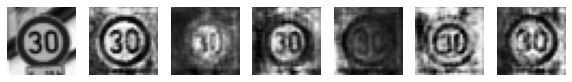

Epoch 4861 g_loss= 0.67533034 d_loss= 1.3432415 real_acc= 0.68 fake_acc= 0.36
Epoch 4862 g_loss= 0.6865983 d_loss= 1.3439255 real_acc= 0.68 fake_acc= 0.44
Epoch 4863 g_loss= 0.70219773 d_loss= 1.3214097 real_acc= 0.78 fake_acc= 0.5
Epoch 4864 g_loss= 0.6853437 d_loss= 1.349225 real_acc= 0.74 fake_acc= 0.44
Epoch 4865 g_loss= 0.70030475 d_loss= 1.360445 real_acc= 0.56 fake_acc= 0.54
Epoch 4866 g_loss= 0.68609315 d_loss= 1.3665197 real_acc= 0.6 fake_acc= 0.46
Epoch 4867 g_loss= 0.7196617 d_loss= 1.3336111 real_acc= 0.68 fake_acc= 0.64
Epoch 4868 g_loss= 0.7357499 d_loss= 1.3287457 real_acc= 0.54 fake_acc= 0.76
Epoch 4869 g_loss= 0.74114007 d_loss= 1.3139243 real_acc= 0.56 fake_acc= 0.78
Epoch 4870 g_loss= 0.74388415 d_loss= 1.3739538 real_acc= 0.46 fake_acc= 0.76


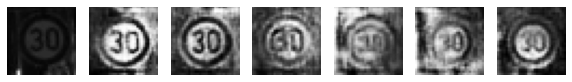

Epoch 4871 g_loss= 0.7633715 d_loss= 1.3122253 real_acc= 0.54 fake_acc= 0.82
Epoch 4872 g_loss= 0.75847113 d_loss= 1.3131516 real_acc= 0.48 fake_acc= 0.78
Epoch 4873 g_loss= 0.74668956 d_loss= 1.3187916 real_acc= 0.46 fake_acc= 0.8
Epoch 4874 g_loss= 0.7531084 d_loss= 1.3221211 real_acc= 0.44 fake_acc= 0.7
Epoch 4875 g_loss= 0.729665 d_loss= 1.3459575 real_acc= 0.5 fake_acc= 0.72
Epoch 4876 g_loss= 0.7170433 d_loss= 1.3452995 real_acc= 0.56 fake_acc= 0.6
Epoch 4877 g_loss= 0.7289462 d_loss= 1.3353404 real_acc= 0.64 fake_acc= 0.62
Epoch 4878 g_loss= 0.7156994 d_loss= 1.324914 real_acc= 0.68 fake_acc= 0.58
Epoch 4879 g_loss= 0.7305325 d_loss= 1.3114347 real_acc= 0.66 fake_acc= 0.62
Epoch 4880 g_loss= 0.6999101 d_loss= 1.3790063 real_acc= 0.6 fake_acc= 0.58


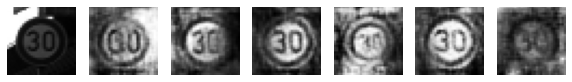

Epoch 4881 g_loss= 0.71822816 d_loss= 1.3416951 real_acc= 0.68 fake_acc= 0.64
Epoch 4882 g_loss= 0.70998716 d_loss= 1.3579123 real_acc= 0.56 fake_acc= 0.64
Epoch 4883 g_loss= 0.7140334 d_loss= 1.3542812 real_acc= 0.54 fake_acc= 0.58
Epoch 4884 g_loss= 0.71457756 d_loss= 1.3345363 real_acc= 0.7 fake_acc= 0.56
Epoch 4885 g_loss= 0.7352298 d_loss= 1.331101 real_acc= 0.62 fake_acc= 0.64
Epoch 4886 g_loss= 0.7364188 d_loss= 1.347008 real_acc= 0.48 fake_acc= 0.7
Epoch 4887 g_loss= 0.7404773 d_loss= 1.344027 real_acc= 0.58 fake_acc= 0.7
Epoch 4888 g_loss= 0.7288567 d_loss= 1.3646457 real_acc= 0.54 fake_acc= 0.7
Epoch 4889 g_loss= 0.7525458 d_loss= 1.3565798 real_acc= 0.42 fake_acc= 0.68
Epoch 4890 g_loss= 0.72128004 d_loss= 1.3587428 real_acc= 0.52 fake_acc= 0.64


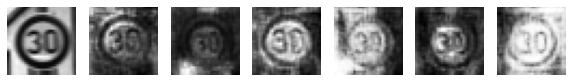

Epoch 4891 g_loss= 0.7091693 d_loss= 1.3819232 real_acc= 0.52 fake_acc= 0.56
Epoch 4892 g_loss= 0.72750425 d_loss= 1.3452168 real_acc= 0.64 fake_acc= 0.62
Epoch 4893 g_loss= 0.7230488 d_loss= 1.3436716 real_acc= 0.68 fake_acc= 0.66
Epoch 4894 g_loss= 0.7021891 d_loss= 1.3402795 real_acc= 0.8 fake_acc= 0.46
Epoch 4895 g_loss= 0.6947977 d_loss= 1.3730924 real_acc= 0.62 fake_acc= 0.44
Epoch 4896 g_loss= 0.6959835 d_loss= 1.344701 real_acc= 0.76 fake_acc= 0.48
Epoch 4897 g_loss= 0.718156 d_loss= 1.3393302 real_acc= 0.72 fake_acc= 0.54
Epoch 4898 g_loss= 0.7143258 d_loss= 1.3404095 real_acc= 0.68 fake_acc= 0.5
Epoch 4899 g_loss= 0.74562556 d_loss= 1.3288784 real_acc= 0.6 fake_acc= 0.56
Epoch 4900 g_loss= 0.7325183 d_loss= 1.3756905 real_acc= 0.46 fake_acc= 0.54


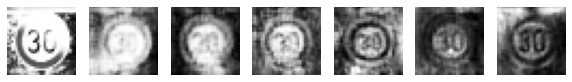

Epoch 4901 g_loss= 0.7454064 d_loss= 1.346915 real_acc= 0.54 fake_acc= 0.6
Epoch 4902 g_loss= 0.7314887 d_loss= 1.3750653 real_acc= 0.46 fake_acc= 0.46
Epoch 4903 g_loss= 0.7385546 d_loss= 1.3448849 real_acc= 0.68 fake_acc= 0.58
Epoch 4904 g_loss= 0.72765505 d_loss= 1.3431265 real_acc= 0.64 fake_acc= 0.5
Epoch 4905 g_loss= 0.7197775 d_loss= 1.3218932 real_acc= 0.74 fake_acc= 0.54
Epoch 4906 g_loss= 0.7163086 d_loss= 1.3456938 real_acc= 0.66 fake_acc= 0.44
Epoch 4907 g_loss= 0.70995337 d_loss= 1.3434232 real_acc= 0.76 fake_acc= 0.44
Epoch 4908 g_loss= 0.7060524 d_loss= 1.3504226 real_acc= 0.7 fake_acc= 0.48
Epoch 4909 g_loss= 0.7077628 d_loss= 1.3717885 real_acc= 0.64 fake_acc= 0.4
Epoch 4910 g_loss= 0.71208435 d_loss= 1.3233666 real_acc= 0.72 fake_acc= 0.48


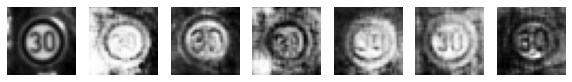

Epoch 4911 g_loss= 0.7277232 d_loss= 1.3286388 real_acc= 0.74 fake_acc= 0.56
Epoch 4912 g_loss= 0.7305036 d_loss= 1.350481 real_acc= 0.6 fake_acc= 0.52
Epoch 4913 g_loss= 0.74522406 d_loss= 1.3366784 real_acc= 0.52 fake_acc= 0.5
Epoch 4914 g_loss= 0.7552292 d_loss= 1.3410053 real_acc= 0.56 fake_acc= 0.48
Epoch 4915 g_loss= 0.75220215 d_loss= 1.3201048 real_acc= 0.64 fake_acc= 0.56
Epoch 4916 g_loss= 0.7454045 d_loss= 1.3409426 real_acc= 0.54 fake_acc= 0.48
Epoch 4917 g_loss= 0.7442066 d_loss= 1.3361053 real_acc= 0.64 fake_acc= 0.56
Epoch 4918 g_loss= 0.7565989 d_loss= 1.3577267 real_acc= 0.56 fake_acc= 0.58
Epoch 4919 g_loss= 0.74429345 d_loss= 1.3439071 real_acc= 0.54 fake_acc= 0.58
Epoch 4920 g_loss= 0.73975366 d_loss= 1.3659717 real_acc= 0.6 fake_acc= 0.44


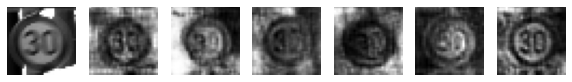

Epoch 4921 g_loss= 0.73313123 d_loss= 1.3866601 real_acc= 0.5 fake_acc= 0.56
Epoch 4922 g_loss= 0.7170315 d_loss= 1.3672144 real_acc= 0.6 fake_acc= 0.4
Epoch 4923 g_loss= 0.70548284 d_loss= 1.3599719 real_acc= 0.6 fake_acc= 0.5
Epoch 4924 g_loss= 0.66955626 d_loss= 1.3892293 real_acc= 0.72 fake_acc= 0.36
Epoch 4925 g_loss= 0.6519685 d_loss= 1.4034952 real_acc= 0.62 fake_acc= 0.3
Epoch 4926 g_loss= 0.6585329 d_loss= 1.4132614 real_acc= 0.68 fake_acc= 0.36
Epoch 4927 g_loss= 0.70014834 d_loss= 1.382211 real_acc= 0.64 fake_acc= 0.44
Epoch 4928 g_loss= 0.70130587 d_loss= 1.343406 real_acc= 0.64 fake_acc= 0.52
Epoch 4929 g_loss= 0.724732 d_loss= 1.4095573 real_acc= 0.6 fake_acc= 0.58
Epoch 4930 g_loss= 0.7290483 d_loss= 1.3817387 real_acc= 0.48 fake_acc= 0.52


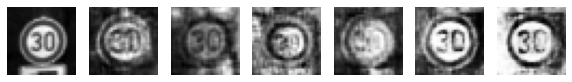

Epoch 4931 g_loss= 0.7302109 d_loss= 1.4130211 real_acc= 0.42 fake_acc= 0.54
Epoch 4932 g_loss= 0.7313573 d_loss= 1.4269769 real_acc= 0.46 fake_acc= 0.62
Epoch 4933 g_loss= 0.7010559 d_loss= 1.4260304 real_acc= 0.54 fake_acc= 0.54
Epoch 4934 g_loss= 0.7087902 d_loss= 1.4345499 real_acc= 0.46 fake_acc= 0.58
Epoch 4935 g_loss= 0.73130625 d_loss= 1.3834727 real_acc= 0.52 fake_acc= 0.64
Epoch 4936 g_loss= 0.6837918 d_loss= 1.4513757 real_acc= 0.48 fake_acc= 0.48
Epoch 4937 g_loss= 0.6830417 d_loss= 1.3822577 real_acc= 0.64 fake_acc= 0.56
Epoch 4938 g_loss= 0.6597203 d_loss= 1.413125 real_acc= 0.6 fake_acc= 0.42
Epoch 4939 g_loss= 0.658201 d_loss= 1.3887234 real_acc= 0.66 fake_acc= 0.36
Epoch 4940 g_loss= 0.63502795 d_loss= 1.4834363 real_acc= 0.46 fake_acc= 0.4


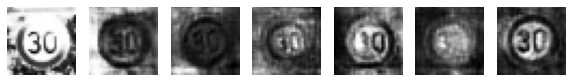

Epoch 4941 g_loss= 0.68060994 d_loss= 1.3457546 real_acc= 0.72 fake_acc= 0.56
Epoch 4942 g_loss= 0.68693596 d_loss= 1.4186162 real_acc= 0.5 fake_acc= 0.54
Epoch 4943 g_loss= 0.7226467 d_loss= 1.4186327 real_acc= 0.48 fake_acc= 0.62
Epoch 4944 g_loss= 0.71655416 d_loss= 1.3684924 real_acc= 0.62 fake_acc= 0.58
Epoch 4945 g_loss= 0.7451398 d_loss= 1.3742259 real_acc= 0.44 fake_acc= 0.72
Epoch 4946 g_loss= 0.77158594 d_loss= 1.3516974 real_acc= 0.52 fake_acc= 0.7
Epoch 4947 g_loss= 0.7708738 d_loss= 1.4224317 real_acc= 0.26 fake_acc= 0.76
Epoch 4948 g_loss= 0.782157 d_loss= 1.3925877 real_acc= 0.32 fake_acc= 0.82
Epoch 4949 g_loss= 0.77676225 d_loss= 1.3788075 real_acc= 0.34 fake_acc= 0.74
Epoch 4950 g_loss= 0.80493224 d_loss= 1.3271232 real_acc= 0.44 fake_acc= 0.96


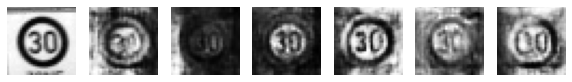

Epoch 4951 g_loss= 0.8061327 d_loss= 1.2947407 real_acc= 0.46 fake_acc= 0.82
Epoch 4952 g_loss= 0.78129774 d_loss= 1.3239073 real_acc= 0.52 fake_acc= 0.76
Epoch 4953 g_loss= 0.7559882 d_loss= 1.3519113 real_acc= 0.46 fake_acc= 0.74
Epoch 4954 g_loss= 0.74076515 d_loss= 1.3461385 real_acc= 0.54 fake_acc= 0.76
Epoch 4955 g_loss= 0.7545142 d_loss= 1.3247426 real_acc= 0.5 fake_acc= 0.66
Epoch 4956 g_loss= 0.74768585 d_loss= 1.2984822 real_acc= 0.66 fake_acc= 0.72
Epoch 4957 g_loss= 0.75463873 d_loss= 1.3358179 real_acc= 0.46 fake_acc= 0.72
Epoch 4958 g_loss= 0.76411 d_loss= 1.3154032 real_acc= 0.56 fake_acc= 0.64
Epoch 4959 g_loss= 0.7908074 d_loss= 1.2927959 real_acc= 0.58 fake_acc= 0.68
Epoch 4960 g_loss= 0.80673516 d_loss= 1.3179605 real_acc= 0.36 fake_acc= 0.78


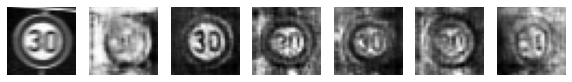

Epoch 4961 g_loss= 0.8017042 d_loss= 1.287087 real_acc= 0.44 fake_acc= 0.78
Epoch 4962 g_loss= 0.7778964 d_loss= 1.332216 real_acc= 0.48 fake_acc= 0.62
Epoch 4963 g_loss= 0.8144867 d_loss= 1.2620153 real_acc= 0.5 fake_acc= 0.72
Epoch 4964 g_loss= 0.8139894 d_loss= 1.2673427 real_acc= 0.62 fake_acc= 0.76
Epoch 4965 g_loss= 0.7946172 d_loss= 1.3074179 real_acc= 0.44 fake_acc= 0.72
Epoch 4966 g_loss= 0.7854342 d_loss= 1.3204162 real_acc= 0.54 fake_acc= 0.72
Epoch 4967 g_loss= 0.7787892 d_loss= 1.319326 real_acc= 0.46 fake_acc= 0.66
Epoch 4968 g_loss= 0.78767306 d_loss= 1.3525608 real_acc= 0.34 fake_acc= 0.68
Epoch 4969 g_loss= 0.77178746 d_loss= 1.3254888 real_acc= 0.52 fake_acc= 0.64
Epoch 4970 g_loss= 0.77968335 d_loss= 1.3072772 real_acc= 0.44 fake_acc= 0.66


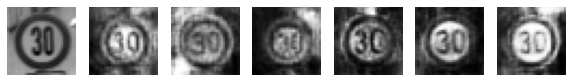

Epoch 4971 g_loss= 0.75203454 d_loss= 1.376992 real_acc= 0.48 fake_acc= 0.6
Epoch 4972 g_loss= 0.7556871 d_loss= 1.3593122 real_acc= 0.5 fake_acc= 0.64
Epoch 4973 g_loss= 0.7763167 d_loss= 1.3317221 real_acc= 0.52 fake_acc= 0.68
Epoch 4974 g_loss= 0.765895 d_loss= 1.33743 real_acc= 0.52 fake_acc= 0.68
Epoch 4975 g_loss= 0.7671827 d_loss= 1.3254869 real_acc= 0.52 fake_acc= 0.64
Epoch 4976 g_loss= 0.7758944 d_loss= 1.3179307 real_acc= 0.56 fake_acc= 0.7
Epoch 4977 g_loss= 0.7753832 d_loss= 1.3248614 real_acc= 0.5 fake_acc= 0.68
Epoch 4978 g_loss= 0.74506736 d_loss= 1.3615808 real_acc= 0.5 fake_acc= 0.64
Epoch 4979 g_loss= 0.7861852 d_loss= 1.3725643 real_acc= 0.34 fake_acc= 0.66
Epoch 4980 g_loss= 0.7559378 d_loss= 1.3383167 real_acc= 0.6 fake_acc= 0.68


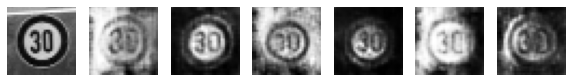

Epoch 4981 g_loss= 0.7649174 d_loss= 1.3486073 real_acc= 0.5 fake_acc= 0.7
Epoch 4982 g_loss= 0.73425233 d_loss= 1.3368348 real_acc= 0.62 fake_acc= 0.6
Epoch 4983 g_loss= 0.745397 d_loss= 1.2567391 real_acc= 0.84 fake_acc= 0.6
Epoch 4984 g_loss= 0.69260734 d_loss= 1.3155897 real_acc= 0.76 fake_acc= 0.46
Epoch 4985 g_loss= 0.69527596 d_loss= 1.3161517 real_acc= 0.8 fake_acc= 0.4
Epoch 4986 g_loss= 0.7003977 d_loss= 1.334529 real_acc= 0.74 fake_acc= 0.52
Epoch 4987 g_loss= 0.7308778 d_loss= 1.2767725 real_acc= 0.8 fake_acc= 0.54
Epoch 4988 g_loss= 0.7496207 d_loss= 1.2875037 real_acc= 0.66 fake_acc= 0.66
Epoch 4989 g_loss= 0.75123954 d_loss= 1.2856688 real_acc= 0.7 fake_acc= 0.72
Epoch 4990 g_loss= 0.76902544 d_loss= 1.281745 real_acc= 0.7 fake_acc= 0.72


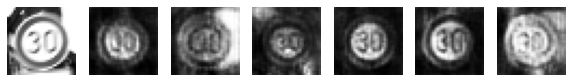

Epoch 4991 g_loss= 0.76079345 d_loss= 1.2984321 real_acc= 0.6 fake_acc= 0.76
Epoch 4992 g_loss= 0.7715181 d_loss= 1.2740846 real_acc= 0.66 fake_acc= 0.78
Epoch 4993 g_loss= 0.772531 d_loss= 1.2744608 real_acc= 0.68 fake_acc= 0.7
Epoch 4994 g_loss= 0.7721606 d_loss= 1.2501879 real_acc= 0.72 fake_acc= 0.76
Epoch 4995 g_loss= 0.7569569 d_loss= 1.289814 real_acc= 0.64 fake_acc= 0.76
Epoch 4996 g_loss= 0.7638364 d_loss= 1.289367 real_acc= 0.66 fake_acc= 0.76
Epoch 4997 g_loss= 0.75129753 d_loss= 1.2920423 real_acc= 0.6 fake_acc= 0.74
Epoch 4998 g_loss= 0.745028 d_loss= 1.2944801 real_acc= 0.68 fake_acc= 0.74
Epoch 4999 g_loss= 0.72216904 d_loss= 1.2666483 real_acc= 0.86 fake_acc= 0.62
Epoch 5000 g_loss= 0.7126453 d_loss= 1.3051319 real_acc= 0.68 fake_acc= 0.52


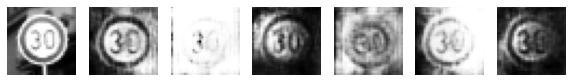

Epoch 5001 g_loss= 0.70974916 d_loss= 1.3056767 real_acc= 0.66 fake_acc= 0.66
Epoch 5002 g_loss= 0.7515743 d_loss= 1.3135599 real_acc= 0.6 fake_acc= 0.7
Epoch 5003 g_loss= 0.7192789 d_loss= 1.3263636 real_acc= 0.58 fake_acc= 0.66
Epoch 5004 g_loss= 0.72487473 d_loss= 1.3280258 real_acc= 0.6 fake_acc= 0.62
Epoch 5005 g_loss= 0.7347563 d_loss= 1.3411694 real_acc= 0.56 fake_acc= 0.7
Epoch 5006 g_loss= 0.7112686 d_loss= 1.3975773 real_acc= 0.5 fake_acc= 0.56
Epoch 5007 g_loss= 0.7386988 d_loss= 1.3553207 real_acc= 0.52 fake_acc= 0.66
Epoch 5008 g_loss= 0.7105869 d_loss= 1.3565346 real_acc= 0.54 fake_acc= 0.48
Epoch 5009 g_loss= 0.70756537 d_loss= 1.4319721 real_acc= 0.44 fake_acc= 0.6
Epoch 5010 g_loss= 0.6908408 d_loss= 1.3921282 real_acc= 0.46 fake_acc= 0.48


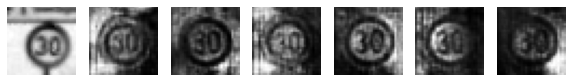

Epoch 5011 g_loss= 0.65280503 d_loss= 1.4125886 real_acc= 0.64 fake_acc= 0.38
Epoch 5012 g_loss= 0.64542437 d_loss= 1.4487936 real_acc= 0.54 fake_acc= 0.38
Epoch 5013 g_loss= 0.6590245 d_loss= 1.4297006 real_acc= 0.58 fake_acc= 0.4
Epoch 5014 g_loss= 0.65159297 d_loss= 1.455477 real_acc= 0.54 fake_acc= 0.44
Epoch 5015 g_loss= 0.6528759 d_loss= 1.4361293 real_acc= 0.54 fake_acc= 0.4
Epoch 5016 g_loss= 0.64191747 d_loss= 1.4585276 real_acc= 0.56 fake_acc= 0.34
Epoch 5017 g_loss= 0.6354353 d_loss= 1.4987817 real_acc= 0.42 fake_acc= 0.38
Epoch 5018 g_loss= 0.643441 d_loss= 1.4666684 real_acc= 0.44 fake_acc= 0.36
Epoch 5019 g_loss= 0.6477978 d_loss= 1.5136496 real_acc= 0.4 fake_acc= 0.32
Epoch 5020 g_loss= 0.6802894 d_loss= 1.4593127 real_acc= 0.34 fake_acc= 0.44


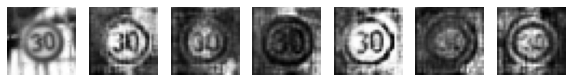

Epoch 5021 g_loss= 0.6659041 d_loss= 1.4670539 real_acc= 0.5 fake_acc= 0.4
Epoch 5022 g_loss= 0.67058724 d_loss= 1.5185139 real_acc= 0.36 fake_acc= 0.5
Epoch 5023 g_loss= 0.66928697 d_loss= 1.4971073 real_acc= 0.38 fake_acc= 0.42
Epoch 5024 g_loss= 0.6695385 d_loss= 1.4575592 real_acc= 0.36 fake_acc= 0.4
Epoch 5025 g_loss= 0.6526722 d_loss= 1.5505052 real_acc= 0.28 fake_acc= 0.38
Epoch 5026 g_loss= 0.6540585 d_loss= 1.4829142 real_acc= 0.36 fake_acc= 0.38
Epoch 5027 g_loss= 0.65238047 d_loss= 1.4965682 real_acc= 0.4 fake_acc= 0.4
Epoch 5028 g_loss= 0.68865293 d_loss= 1.4246497 real_acc= 0.5 fake_acc= 0.44
Epoch 5029 g_loss= 0.6865286 d_loss= 1.4070925 real_acc= 0.52 fake_acc= 0.56
Epoch 5030 g_loss= 0.69554067 d_loss= 1.4356339 real_acc= 0.44 fake_acc= 0.58


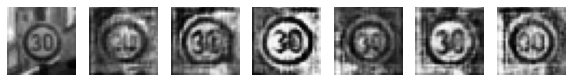

Epoch 5031 g_loss= 0.65923715 d_loss= 1.4639747 real_acc= 0.4 fake_acc= 0.4
Epoch 5032 g_loss= 0.6671002 d_loss= 1.4337649 real_acc= 0.52 fake_acc= 0.36
Epoch 5033 g_loss= 0.6789956 d_loss= 1.4507754 real_acc= 0.34 fake_acc= 0.44
Epoch 5034 g_loss= 0.7052742 d_loss= 1.4104321 real_acc= 0.44 fake_acc= 0.6
Epoch 5035 g_loss= 0.7134653 d_loss= 1.4098952 real_acc= 0.48 fake_acc= 0.6
Epoch 5036 g_loss= 0.7242399 d_loss= 1.37779 real_acc= 0.48 fake_acc= 0.64
Epoch 5037 g_loss= 0.7265829 d_loss= 1.3898711 real_acc= 0.42 fake_acc= 0.68
Epoch 5038 g_loss= 0.7130316 d_loss= 1.3777531 real_acc= 0.52 fake_acc= 0.54
Epoch 5039 g_loss= 0.7060405 d_loss= 1.3689636 real_acc= 0.56 fake_acc= 0.6
Epoch 5040 g_loss= 0.72708875 d_loss= 1.3244268 real_acc= 0.6 fake_acc= 0.68


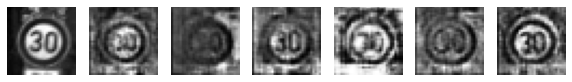

Epoch 5041 g_loss= 0.7426456 d_loss= 1.3321276 real_acc= 0.64 fake_acc= 0.66
Epoch 5042 g_loss= 0.7407686 d_loss= 1.3217818 real_acc= 0.6 fake_acc= 0.6
Epoch 5043 g_loss= 0.78432405 d_loss= 1.3147968 real_acc= 0.52 fake_acc= 0.84
Epoch 5044 g_loss= 0.77405953 d_loss= 1.3650813 real_acc= 0.42 fake_acc= 0.8
Epoch 5045 g_loss= 0.7882661 d_loss= 1.3238003 real_acc= 0.38 fake_acc= 0.88
Epoch 5046 g_loss= 0.8138011 d_loss= 1.3325475 real_acc= 0.38 fake_acc= 0.96
Epoch 5047 g_loss= 0.8200076 d_loss= 1.3369634 real_acc= 0.38 fake_acc= 0.88
Epoch 5048 g_loss= 0.7998023 d_loss= 1.289227 real_acc= 0.54 fake_acc= 0.86
Epoch 5049 g_loss= 0.77692395 d_loss= 1.3250347 real_acc= 0.52 fake_acc= 0.8
Epoch 5050 g_loss= 0.74989367 d_loss= 1.3209101 real_acc= 0.64 fake_acc= 0.62


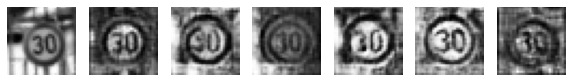

Epoch 5051 g_loss= 0.73719704 d_loss= 1.3182054 real_acc= 0.66 fake_acc= 0.58
Epoch 5052 g_loss= 0.7341376 d_loss= 1.3146012 real_acc= 0.64 fake_acc= 0.66
Epoch 5053 g_loss= 0.7280014 d_loss= 1.3110492 real_acc= 0.76 fake_acc= 0.6
Epoch 5054 g_loss= 0.72436094 d_loss= 1.3033721 real_acc= 0.82 fake_acc= 0.58
Epoch 5055 g_loss= 0.76115006 d_loss= 1.3004066 real_acc= 0.66 fake_acc= 0.68
Epoch 5056 g_loss= 0.76820153 d_loss= 1.3561333 real_acc= 0.5 fake_acc= 0.74
Epoch 5057 g_loss= 0.74646425 d_loss= 1.3104444 real_acc= 0.68 fake_acc= 0.66
Epoch 5058 g_loss= 0.7239627 d_loss= 1.366657 real_acc= 0.62 fake_acc= 0.52
Epoch 5059 g_loss= 0.73171365 d_loss= 1.3063972 real_acc= 0.74 fake_acc= 0.62
Epoch 5060 g_loss= 0.72575766 d_loss= 1.3575858 real_acc= 0.56 fake_acc= 0.58


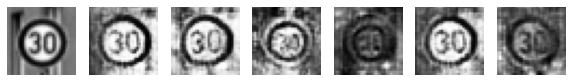

Epoch 5061 g_loss= 0.7187568 d_loss= 1.2971556 real_acc= 0.76 fake_acc= 0.46
Epoch 5062 g_loss= 0.7208974 d_loss= 1.3356066 real_acc= 0.68 fake_acc= 0.5
Epoch 5063 g_loss= 0.7035678 d_loss= 1.3227568 real_acc= 0.8 fake_acc= 0.52
Epoch 5064 g_loss= 0.70462453 d_loss= 1.3679118 real_acc= 0.66 fake_acc= 0.48
Epoch 5065 g_loss= 0.71498054 d_loss= 1.4050095 real_acc= 0.46 fake_acc= 0.6
Epoch 5066 g_loss= 0.7519877 d_loss= 1.3297787 real_acc= 0.68 fake_acc= 0.64
Epoch 5067 g_loss= 0.7394989 d_loss= 1.3670187 real_acc= 0.6 fake_acc= 0.62
Epoch 5068 g_loss= 0.7674099 d_loss= 1.3378168 real_acc= 0.6 fake_acc= 0.64
Epoch 5069 g_loss= 0.7520727 d_loss= 1.3469993 real_acc= 0.58 fake_acc= 0.64
Epoch 5070 g_loss= 0.73861825 d_loss= 1.3595665 real_acc= 0.6 fake_acc= 0.64


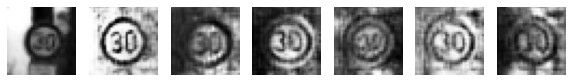

Epoch 5071 g_loss= 0.71219003 d_loss= 1.3754438 real_acc= 0.56 fake_acc= 0.46
Epoch 5072 g_loss= 0.7241435 d_loss= 1.3913072 real_acc= 0.52 fake_acc= 0.54
Epoch 5073 g_loss= 0.6818013 d_loss= 1.3460941 real_acc= 0.72 fake_acc= 0.44
Epoch 5074 g_loss= 0.68687326 d_loss= 1.4005301 real_acc= 0.62 fake_acc= 0.46
Epoch 5075 g_loss= 0.6963736 d_loss= 1.3843005 real_acc= 0.6 fake_acc= 0.42
Epoch 5076 g_loss= 0.6826196 d_loss= 1.4012041 real_acc= 0.62 fake_acc= 0.34
Epoch 5077 g_loss= 0.68343794 d_loss= 1.4069462 real_acc= 0.54 fake_acc= 0.46
Epoch 5078 g_loss= 0.74597985 d_loss= 1.3587582 real_acc= 0.52 fake_acc= 0.68
Epoch 5079 g_loss= 0.73038673 d_loss= 1.4031866 real_acc= 0.48 fake_acc= 0.6
Epoch 5080 g_loss= 0.7303576 d_loss= 1.3749008 real_acc= 0.48 fake_acc= 0.58


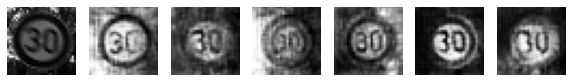

Epoch 5081 g_loss= 0.7312058 d_loss= 1.3527597 real_acc= 0.64 fake_acc= 0.56
Epoch 5082 g_loss= 0.7366204 d_loss= 1.3650051 real_acc= 0.54 fake_acc= 0.58
Epoch 5083 g_loss= 0.7508728 d_loss= 1.427186 real_acc= 0.5 fake_acc= 0.58
Epoch 5084 g_loss= 0.7125467 d_loss= 1.3906518 real_acc= 0.56 fake_acc= 0.5
Epoch 5085 g_loss= 0.69250315 d_loss= 1.3901894 real_acc= 0.58 fake_acc= 0.46
Epoch 5086 g_loss= 0.7197247 d_loss= 1.3442745 real_acc= 0.58 fake_acc= 0.54
Epoch 5087 g_loss= 0.6735552 d_loss= 1.3750167 real_acc= 0.64 fake_acc= 0.36
Epoch 5088 g_loss= 0.69114375 d_loss= 1.3895392 real_acc= 0.64 fake_acc= 0.46
Epoch 5089 g_loss= 0.70433015 d_loss= 1.3875219 real_acc= 0.58 fake_acc= 0.5
Epoch 5090 g_loss= 0.71525514 d_loss= 1.3672537 real_acc= 0.6 fake_acc= 0.54


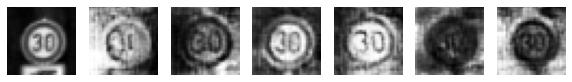

Epoch 5091 g_loss= 0.73059964 d_loss= 1.3837543 real_acc= 0.52 fake_acc= 0.6
Epoch 5092 g_loss= 0.7531829 d_loss= 1.3711083 real_acc= 0.46 fake_acc= 0.62
Epoch 5093 g_loss= 0.72850686 d_loss= 1.3717692 real_acc= 0.52 fake_acc= 0.62
Epoch 5094 g_loss= 0.72894883 d_loss= 1.3753984 real_acc= 0.5 fake_acc= 0.56
Epoch 5095 g_loss= 0.71634895 d_loss= 1.3916521 real_acc= 0.56 fake_acc= 0.56
Epoch 5096 g_loss= 0.7144163 d_loss= 1.3573391 real_acc= 0.56 fake_acc= 0.6
Epoch 5097 g_loss= 0.7161814 d_loss= 1.3124027 real_acc= 0.76 fake_acc= 0.6
Epoch 5098 g_loss= 0.73098 d_loss= 1.337528 real_acc= 0.54 fake_acc= 0.66
Epoch 5099 g_loss= 0.71491194 d_loss= 1.3527634 real_acc= 0.6 fake_acc= 0.56
Epoch 5100 g_loss= 0.71495515 d_loss= 1.39287 real_acc= 0.48 fake_acc= 0.54


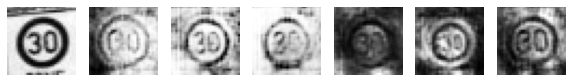

Epoch 5101 g_loss= 0.72978646 d_loss= 1.3517079 real_acc= 0.56 fake_acc= 0.56
Epoch 5102 g_loss= 0.7068863 d_loss= 1.3929214 real_acc= 0.54 fake_acc= 0.46
Epoch 5103 g_loss= 0.71640253 d_loss= 1.3462436 real_acc= 0.58 fake_acc= 0.58
Epoch 5104 g_loss= 0.7058284 d_loss= 1.3239994 real_acc= 0.68 fake_acc= 0.56
Epoch 5105 g_loss= 0.74004465 d_loss= 1.3277725 real_acc= 0.62 fake_acc= 0.62
Epoch 5106 g_loss= 0.7296069 d_loss= 1.3595572 real_acc= 0.52 fake_acc= 0.54
Epoch 5107 g_loss= 0.7558422 d_loss= 1.309618 real_acc= 0.7 fake_acc= 0.66
Epoch 5108 g_loss= 0.7417782 d_loss= 1.3441932 real_acc= 0.52 fake_acc= 0.64
Epoch 5109 g_loss= 0.7644438 d_loss= 1.2992358 real_acc= 0.58 fake_acc= 0.64
Epoch 5110 g_loss= 0.7467479 d_loss= 1.3271413 real_acc= 0.62 fake_acc= 0.62


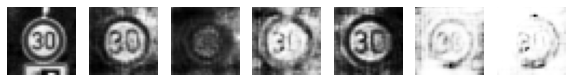

Epoch 5111 g_loss= 0.7644894 d_loss= 1.3097537 real_acc= 0.6 fake_acc= 0.64
Epoch 5112 g_loss= 0.7456209 d_loss= 1.3371465 real_acc= 0.54 fake_acc= 0.58
Epoch 5113 g_loss= 0.741964 d_loss= 1.3562489 real_acc= 0.56 fake_acc= 0.56
Epoch 5114 g_loss= 0.7346587 d_loss= 1.3407164 real_acc= 0.56 fake_acc= 0.5
Epoch 5115 g_loss= 0.7540593 d_loss= 1.2644112 real_acc= 0.74 fake_acc= 0.58
Epoch 5116 g_loss= 0.74201375 d_loss= 1.3710651 real_acc= 0.44 fake_acc= 0.6
Epoch 5117 g_loss= 0.73153496 d_loss= 1.3606629 real_acc= 0.58 fake_acc= 0.58
Epoch 5118 g_loss= 0.7101015 d_loss= 1.3738933 real_acc= 0.54 fake_acc= 0.56
Epoch 5119 g_loss= 0.7267469 d_loss= 1.3223203 real_acc= 0.66 fake_acc= 0.62
Epoch 5120 g_loss= 0.7443425 d_loss= 1.3163276 real_acc= 0.62 fake_acc= 0.62


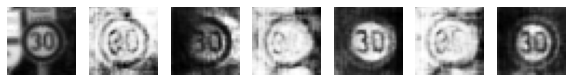

Epoch 5121 g_loss= 0.7646399 d_loss= 1.3318336 real_acc= 0.56 fake_acc= 0.64
Epoch 5122 g_loss= 0.7553564 d_loss= 1.3401618 real_acc= 0.52 fake_acc= 0.64
Epoch 5123 g_loss= 0.7528418 d_loss= 1.2963197 real_acc= 0.66 fake_acc= 0.68
Epoch 5124 g_loss= 0.73765975 d_loss= 1.3628362 real_acc= 0.56 fake_acc= 0.62
Epoch 5125 g_loss= 0.7260519 d_loss= 1.3376949 real_acc= 0.62 fake_acc= 0.56
Epoch 5126 g_loss= 0.713581 d_loss= 1.3326554 real_acc= 0.66 fake_acc= 0.52
Epoch 5127 g_loss= 0.7227857 d_loss= 1.3900068 real_acc= 0.54 fake_acc= 0.5
Epoch 5128 g_loss= 0.71134704 d_loss= 1.378011 real_acc= 0.58 fake_acc= 0.56
Epoch 5129 g_loss= 0.7115566 d_loss= 1.3588083 real_acc= 0.56 fake_acc= 0.52
Epoch 5130 g_loss= 0.7205403 d_loss= 1.3927798 real_acc= 0.42 fake_acc= 0.56


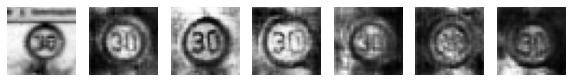

Epoch 5131 g_loss= 0.7467814 d_loss= 1.3974984 real_acc= 0.44 fake_acc= 0.7
Epoch 5132 g_loss= 0.77151877 d_loss= 1.4143236 real_acc= 0.38 fake_acc= 0.76
Epoch 5133 g_loss= 0.73427033 d_loss= 1.422355 real_acc= 0.42 fake_acc= 0.52
Epoch 5134 g_loss= 0.70631135 d_loss= 1.4220188 real_acc= 0.5 fake_acc= 0.54
Epoch 5135 g_loss= 0.6733929 d_loss= 1.3652472 real_acc= 0.68 fake_acc= 0.38
Epoch 5136 g_loss= 0.6727021 d_loss= 1.4169261 real_acc= 0.6 fake_acc= 0.46
Epoch 5137 g_loss= 0.6474734 d_loss= 1.4144112 real_acc= 0.58 fake_acc= 0.36
Epoch 5138 g_loss= 0.6562086 d_loss= 1.4053409 real_acc= 0.66 fake_acc= 0.36
Epoch 5139 g_loss= 0.65605736 d_loss= 1.4207971 real_acc= 0.64 fake_acc= 0.4
Epoch 5140 g_loss= 0.66806066 d_loss= 1.4060851 real_acc= 0.58 fake_acc= 0.32


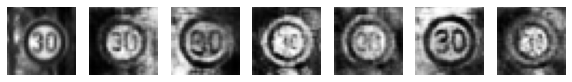

Epoch 5141 g_loss= 0.66546243 d_loss= 1.4089223 real_acc= 0.6 fake_acc= 0.3
Epoch 5142 g_loss= 0.6720421 d_loss= 1.3710876 real_acc= 0.68 fake_acc= 0.44
Epoch 5143 g_loss= 0.69533366 d_loss= 1.4063445 real_acc= 0.54 fake_acc= 0.56
Epoch 5144 g_loss= 0.72009903 d_loss= 1.4059184 real_acc= 0.3 fake_acc= 0.5
Epoch 5145 g_loss= 0.7584041 d_loss= 1.3993018 real_acc= 0.36 fake_acc= 0.74
Epoch 5146 g_loss= 0.7649614 d_loss= 1.3815992 real_acc= 0.4 fake_acc= 0.68
Epoch 5147 g_loss= 0.76238424 d_loss= 1.3783209 real_acc= 0.28 fake_acc= 0.74
Epoch 5148 g_loss= 0.7446933 d_loss= 1.4127288 real_acc= 0.36 fake_acc= 0.6
Epoch 5149 g_loss= 0.73326325 d_loss= 1.3944056 real_acc= 0.38 fake_acc= 0.66
Epoch 5150 g_loss= 0.70932907 d_loss= 1.382448 real_acc= 0.44 fake_acc= 0.56


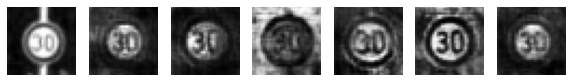

Epoch 5151 g_loss= 0.6991511 d_loss= 1.3682864 real_acc= 0.6 fake_acc= 0.52
Epoch 5152 g_loss= 0.6689693 d_loss= 1.4086345 real_acc= 0.58 fake_acc= 0.4
Epoch 5153 g_loss= 0.69126755 d_loss= 1.3764895 real_acc= 0.6 fake_acc= 0.52
Epoch 5154 g_loss= 0.68918496 d_loss= 1.3655065 real_acc= 0.62 fake_acc= 0.54
Epoch 5155 g_loss= 0.7187803 d_loss= 1.3801999 real_acc= 0.46 fake_acc= 0.54
Epoch 5156 g_loss= 0.7401573 d_loss= 1.3206084 real_acc= 0.6 fake_acc= 0.64
Epoch 5157 g_loss= 0.74020994 d_loss= 1.3323283 real_acc= 0.66 fake_acc= 0.7
Epoch 5158 g_loss= 0.7622373 d_loss= 1.4156251 real_acc= 0.28 fake_acc= 0.64
Epoch 5159 g_loss= 0.77438736 d_loss= 1.3374723 real_acc= 0.44 fake_acc= 0.7
Epoch 5160 g_loss= 0.79003006 d_loss= 1.3697613 real_acc= 0.34 fake_acc= 0.68


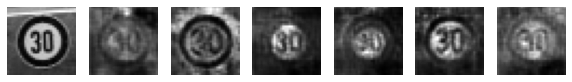

Epoch 5161 g_loss= 0.7767351 d_loss= 1.400498 real_acc= 0.28 fake_acc= 0.7
Epoch 5162 g_loss= 0.7489683 d_loss= 1.3948574 real_acc= 0.32 fake_acc= 0.62
Epoch 5163 g_loss= 0.72890335 d_loss= 1.3684433 real_acc= 0.52 fake_acc= 0.6
Epoch 5164 g_loss= 0.7313973 d_loss= 1.3506621 real_acc= 0.64 fake_acc= 0.54
Epoch 5165 g_loss= 0.6893501 d_loss= 1.3201101 real_acc= 0.78 fake_acc= 0.42
Epoch 5166 g_loss= 0.690552 d_loss= 1.3505437 real_acc= 0.6 fake_acc= 0.5
Epoch 5167 g_loss= 0.6801115 d_loss= 1.3529706 real_acc= 0.64 fake_acc= 0.44
Epoch 5168 g_loss= 0.66598123 d_loss= 1.3734317 real_acc= 0.64 fake_acc= 0.46
Epoch 5169 g_loss= 0.69892335 d_loss= 1.3476208 real_acc= 0.56 fake_acc= 0.5
Epoch 5170 g_loss= 0.741714 d_loss= 1.3164984 real_acc= 0.6 fake_acc= 0.6


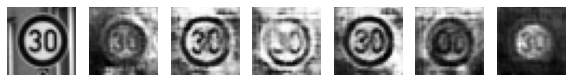

Epoch 5171 g_loss= 0.732929 d_loss= 1.3387288 real_acc= 0.58 fake_acc= 0.66
Epoch 5172 g_loss= 0.7445223 d_loss= 1.3275737 real_acc= 0.56 fake_acc= 0.66
Epoch 5173 g_loss= 0.7481232 d_loss= 1.3559844 real_acc= 0.52 fake_acc= 0.66
Epoch 5174 g_loss= 0.730214 d_loss= 1.3462749 real_acc= 0.5 fake_acc= 0.58
Epoch 5175 g_loss= 0.7446836 d_loss= 1.3196754 real_acc= 0.56 fake_acc= 0.64
Epoch 5176 g_loss= 0.71522576 d_loss= 1.3610525 real_acc= 0.52 fake_acc= 0.6
Epoch 5177 g_loss= 0.73064196 d_loss= 1.3460388 real_acc= 0.48 fake_acc= 0.64
Epoch 5178 g_loss= 0.74743116 d_loss= 1.3319657 real_acc= 0.62 fake_acc= 0.66
Epoch 5179 g_loss= 0.71680826 d_loss= 1.3686067 real_acc= 0.48 fake_acc= 0.58
Epoch 5180 g_loss= 0.6731543 d_loss= 1.3724887 real_acc= 0.68 fake_acc= 0.52


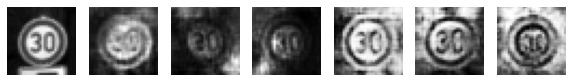

Epoch 5181 g_loss= 0.6846297 d_loss= 1.3468626 real_acc= 0.68 fake_acc= 0.56
Epoch 5182 g_loss= 0.6944681 d_loss= 1.3831239 real_acc= 0.42 fake_acc= 0.58
Epoch 5183 g_loss= 0.6985503 d_loss= 1.3604703 real_acc= 0.48 fake_acc= 0.56
Epoch 5184 g_loss= 0.7223707 d_loss= 1.3805406 real_acc= 0.46 fake_acc= 0.58
Epoch 5185 g_loss= 0.72888094 d_loss= 1.4023278 real_acc= 0.28 fake_acc= 0.74
Epoch 5186 g_loss= 0.743303 d_loss= 1.3445952 real_acc= 0.44 fake_acc= 0.68
Epoch 5187 g_loss= 0.722959 d_loss= 1.3405263 real_acc= 0.54 fake_acc= 0.68
Epoch 5188 g_loss= 0.7241955 d_loss= 1.3559031 real_acc= 0.58 fake_acc= 0.6
Epoch 5189 g_loss= 0.71149015 d_loss= 1.3367934 real_acc= 0.66 fake_acc= 0.66
Epoch 5190 g_loss= 0.6823014 d_loss= 1.3608915 real_acc= 0.7 fake_acc= 0.54


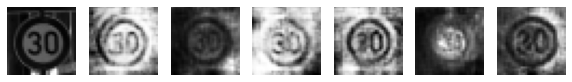

Epoch 5191 g_loss= 0.7317427 d_loss= 1.3992696 real_acc= 0.4 fake_acc= 0.7
Epoch 5192 g_loss= 0.7462224 d_loss= 1.3547025 real_acc= 0.4 fake_acc= 0.68
Epoch 5193 g_loss= 0.74164474 d_loss= 1.3698704 real_acc= 0.52 fake_acc= 0.64
Epoch 5194 g_loss= 0.75890136 d_loss= 1.3081917 real_acc= 0.58 fake_acc= 0.68
Epoch 5195 g_loss= 0.74170846 d_loss= 1.3132277 real_acc= 0.62 fake_acc= 0.66
Epoch 5196 g_loss= 0.73262656 d_loss= 1.3620089 real_acc= 0.56 fake_acc= 0.66
Epoch 5197 g_loss= 0.69707185 d_loss= 1.3574998 real_acc= 0.66 fake_acc= 0.42
Epoch 5198 g_loss= 0.7273167 d_loss= 1.2813411 real_acc= 0.82 fake_acc= 0.58
Epoch 5199 g_loss= 0.72557414 d_loss= 1.334025 real_acc= 0.62 fake_acc= 0.58
Epoch 5200 g_loss= 0.7280513 d_loss= 1.3151609 real_acc= 0.62 fake_acc= 0.62


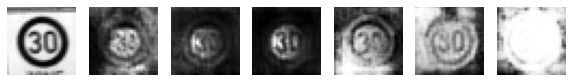

Epoch 5201 g_loss= 0.73902375 d_loss= 1.3141639 real_acc= 0.7 fake_acc= 0.54
Epoch 5202 g_loss= 0.751933 d_loss= 1.2893434 real_acc= 0.74 fake_acc= 0.58
Epoch 5203 g_loss= 0.7487202 d_loss= 1.3169131 real_acc= 0.66 fake_acc= 0.6
Epoch 5204 g_loss= 0.7559337 d_loss= 1.2987837 real_acc= 0.68 fake_acc= 0.62
Epoch 5205 g_loss= 0.7696983 d_loss= 1.3020365 real_acc= 0.62 fake_acc= 0.56
Epoch 5206 g_loss= 0.7536302 d_loss= 1.3173652 real_acc= 0.76 fake_acc= 0.58
Epoch 5207 g_loss= 0.733897 d_loss= 1.3066366 real_acc= 0.74 fake_acc= 0.54
Epoch 5208 g_loss= 0.7530493 d_loss= 1.2566981 real_acc= 0.78 fake_acc= 0.58
Epoch 5209 g_loss= 0.72400963 d_loss= 1.2600527 real_acc= 0.86 fake_acc= 0.56
Epoch 5210 g_loss= 0.72124934 d_loss= 1.2766744 real_acc= 0.8 fake_acc= 0.5


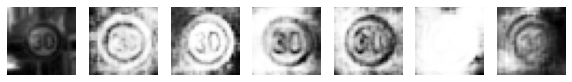

Epoch 5211 g_loss= 0.7368958 d_loss= 1.2456727 real_acc= 0.78 fake_acc= 0.52
Epoch 5212 g_loss= 0.72964483 d_loss= 1.3188155 real_acc= 0.68 fake_acc= 0.52
Epoch 5213 g_loss= 0.76305884 d_loss= 1.2884228 real_acc= 0.66 fake_acc= 0.58
Epoch 5214 g_loss= 0.75004977 d_loss= 1.226943 real_acc= 0.74 fake_acc= 0.6
Epoch 5215 g_loss= 0.7810234 d_loss= 1.2743318 real_acc= 0.66 fake_acc= 0.62
Epoch 5216 g_loss= 0.76857626 d_loss= 1.2894508 real_acc= 0.64 fake_acc= 0.6
Epoch 5217 g_loss= 0.7680741 d_loss= 1.2499404 real_acc= 0.7 fake_acc= 0.68
Epoch 5218 g_loss= 0.7248015 d_loss= 1.322565 real_acc= 0.7 fake_acc= 0.56
Epoch 5219 g_loss= 0.7485155 d_loss= 1.2759274 real_acc= 0.68 fake_acc= 0.66
Epoch 5220 g_loss= 0.75788707 d_loss= 1.3191708 real_acc= 0.6 fake_acc= 0.62


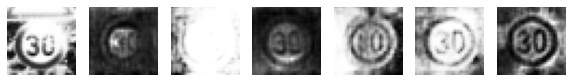

Epoch 5221 g_loss= 0.77154535 d_loss= 1.2474825 real_acc= 0.72 fake_acc= 0.74
Epoch 5222 g_loss= 0.7861139 d_loss= 1.2485168 real_acc= 0.62 fake_acc= 0.68
Epoch 5223 g_loss= 0.7651986 d_loss= 1.3253536 real_acc= 0.64 fake_acc= 0.64
Epoch 5224 g_loss= 0.7814324 d_loss= 1.260606 real_acc= 0.68 fake_acc= 0.72
Epoch 5225 g_loss= 0.75128114 d_loss= 1.3313015 real_acc= 0.56 fake_acc= 0.72
Epoch 5226 g_loss= 0.72421324 d_loss= 1.3453386 real_acc= 0.6 fake_acc= 0.58
Epoch 5227 g_loss= 0.6928371 d_loss= 1.379815 real_acc= 0.6 fake_acc= 0.54
Epoch 5228 g_loss= 0.7034813 d_loss= 1.3620312 real_acc= 0.6 fake_acc= 0.52
Epoch 5229 g_loss= 0.6924215 d_loss= 1.3952568 real_acc= 0.58 fake_acc= 0.6
Epoch 5230 g_loss= 0.6698692 d_loss= 1.3351092 real_acc= 0.72 fake_acc= 0.44


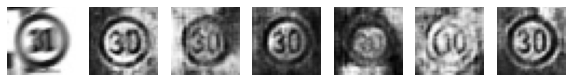

Epoch 5231 g_loss= 0.6455974 d_loss= 1.3693252 real_acc= 0.68 fake_acc= 0.42
Epoch 5232 g_loss= 0.68855345 d_loss= 1.4485863 real_acc= 0.48 fake_acc= 0.54
Epoch 5233 g_loss= 0.6900335 d_loss= 1.3997993 real_acc= 0.54 fake_acc= 0.58
Epoch 5234 g_loss= 0.6908768 d_loss= 1.4817889 real_acc= 0.42 fake_acc= 0.56
Epoch 5235 g_loss= 0.7149776 d_loss= 1.4187135 real_acc= 0.48 fake_acc= 0.6
Epoch 5236 g_loss= 0.7034146 d_loss= 1.477608 real_acc= 0.44 fake_acc= 0.64
Epoch 5237 g_loss= 0.7101986 d_loss= 1.4641875 real_acc= 0.38 fake_acc= 0.56
Epoch 5238 g_loss= 0.67920035 d_loss= 1.4395258 real_acc= 0.52 fake_acc= 0.48
Epoch 5239 g_loss= 0.68817383 d_loss= 1.422781 real_acc= 0.5 fake_acc= 0.56
Epoch 5240 g_loss= 0.68308496 d_loss= 1.4196317 real_acc= 0.46 fake_acc= 0.54


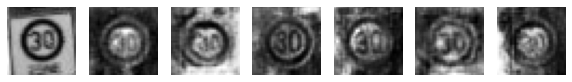

Epoch 5241 g_loss= 0.67715997 d_loss= 1.4625938 real_acc= 0.5 fake_acc= 0.48
Epoch 5242 g_loss= 0.68744797 d_loss= 1.4619288 real_acc= 0.5 fake_acc= 0.5
Epoch 5243 g_loss= 0.6749199 d_loss= 1.4544408 real_acc= 0.48 fake_acc= 0.48
Epoch 5244 g_loss= 0.69175166 d_loss= 1.4622382 real_acc= 0.4 fake_acc= 0.54
Epoch 5245 g_loss= 0.66511256 d_loss= 1.4830496 real_acc= 0.36 fake_acc= 0.48
Epoch 5246 g_loss= 0.669606 d_loss= 1.4835541 real_acc= 0.44 fake_acc= 0.44
Epoch 5247 g_loss= 0.65697855 d_loss= 1.4991989 real_acc= 0.42 fake_acc= 0.46
Epoch 5248 g_loss= 0.6519978 d_loss= 1.4614451 real_acc= 0.48 fake_acc= 0.4
Epoch 5249 g_loss= 0.6674125 d_loss= 1.4179907 real_acc= 0.48 fake_acc= 0.48
Epoch 5250 g_loss= 0.6464147 d_loss= 1.456258 real_acc= 0.46 fake_acc= 0.32


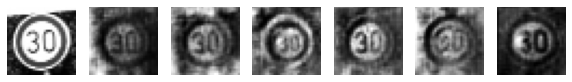

Epoch 5251 g_loss= 0.65845656 d_loss= 1.4262578 real_acc= 0.58 fake_acc= 0.48
Epoch 5252 g_loss= 0.62986505 d_loss= 1.4926033 real_acc= 0.48 fake_acc= 0.28
Epoch 5253 g_loss= 0.66304976 d_loss= 1.4595466 real_acc= 0.42 fake_acc= 0.44
Epoch 5254 g_loss= 0.66895187 d_loss= 1.4585881 real_acc= 0.34 fake_acc= 0.42
Epoch 5255 g_loss= 0.6968992 d_loss= 1.4384522 real_acc= 0.38 fake_acc= 0.48
Epoch 5256 g_loss= 0.7102339 d_loss= 1.4078467 real_acc= 0.38 fake_acc= 0.58
Epoch 5257 g_loss= 0.7070269 d_loss= 1.4305727 real_acc= 0.38 fake_acc= 0.54
Epoch 5258 g_loss= 0.70126563 d_loss= 1.391446 real_acc= 0.46 fake_acc= 0.5
Epoch 5259 g_loss= 0.7204589 d_loss= 1.3886446 real_acc= 0.42 fake_acc= 0.6
Epoch 5260 g_loss= 0.7006569 d_loss= 1.434054 real_acc= 0.36 fake_acc= 0.5


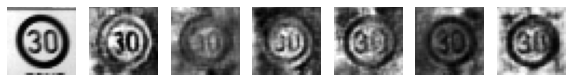

Epoch 5261 g_loss= 0.7363398 d_loss= 1.4158683 real_acc= 0.34 fake_acc= 0.68
Epoch 5262 g_loss= 0.74770594 d_loss= 1.3828605 real_acc= 0.38 fake_acc= 0.66
Epoch 5263 g_loss= 0.7123078 d_loss= 1.4276131 real_acc= 0.36 fake_acc= 0.62
Epoch 5264 g_loss= 0.7311935 d_loss= 1.3866203 real_acc= 0.4 fake_acc= 0.66
Epoch 5265 g_loss= 0.75643575 d_loss= 1.3858066 real_acc= 0.4 fake_acc= 0.68
Epoch 5266 g_loss= 0.7366925 d_loss= 1.3564365 real_acc= 0.44 fake_acc= 0.68
Epoch 5267 g_loss= 0.73309904 d_loss= 1.3510479 real_acc= 0.48 fake_acc= 0.68
Epoch 5268 g_loss= 0.74852514 d_loss= 1.3310606 real_acc= 0.5 fake_acc= 0.78
Epoch 5269 g_loss= 0.7415889 d_loss= 1.3247455 real_acc= 0.56 fake_acc= 0.72
Epoch 5270 g_loss= 0.74905825 d_loss= 1.3587153 real_acc= 0.32 fake_acc= 0.78


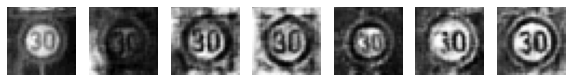

Epoch 5271 g_loss= 0.74623543 d_loss= 1.3680494 real_acc= 0.36 fake_acc= 0.7
Epoch 5272 g_loss= 0.7714689 d_loss= 1.3366638 real_acc= 0.42 fake_acc= 0.76
Epoch 5273 g_loss= 0.7810443 d_loss= 1.3122965 real_acc= 0.46 fake_acc= 0.78
Epoch 5274 g_loss= 0.8119123 d_loss= 1.3593268 real_acc= 0.26 fake_acc= 0.76
Epoch 5275 g_loss= 0.80688506 d_loss= 1.3226211 real_acc= 0.44 fake_acc= 0.88
Epoch 5276 g_loss= 0.81697685 d_loss= 1.3102934 real_acc= 0.42 fake_acc= 0.82
Epoch 5277 g_loss= 0.79562646 d_loss= 1.3103387 real_acc= 0.46 fake_acc= 0.78
Epoch 5278 g_loss= 0.81320524 d_loss= 1.3464382 real_acc= 0.42 fake_acc= 0.84
Epoch 5279 g_loss= 0.8039348 d_loss= 1.3026447 real_acc= 0.44 fake_acc= 0.88
Epoch 5280 g_loss= 0.8130904 d_loss= 1.2565039 real_acc= 0.56 fake_acc= 0.84


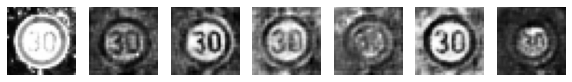

Epoch 5281 g_loss= 0.75509244 d_loss= 1.3184767 real_acc= 0.6 fake_acc= 0.66
Epoch 5282 g_loss= 0.7743037 d_loss= 1.2863318 real_acc= 0.54 fake_acc= 0.78
Epoch 5283 g_loss= 0.7767389 d_loss= 1.2537211 real_acc= 0.58 fake_acc= 0.74
Epoch 5284 g_loss= 0.7747037 d_loss= 1.3062339 real_acc= 0.54 fake_acc= 0.72
Epoch 5285 g_loss= 0.76820433 d_loss= 1.3254042 real_acc= 0.56 fake_acc= 0.7
Epoch 5286 g_loss= 0.793363 d_loss= 1.3084065 real_acc= 0.4 fake_acc= 0.84
Epoch 5287 g_loss= 0.79897046 d_loss= 1.3306944 real_acc= 0.38 fake_acc= 0.86
Epoch 5288 g_loss= 0.82341504 d_loss= 1.2458909 real_acc= 0.5 fake_acc= 0.84
Epoch 5289 g_loss= 0.8036674 d_loss= 1.3323233 real_acc= 0.36 fake_acc= 0.86
Epoch 5290 g_loss= 0.8358319 d_loss= 1.3098247 real_acc= 0.38 fake_acc= 0.78


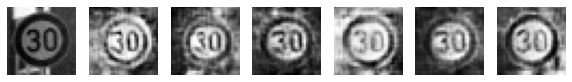

Epoch 5291 g_loss= 0.8484467 d_loss= 1.3353348 real_acc= 0.34 fake_acc= 0.9
Epoch 5292 g_loss= 0.8631793 d_loss= 1.3659518 real_acc= 0.22 fake_acc= 0.9
Epoch 5293 g_loss= 0.87429774 d_loss= 1.3910916 real_acc= 0.22 fake_acc= 0.84
Epoch 5294 g_loss= 0.8270778 d_loss= 1.3972964 real_acc= 0.32 fake_acc= 0.8
Epoch 5295 g_loss= 0.71588033 d_loss= 1.4235655 real_acc= 0.46 fake_acc= 0.64
Epoch 5296 g_loss= 0.7286835 d_loss= 1.3611822 real_acc= 0.5 fake_acc= 0.68
Epoch 5297 g_loss= 0.6946825 d_loss= 1.3757617 real_acc= 0.62 fake_acc= 0.6
Epoch 5298 g_loss= 0.68901515 d_loss= 1.3928924 real_acc= 0.58 fake_acc= 0.46
Epoch 5299 g_loss= 0.6873621 d_loss= 1.3745062 real_acc= 0.66 fake_acc= 0.46
Epoch 5300 g_loss= 0.69874525 d_loss= 1.3866959 real_acc= 0.54 fake_acc= 0.58


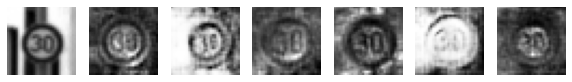

Epoch 5301 g_loss= 0.7230756 d_loss= 1.4224541 real_acc= 0.48 fake_acc= 0.6
Epoch 5302 g_loss= 0.7442322 d_loss= 1.4143313 real_acc= 0.5 fake_acc= 0.58
Epoch 5303 g_loss= 0.7574839 d_loss= 1.4233711 real_acc= 0.42 fake_acc= 0.74
Epoch 5304 g_loss= 0.8026017 d_loss= 1.384441 real_acc= 0.42 fake_acc= 0.86
Epoch 5305 g_loss= 0.7985285 d_loss= 1.3773532 real_acc= 0.28 fake_acc= 0.84
Epoch 5306 g_loss= 0.8008529 d_loss= 1.4210645 real_acc= 0.26 fake_acc= 0.82
Epoch 5307 g_loss= 0.81601304 d_loss= 1.3912559 real_acc= 0.38 fake_acc= 0.8
Epoch 5308 g_loss= 0.7721048 d_loss= 1.4012604 real_acc= 0.4 fake_acc= 0.72
Epoch 5309 g_loss= 0.7799589 d_loss= 1.344262 real_acc= 0.52 fake_acc= 0.76
Epoch 5310 g_loss= 0.7836821 d_loss= 1.3711782 real_acc= 0.44 fake_acc= 0.7


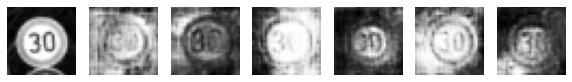

Epoch 5311 g_loss= 0.74676865 d_loss= 1.3687074 real_acc= 0.5 fake_acc= 0.66
Epoch 5312 g_loss= 0.72499746 d_loss= 1.3654294 real_acc= 0.58 fake_acc= 0.54
Epoch 5313 g_loss= 0.72668093 d_loss= 1.354902 real_acc= 0.56 fake_acc= 0.5
Epoch 5314 g_loss= 0.7215416 d_loss= 1.3475282 real_acc= 0.66 fake_acc= 0.52
Epoch 5315 g_loss= 0.74208075 d_loss= 1.3520383 real_acc= 0.5 fake_acc= 0.62
Epoch 5316 g_loss= 0.7354341 d_loss= 1.3643574 real_acc= 0.56 fake_acc= 0.5
Epoch 5317 g_loss= 0.7845925 d_loss= 1.3452744 real_acc= 0.54 fake_acc= 0.62
Epoch 5318 g_loss= 0.7884167 d_loss= 1.3650627 real_acc= 0.4 fake_acc= 0.6
Epoch 5319 g_loss= 0.8279414 d_loss= 1.3435531 real_acc= 0.46 fake_acc= 0.62
Epoch 5320 g_loss= 0.81590545 d_loss= 1.348999 real_acc= 0.48 fake_acc= 0.66


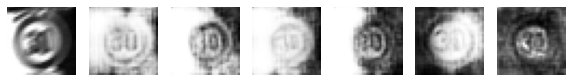

Epoch 5321 g_loss= 0.7952704 d_loss= 1.3121936 real_acc= 0.62 fake_acc= 0.58
Epoch 5322 g_loss= 0.79751915 d_loss= 1.3493799 real_acc= 0.58 fake_acc= 0.58
Epoch 5323 g_loss= 0.7678862 d_loss= 1.3224705 real_acc= 0.62 fake_acc= 0.5
Epoch 5324 g_loss= 0.73314524 d_loss= 1.3238189 real_acc= 0.68 fake_acc= 0.48
Epoch 5325 g_loss= 0.7060524 d_loss= 1.3643677 real_acc= 0.64 fake_acc= 0.42
Epoch 5326 g_loss= 0.72394097 d_loss= 1.3443606 real_acc= 0.6 fake_acc= 0.44
Epoch 5327 g_loss= 0.6455088 d_loss= 1.3634117 real_acc= 0.74 fake_acc= 0.38
Epoch 5328 g_loss= 0.6653118 d_loss= 1.3083707 real_acc= 0.84 fake_acc= 0.36
Epoch 5329 g_loss= 0.7043396 d_loss= 1.3479236 real_acc= 0.72 fake_acc= 0.4
Epoch 5330 g_loss= 0.7347415 d_loss= 1.3001773 real_acc= 0.82 fake_acc= 0.44


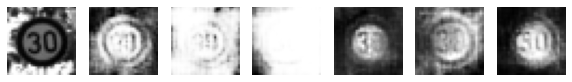

Epoch 5331 g_loss= 0.76148206 d_loss= 1.2928599 real_acc= 0.56 fake_acc= 0.54
Epoch 5332 g_loss= 0.7881694 d_loss= 1.3932939 real_acc= 0.42 fake_acc= 0.5
Epoch 5333 g_loss= 0.8064869 d_loss= 1.3525753 real_acc= 0.56 fake_acc= 0.52
Epoch 5334 g_loss= 0.79983526 d_loss= 1.3179319 real_acc= 0.68 fake_acc= 0.54
Epoch 5335 g_loss= 0.79287314 d_loss= 1.323102 real_acc= 0.62 fake_acc= 0.42
Epoch 5336 g_loss= 0.80842674 d_loss= 1.2860737 real_acc= 0.68 fake_acc= 0.48
Epoch 5337 g_loss= 0.73492247 d_loss= 1.3119739 real_acc= 0.68 fake_acc= 0.48
Epoch 5338 g_loss= 0.74881035 d_loss= 1.2539321 real_acc= 0.86 fake_acc= 0.54
Epoch 5339 g_loss= 0.74155396 d_loss= 1.2776191 real_acc= 0.82 fake_acc= 0.4
Epoch 5340 g_loss= 0.75150263 d_loss= 1.2668865 real_acc= 0.82 fake_acc= 0.4


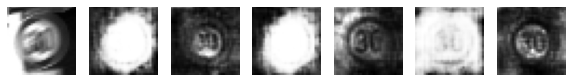

Epoch 5341 g_loss= 0.7330662 d_loss= 1.3481047 real_acc= 0.62 fake_acc= 0.38
Epoch 5342 g_loss= 0.7350177 d_loss= 1.3008037 real_acc= 0.74 fake_acc= 0.36
Epoch 5343 g_loss= 0.8091018 d_loss= 1.2645884 real_acc= 0.62 fake_acc= 0.48
Epoch 5344 g_loss= 0.80729127 d_loss= 1.2226014 real_acc= 0.78 fake_acc= 0.48
Epoch 5345 g_loss= 0.84494764 d_loss= 1.2642128 real_acc= 0.64 fake_acc= 0.5
Epoch 5346 g_loss= 0.8643796 d_loss= 1.3012626 real_acc= 0.52 fake_acc= 0.62
Epoch 5347 g_loss= 0.8739024 d_loss= 1.3105108 real_acc= 0.52 fake_acc= 0.58
Epoch 5348 g_loss= 0.8305094 d_loss= 1.2711633 real_acc= 0.58 fake_acc= 0.64
Epoch 5349 g_loss= 0.8097058 d_loss= 1.2897379 real_acc= 0.62 fake_acc= 0.5
Epoch 5350 g_loss= 0.80519783 d_loss= 1.2714033 real_acc= 0.64 fake_acc= 0.54


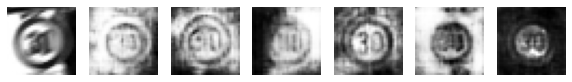

Epoch 5351 g_loss= 0.7806147 d_loss= 1.3011394 real_acc= 0.66 fake_acc= 0.5
Epoch 5352 g_loss= 0.7349932 d_loss= 1.3411472 real_acc= 0.62 fake_acc= 0.44
Epoch 5353 g_loss= 0.7021405 d_loss= 1.4155757 real_acc= 0.52 fake_acc= 0.48
Epoch 5354 g_loss= 0.7108612 d_loss= 1.3291497 real_acc= 0.64 fake_acc= 0.46
Epoch 5355 g_loss= 0.7001773 d_loss= 1.3519008 real_acc= 0.64 fake_acc= 0.36
Epoch 5356 g_loss= 0.68895316 d_loss= 1.3625188 real_acc= 0.6 fake_acc= 0.42
Epoch 5357 g_loss= 0.68686277 d_loss= 1.4052768 real_acc= 0.56 fake_acc= 0.38
Epoch 5358 g_loss= 0.67867935 d_loss= 1.3951461 real_acc= 0.68 fake_acc= 0.4
Epoch 5359 g_loss= 0.6684525 d_loss= 1.3464227 real_acc= 0.64 fake_acc= 0.36
Epoch 5360 g_loss= 0.69017226 d_loss= 1.3521218 real_acc= 0.52 fake_acc= 0.46


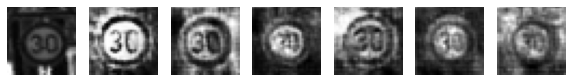

Epoch 5361 g_loss= 0.72058505 d_loss= 1.3070742 real_acc= 0.68 fake_acc= 0.56
Epoch 5362 g_loss= 0.7446559 d_loss= 1.3441715 real_acc= 0.48 fake_acc= 0.58
Epoch 5363 g_loss= 0.75627434 d_loss= 1.3328574 real_acc= 0.52 fake_acc= 0.68
Epoch 5364 g_loss= 0.7530344 d_loss= 1.4299178 real_acc= 0.4 fake_acc= 0.62
Epoch 5365 g_loss= 0.7756435 d_loss= 1.4514301 real_acc= 0.38 fake_acc= 0.66
Epoch 5366 g_loss= 0.7726917 d_loss= 1.3495367 real_acc= 0.48 fake_acc= 0.58
Epoch 5367 g_loss= 0.76977766 d_loss= 1.417644 real_acc= 0.4 fake_acc= 0.68
Epoch 5368 g_loss= 0.77956057 d_loss= 1.3691795 real_acc= 0.56 fake_acc= 0.64
Epoch 5369 g_loss= 0.7457062 d_loss= 1.411231 real_acc= 0.46 fake_acc= 0.6
Epoch 5370 g_loss= 0.7459658 d_loss= 1.38889 real_acc= 0.46 fake_acc= 0.62


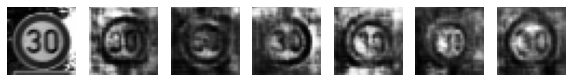

Epoch 5371 g_loss= 0.7136075 d_loss= 1.458955 real_acc= 0.3 fake_acc= 0.56
Epoch 5372 g_loss= 0.6917026 d_loss= 1.3835328 real_acc= 0.58 fake_acc= 0.52
Epoch 5373 g_loss= 0.679227 d_loss= 1.4445155 real_acc= 0.48 fake_acc= 0.48
Epoch 5374 g_loss= 0.6801709 d_loss= 1.3804929 real_acc= 0.52 fake_acc= 0.44
Epoch 5375 g_loss= 0.67616457 d_loss= 1.3035022 real_acc= 0.76 fake_acc= 0.48
Epoch 5376 g_loss= 0.67191803 d_loss= 1.3852335 real_acc= 0.58 fake_acc= 0.48
Epoch 5377 g_loss= 0.6629148 d_loss= 1.3735952 real_acc= 0.7 fake_acc= 0.52
Epoch 5378 g_loss= 0.67069536 d_loss= 1.3864981 real_acc= 0.6 fake_acc= 0.5
Epoch 5379 g_loss= 0.70114946 d_loss= 1.3686182 real_acc= 0.62 fake_acc= 0.54
Epoch 5380 g_loss= 0.7244042 d_loss= 1.3524029 real_acc= 0.5 fake_acc= 0.58


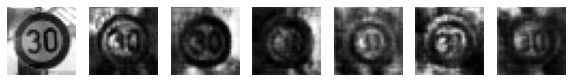

Epoch 5381 g_loss= 0.7441569 d_loss= 1.3924675 real_acc= 0.42 fake_acc= 0.66
Epoch 5382 g_loss= 0.76438445 d_loss= 1.3077184 real_acc= 0.5 fake_acc= 0.66
Epoch 5383 g_loss= 0.79718554 d_loss= 1.2692866 real_acc= 0.52 fake_acc= 0.72
Epoch 5384 g_loss= 0.77766174 d_loss= 1.3028259 real_acc= 0.62 fake_acc= 0.68
Epoch 5385 g_loss= 0.74694043 d_loss= 1.3117374 real_acc= 0.64 fake_acc= 0.64
Epoch 5386 g_loss= 0.7604653 d_loss= 1.2665436 real_acc= 0.66 fake_acc= 0.6
Epoch 5387 g_loss= 0.74812627 d_loss= 1.2606767 real_acc= 0.8 fake_acc= 0.6
Epoch 5388 g_loss= 0.7327198 d_loss= 1.2360475 real_acc= 0.84 fake_acc= 0.58
Epoch 5389 g_loss= 0.7057561 d_loss= 1.2725613 real_acc= 0.78 fake_acc= 0.52
Epoch 5390 g_loss= 0.739188 d_loss= 1.1828191 real_acc= 0.86 fake_acc= 0.56


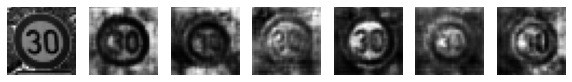

Epoch 5391 g_loss= 0.756493 d_loss= 1.2114652 real_acc= 0.84 fake_acc= 0.54
Epoch 5392 g_loss= 0.7570575 d_loss= 1.210735 real_acc= 0.86 fake_acc= 0.62
Epoch 5393 g_loss= 0.81698626 d_loss= 1.2116117 real_acc= 0.74 fake_acc= 0.76
Epoch 5394 g_loss= 0.82119334 d_loss= 1.1991006 real_acc= 0.7 fake_acc= 0.74
Epoch 5395 g_loss= 0.8360383 d_loss= 1.2030245 real_acc= 0.68 fake_acc= 0.84
Epoch 5396 g_loss= 0.87517476 d_loss= 1.1596987 real_acc= 0.7 fake_acc= 0.82
Epoch 5397 g_loss= 0.8466827 d_loss= 1.1962733 real_acc= 0.62 fake_acc= 0.8
Epoch 5398 g_loss= 0.84089804 d_loss= 1.2356153 real_acc= 0.58 fake_acc= 0.8
Epoch 5399 g_loss= 0.8202386 d_loss= 1.2373385 real_acc= 0.66 fake_acc= 0.7
Epoch 5400 g_loss= 0.8237146 d_loss= 1.2195299 real_acc= 0.68 fake_acc= 0.76


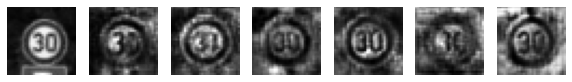

Epoch 5401 g_loss= 0.809992 d_loss= 1.2113932 real_acc= 0.7 fake_acc= 0.78
Epoch 5402 g_loss= 0.7698864 d_loss= 1.1974869 real_acc= 0.78 fake_acc= 0.7
Epoch 5403 g_loss= 0.79305464 d_loss= 1.2202208 real_acc= 0.7 fake_acc= 0.66
Epoch 5404 g_loss= 0.7963273 d_loss= 1.3185172 real_acc= 0.48 fake_acc= 0.68
Epoch 5405 g_loss= 0.8094539 d_loss= 1.3200961 real_acc= 0.44 fake_acc= 0.7
Epoch 5406 g_loss= 0.7986522 d_loss= 1.2757621 real_acc= 0.6 fake_acc= 0.68
Epoch 5407 g_loss= 0.8159355 d_loss= 1.3550793 real_acc= 0.32 fake_acc= 0.7
Epoch 5408 g_loss= 0.8175999 d_loss= 1.3975289 real_acc= 0.38 fake_acc= 0.66
Epoch 5409 g_loss= 0.78491014 d_loss= 1.364169 real_acc= 0.34 fake_acc= 0.64
Epoch 5410 g_loss= 0.76455474 d_loss= 1.4004719 real_acc= 0.44 fake_acc= 0.6


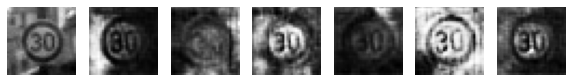

Epoch 5411 g_loss= 0.73957705 d_loss= 1.4791675 real_acc= 0.32 fake_acc= 0.64
Epoch 5412 g_loss= 0.76350385 d_loss= 1.3825315 real_acc= 0.46 fake_acc= 0.6
Epoch 5413 g_loss= 0.7282914 d_loss= 1.5807409 real_acc= 0.28 fake_acc= 0.58
Epoch 5414 g_loss= 0.75502443 d_loss= 1.5319469 real_acc= 0.26 fake_acc= 0.7
Epoch 5415 g_loss= 0.7506702 d_loss= 1.5283964 real_acc= 0.26 fake_acc= 0.64
Epoch 5416 g_loss= 0.71738577 d_loss= 1.4774976 real_acc= 0.4 fake_acc= 0.6
Epoch 5417 g_loss= 0.67296827 d_loss= 1.5075274 real_acc= 0.46 fake_acc= 0.44
Epoch 5418 g_loss= 0.65854776 d_loss= 1.5235727 real_acc= 0.36 fake_acc= 0.48
Epoch 5419 g_loss= 0.6166165 d_loss= 1.5213369 real_acc= 0.5 fake_acc= 0.4
Epoch 5420 g_loss= 0.6147104 d_loss= 1.5555468 real_acc= 0.4 fake_acc= 0.32


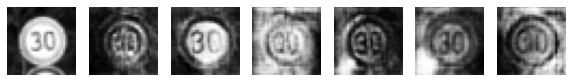

Epoch 5421 g_loss= 0.6259476 d_loss= 1.5975255 real_acc= 0.24 fake_acc= 0.32
Epoch 5422 g_loss= 0.6542146 d_loss= 1.5477242 real_acc= 0.22 fake_acc= 0.38
Epoch 5423 g_loss= 0.6649581 d_loss= 1.5426005 real_acc= 0.3 fake_acc= 0.46
Epoch 5424 g_loss= 0.68333894 d_loss= 1.5222541 real_acc= 0.36 fake_acc= 0.5
Epoch 5425 g_loss= 0.68111956 d_loss= 1.5444717 real_acc= 0.28 fake_acc= 0.44
Epoch 5426 g_loss= 0.70417655 d_loss= 1.4962683 real_acc= 0.32 fake_acc= 0.52
Epoch 5427 g_loss= 0.68115866 d_loss= 1.5044327 real_acc= 0.42 fake_acc= 0.42
Epoch 5428 g_loss= 0.65934634 d_loss= 1.4870018 real_acc= 0.5 fake_acc= 0.36
Epoch 5429 g_loss= 0.662123 d_loss= 1.4303341 real_acc= 0.6 fake_acc= 0.32
Epoch 5430 g_loss= 0.65047586 d_loss= 1.4299536 real_acc= 0.68 fake_acc= 0.3


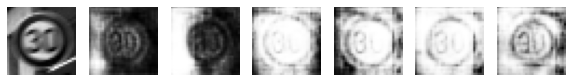

Epoch 5431 g_loss= 0.65900606 d_loss= 1.4502875 real_acc= 0.54 fake_acc= 0.26
Epoch 5432 g_loss= 0.6849267 d_loss= 1.385633 real_acc= 0.66 fake_acc= 0.42
Epoch 5433 g_loss= 0.6649582 d_loss= 1.3799429 real_acc= 0.74 fake_acc= 0.36
Epoch 5434 g_loss= 0.67297125 d_loss= 1.40367 real_acc= 0.66 fake_acc= 0.4
Epoch 5435 g_loss= 0.6576378 d_loss= 1.3666344 real_acc= 0.7 fake_acc= 0.26
Epoch 5436 g_loss= 0.65151685 d_loss= 1.3644918 real_acc= 0.74 fake_acc= 0.32
Epoch 5437 g_loss= 0.6805874 d_loss= 1.3219857 real_acc= 0.82 fake_acc= 0.42
Epoch 5438 g_loss= 0.68023247 d_loss= 1.3101473 real_acc= 0.86 fake_acc= 0.34
Epoch 5439 g_loss= 0.68999517 d_loss= 1.3599659 real_acc= 0.7 fake_acc= 0.38
Epoch 5440 g_loss= 0.68501556 d_loss= 1.3719174 real_acc= 0.62 fake_acc= 0.32


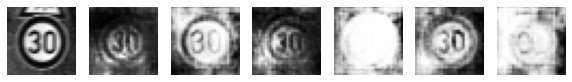

Epoch 5441 g_loss= 0.74019396 d_loss= 1.2809184 real_acc= 0.78 fake_acc= 0.54
Epoch 5442 g_loss= 0.7341011 d_loss= 1.2783152 real_acc= 0.84 fake_acc= 0.54
Epoch 5443 g_loss= 0.76671356 d_loss= 1.2609174 real_acc= 0.76 fake_acc= 0.54
Epoch 5444 g_loss= 0.7423763 d_loss= 1.2754854 real_acc= 0.76 fake_acc= 0.6
Epoch 5445 g_loss= 0.76920855 d_loss= 1.2813147 real_acc= 0.72 fake_acc= 0.6
Epoch 5446 g_loss= 0.77768767 d_loss= 1.2938588 real_acc= 0.66 fake_acc= 0.66
Epoch 5447 g_loss= 0.7575583 d_loss= 1.3035074 real_acc= 0.64 fake_acc= 0.58
Epoch 5448 g_loss= 0.77665335 d_loss= 1.2770281 real_acc= 0.64 fake_acc= 0.58
Epoch 5449 g_loss= 0.7073713 d_loss= 1.3034768 real_acc= 0.7 fake_acc= 0.42
Epoch 5450 g_loss= 0.7237472 d_loss= 1.2985607 real_acc= 0.74 fake_acc= 0.46


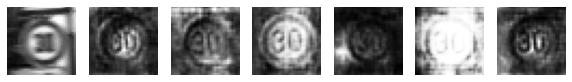

Epoch 5451 g_loss= 0.7258328 d_loss= 1.2821931 real_acc= 0.74 fake_acc= 0.52
Epoch 5452 g_loss= 0.7036441 d_loss= 1.3114574 real_acc= 0.7 fake_acc= 0.54
Epoch 5453 g_loss= 0.70553374 d_loss= 1.3111063 real_acc= 0.78 fake_acc= 0.48
Epoch 5454 g_loss= 0.71862745 d_loss= 1.245185 real_acc= 0.8 fake_acc= 0.54
Epoch 5455 g_loss= 0.6930376 d_loss= 1.292245 real_acc= 0.78 fake_acc= 0.54
Epoch 5456 g_loss= 0.73673683 d_loss= 1.2610295 real_acc= 0.8 fake_acc= 0.64
Epoch 5457 g_loss= 0.74851644 d_loss= 1.301724 real_acc= 0.66 fake_acc= 0.62
Epoch 5458 g_loss= 0.7842726 d_loss= 1.2428184 real_acc= 0.58 fake_acc= 0.78
Epoch 5459 g_loss= 0.8495478 d_loss= 1.2751956 real_acc= 0.4 fake_acc= 0.78
Epoch 5460 g_loss= 0.8393757 d_loss= 1.299048 real_acc= 0.38 fake_acc= 0.8


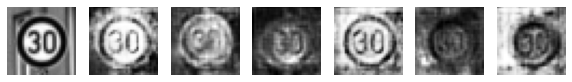

Epoch 5461 g_loss= 0.85912776 d_loss= 1.3389114 real_acc= 0.48 fake_acc= 0.82
Epoch 5462 g_loss= 0.873434 d_loss= 1.2832131 real_acc= 0.5 fake_acc= 0.86
Epoch 5463 g_loss= 0.82855743 d_loss= 1.385694 real_acc= 0.3 fake_acc= 0.82
Epoch 5464 g_loss= 0.8014872 d_loss= 1.3352246 real_acc= 0.46 fake_acc= 0.8
Epoch 5465 g_loss= 0.7674034 d_loss= 1.260714 real_acc= 0.72 fake_acc= 0.68
Epoch 5466 g_loss= 0.74633574 d_loss= 1.3226385 real_acc= 0.62 fake_acc= 0.58
Epoch 5467 g_loss= 0.73722404 d_loss= 1.2582245 real_acc= 0.68 fake_acc= 0.7
Epoch 5468 g_loss= 0.7186108 d_loss= 1.3357891 real_acc= 0.64 fake_acc= 0.6
Epoch 5469 g_loss= 0.70732445 d_loss= 1.3642242 real_acc= 0.62 fake_acc= 0.56
Epoch 5470 g_loss= 0.725511 d_loss= 1.3371277 real_acc= 0.56 fake_acc= 0.66


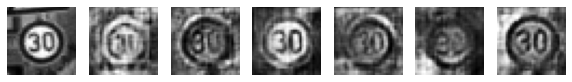

Epoch 5471 g_loss= 0.7382528 d_loss= 1.3456507 real_acc= 0.56 fake_acc= 0.64
Epoch 5472 g_loss= 0.76322794 d_loss= 1.3115351 real_acc= 0.56 fake_acc= 0.7
Epoch 5473 g_loss= 0.7570341 d_loss= 1.3728589 real_acc= 0.46 fake_acc= 0.62
Epoch 5474 g_loss= 0.766679 d_loss= 1.30991 real_acc= 0.54 fake_acc= 0.74
Epoch 5475 g_loss= 0.76495165 d_loss= 1.4251148 real_acc= 0.36 fake_acc= 0.7
Epoch 5476 g_loss= 0.7633446 d_loss= 1.3949533 real_acc= 0.38 fake_acc= 0.76
Epoch 5477 g_loss= 0.72615343 d_loss= 1.3581989 real_acc= 0.56 fake_acc= 0.68
Epoch 5478 g_loss= 0.73279166 d_loss= 1.4055483 real_acc= 0.54 fake_acc= 0.72
Epoch 5479 g_loss= 0.71696967 d_loss= 1.348201 real_acc= 0.62 fake_acc= 0.6
Epoch 5480 g_loss= 0.7175318 d_loss= 1.3651719 real_acc= 0.56 fake_acc= 0.62


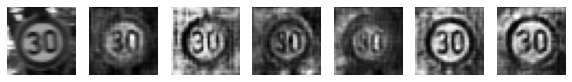

Epoch 5481 g_loss= 0.69035345 d_loss= 1.3561375 real_acc= 0.58 fake_acc= 0.46
Epoch 5482 g_loss= 0.6589069 d_loss= 1.4135509 real_acc= 0.52 fake_acc= 0.36
Epoch 5483 g_loss= 0.6476152 d_loss= 1.3924477 real_acc= 0.68 fake_acc= 0.36
Epoch 5484 g_loss= 0.6678747 d_loss= 1.3771832 real_acc= 0.68 fake_acc= 0.44
Epoch 5485 g_loss= 0.6844452 d_loss= 1.3713894 real_acc= 0.7 fake_acc= 0.46
Epoch 5486 g_loss= 0.6720354 d_loss= 1.3751254 real_acc= 0.66 fake_acc= 0.44
Epoch 5487 g_loss= 0.69584566 d_loss= 1.3719141 real_acc= 0.6 fake_acc= 0.52
Epoch 5488 g_loss= 0.74325454 d_loss= 1.3678212 real_acc= 0.42 fake_acc= 0.6
Epoch 5489 g_loss= 0.70097053 d_loss= 1.3627033 real_acc= 0.54 fake_acc= 0.58
Epoch 5490 g_loss= 0.7383422 d_loss= 1.3575356 real_acc= 0.58 fake_acc= 0.68


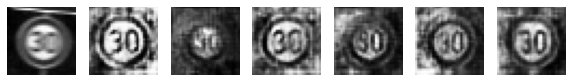

Epoch 5491 g_loss= 0.76384026 d_loss= 1.3323076 real_acc= 0.46 fake_acc= 0.64
Epoch 5492 g_loss= 0.7657188 d_loss= 1.3302354 real_acc= 0.54 fake_acc= 0.74
Epoch 5493 g_loss= 0.7702349 d_loss= 1.3647873 real_acc= 0.4 fake_acc= 0.74
Epoch 5494 g_loss= 0.7417747 d_loss= 1.3457654 real_acc= 0.46 fake_acc= 0.64
Epoch 5495 g_loss= 0.7665001 d_loss= 1.3858844 real_acc= 0.42 fake_acc= 0.68
Epoch 5496 g_loss= 0.76666033 d_loss= 1.4023602 real_acc= 0.36 fake_acc= 0.76
Epoch 5497 g_loss= 0.72713315 d_loss= 1.3735852 real_acc= 0.48 fake_acc= 0.56
Epoch 5498 g_loss= 0.70286584 d_loss= 1.4001528 real_acc= 0.44 fake_acc= 0.48
Epoch 5499 g_loss= 0.6969608 d_loss= 1.3832529 real_acc= 0.58 fake_acc= 0.52
Epoch 5500 g_loss= 0.6648922 d_loss= 1.4129105 real_acc= 0.58 fake_acc= 0.46


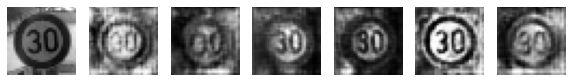

Epoch 5501 g_loss= 0.70204145 d_loss= 1.352677 real_acc= 0.64 fake_acc= 0.48
Epoch 5502 g_loss= 0.6625116 d_loss= 1.3570857 real_acc= 0.74 fake_acc= 0.4
Epoch 5503 g_loss= 0.66085005 d_loss= 1.3046861 real_acc= 0.84 fake_acc= 0.44
Epoch 5504 g_loss= 0.69290864 d_loss= 1.3671184 real_acc= 0.62 fake_acc= 0.52
Epoch 5505 g_loss= 0.71438867 d_loss= 1.3485572 real_acc= 0.62 fake_acc= 0.58
Epoch 5506 g_loss= 0.7504878 d_loss= 1.3537 real_acc= 0.44 fake_acc= 0.64
Epoch 5507 g_loss= 0.7672087 d_loss= 1.320157 real_acc= 0.6 fake_acc= 0.68
Epoch 5508 g_loss= 0.78641456 d_loss= 1.3274043 real_acc= 0.44 fake_acc= 0.66
Epoch 5509 g_loss= 0.81868166 d_loss= 1.3381753 real_acc= 0.38 fake_acc= 0.78
Epoch 5510 g_loss= 0.8169821 d_loss= 1.3742111 real_acc= 0.3 fake_acc= 0.72


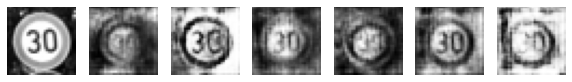

Epoch 5511 g_loss= 0.8261834 d_loss= 1.3563006 real_acc= 0.36 fake_acc= 0.8
Epoch 5512 g_loss= 0.8136652 d_loss= 1.2929891 real_acc= 0.52 fake_acc= 0.82
Epoch 5513 g_loss= 0.76169854 d_loss= 1.3385394 real_acc= 0.5 fake_acc= 0.66
Epoch 5514 g_loss= 0.7834175 d_loss= 1.304406 real_acc= 0.52 fake_acc= 0.74
Epoch 5515 g_loss= 0.7409922 d_loss= 1.3485566 real_acc= 0.54 fake_acc= 0.62
Epoch 5516 g_loss= 0.73299074 d_loss= 1.3226297 real_acc= 0.56 fake_acc= 0.64
Epoch 5517 g_loss= 0.7202906 d_loss= 1.2964792 real_acc= 0.7 fake_acc= 0.6
Epoch 5518 g_loss= 0.70754594 d_loss= 1.338778 real_acc= 0.6 fake_acc= 0.66
Epoch 5519 g_loss= 0.751801 d_loss= 1.3358823 real_acc= 0.58 fake_acc= 0.6
Epoch 5520 g_loss= 0.7488837 d_loss= 1.292557 real_acc= 0.64 fake_acc= 0.62


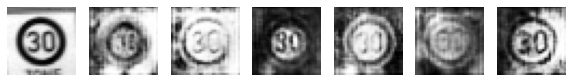

Epoch 5521 g_loss= 0.75944704 d_loss= 1.3294564 real_acc= 0.58 fake_acc= 0.68
Epoch 5522 g_loss= 0.78909284 d_loss= 1.3158162 real_acc= 0.52 fake_acc= 0.72
Epoch 5523 g_loss= 0.8104708 d_loss= 1.3536961 real_acc= 0.44 fake_acc= 0.7
Epoch 5524 g_loss= 0.79642904 d_loss= 1.4590439 real_acc= 0.24 fake_acc= 0.68
Epoch 5525 g_loss= 0.833735 d_loss= 1.426004 real_acc= 0.32 fake_acc= 0.76
Epoch 5526 g_loss= 0.8458998 d_loss= 1.3233327 real_acc= 0.4 fake_acc= 0.8
Epoch 5527 g_loss= 0.80947095 d_loss= 1.3891617 real_acc= 0.42 fake_acc= 0.72
Epoch 5528 g_loss= 0.81790596 d_loss= 1.3520784 real_acc= 0.48 fake_acc= 0.72
Epoch 5529 g_loss= 0.796201 d_loss= 1.3662521 real_acc= 0.36 fake_acc= 0.8
Epoch 5530 g_loss= 0.73804384 d_loss= 1.4014738 real_acc= 0.5 fake_acc= 0.64


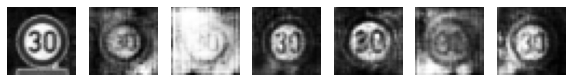

Epoch 5531 g_loss= 0.73111373 d_loss= 1.3745887 real_acc= 0.56 fake_acc= 0.62
Epoch 5532 g_loss= 0.72717124 d_loss= 1.4067373 real_acc= 0.42 fake_acc= 0.62
Epoch 5533 g_loss= 0.7146476 d_loss= 1.3514962 real_acc= 0.64 fake_acc= 0.66
Epoch 5534 g_loss= 0.7340894 d_loss= 1.3305953 real_acc= 0.66 fake_acc= 0.6
Epoch 5535 g_loss= 0.73499954 d_loss= 1.3429514 real_acc= 0.66 fake_acc= 0.62
Epoch 5536 g_loss= 0.75129837 d_loss= 1.3745286 real_acc= 0.48 fake_acc= 0.68
Epoch 5537 g_loss= 0.7548338 d_loss= 1.4259044 real_acc= 0.28 fake_acc= 0.7
Epoch 5538 g_loss= 0.7532002 d_loss= 1.3509161 real_acc= 0.5 fake_acc= 0.7
Epoch 5539 g_loss= 0.7613559 d_loss= 1.3638153 real_acc= 0.46 fake_acc= 0.68
Epoch 5540 g_loss= 0.75809324 d_loss= 1.3599676 real_acc= 0.44 fake_acc= 0.74


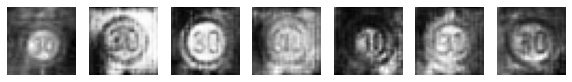

Epoch 5541 g_loss= 0.75298 d_loss= 1.3333697 real_acc= 0.56 fake_acc= 0.66
Epoch 5542 g_loss= 0.7289445 d_loss= 1.3471229 real_acc= 0.54 fake_acc= 0.72
Epoch 5543 g_loss= 0.68982285 d_loss= 1.3444967 real_acc= 0.76 fake_acc= 0.48
Epoch 5544 g_loss= 0.68398255 d_loss= 1.3498361 real_acc= 0.72 fake_acc= 0.46
Epoch 5545 g_loss= 0.668659 d_loss= 1.3459909 real_acc= 0.76 fake_acc= 0.36
Epoch 5546 g_loss= 0.6752113 d_loss= 1.3665755 real_acc= 0.64 fake_acc= 0.44
Epoch 5547 g_loss= 0.70054144 d_loss= 1.3276708 real_acc= 0.74 fake_acc= 0.48
Epoch 5548 g_loss= 0.6923545 d_loss= 1.3466644 real_acc= 0.7 fake_acc= 0.48
Epoch 5549 g_loss= 0.70027107 d_loss= 1.3713834 real_acc= 0.66 fake_acc= 0.46
Epoch 5550 g_loss= 0.7164147 d_loss= 1.3327024 real_acc= 0.62 fake_acc= 0.58


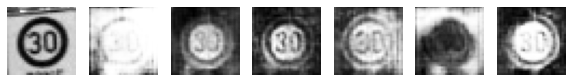

Epoch 5551 g_loss= 0.74542814 d_loss= 1.3409026 real_acc= 0.54 fake_acc= 0.7
Epoch 5552 g_loss= 0.7631345 d_loss= 1.3491242 real_acc= 0.5 fake_acc= 0.66
Epoch 5553 g_loss= 0.77866656 d_loss= 1.3303328 real_acc= 0.5 fake_acc= 0.72
Epoch 5554 g_loss= 0.76034963 d_loss= 1.3379717 real_acc= 0.56 fake_acc= 0.66
Epoch 5555 g_loss= 0.7627593 d_loss= 1.3193272 real_acc= 0.6 fake_acc= 0.66
Epoch 5556 g_loss= 0.7657328 d_loss= 1.3355055 real_acc= 0.52 fake_acc= 0.54
Epoch 5557 g_loss= 0.7419019 d_loss= 1.3460015 real_acc= 0.68 fake_acc= 0.56
Epoch 5558 g_loss= 0.7315486 d_loss= 1.3547443 real_acc= 0.66 fake_acc= 0.48
Epoch 5559 g_loss= 0.71039337 d_loss= 1.3233349 real_acc= 0.7 fake_acc= 0.46
Epoch 5560 g_loss= 0.7001037 d_loss= 1.3292098 real_acc= 0.66 fake_acc= 0.46


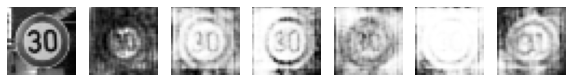

Epoch 5561 g_loss= 0.7082738 d_loss= 1.3052262 real_acc= 0.82 fake_acc= 0.46
Epoch 5562 g_loss= 0.70633024 d_loss= 1.3040743 real_acc= 0.72 fake_acc= 0.36
Epoch 5563 g_loss= 0.70957965 d_loss= 1.3133945 real_acc= 0.76 fake_acc= 0.44
Epoch 5564 g_loss= 0.7243082 d_loss= 1.3508244 real_acc= 0.66 fake_acc= 0.5
Epoch 5565 g_loss= 0.77248144 d_loss= 1.3380814 real_acc= 0.5 fake_acc= 0.56
Epoch 5566 g_loss= 0.76276964 d_loss= 1.3138976 real_acc= 0.56 fake_acc= 0.56
Epoch 5567 g_loss= 0.7558639 d_loss= 1.3370459 real_acc= 0.66 fake_acc= 0.48
Epoch 5568 g_loss= 0.75449663 d_loss= 1.3105159 real_acc= 0.68 fake_acc= 0.58
Epoch 5569 g_loss= 0.7896535 d_loss= 1.309382 real_acc= 0.6 fake_acc= 0.52
Epoch 5570 g_loss= 0.7781271 d_loss= 1.3231015 real_acc= 0.54 fake_acc= 0.6


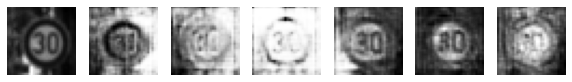

Epoch 5571 g_loss= 0.755801 d_loss= 1.3053212 real_acc= 0.62 fake_acc= 0.56
Epoch 5572 g_loss= 0.774931 d_loss= 1.3161945 real_acc= 0.56 fake_acc= 0.66
Epoch 5573 g_loss= 0.7403488 d_loss= 1.3428576 real_acc= 0.62 fake_acc= 0.5
Epoch 5574 g_loss= 0.7645269 d_loss= 1.329664 real_acc= 0.64 fake_acc= 0.54
Epoch 5575 g_loss= 0.7322168 d_loss= 1.3071692 real_acc= 0.68 fake_acc= 0.54
Epoch 5576 g_loss= 0.7439492 d_loss= 1.3181846 real_acc= 0.64 fake_acc= 0.5
Epoch 5577 g_loss= 0.7622464 d_loss= 1.3504267 real_acc= 0.58 fake_acc= 0.58
Epoch 5578 g_loss= 0.78908217 d_loss= 1.326432 real_acc= 0.56 fake_acc= 0.68
Epoch 5579 g_loss= 0.7439117 d_loss= 1.3438457 real_acc= 0.56 fake_acc= 0.56
Epoch 5580 g_loss= 0.7235777 d_loss= 1.3648442 real_acc= 0.58 fake_acc= 0.48


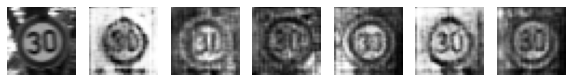

Epoch 5581 g_loss= 0.7424318 d_loss= 1.3365896 real_acc= 0.58 fake_acc= 0.58
Epoch 5582 g_loss= 0.7347306 d_loss= 1.3708758 real_acc= 0.6 fake_acc= 0.6
Epoch 5583 g_loss= 0.7016195 d_loss= 1.3594835 real_acc= 0.72 fake_acc= 0.5
Epoch 5584 g_loss= 0.7319723 d_loss= 1.3607371 real_acc= 0.62 fake_acc= 0.58
Epoch 5585 g_loss= 0.69729304 d_loss= 1.3940525 real_acc= 0.66 fake_acc= 0.4
Epoch 5586 g_loss= 0.68055207 d_loss= 1.3999037 real_acc= 0.62 fake_acc= 0.4
Epoch 5587 g_loss= 0.7400681 d_loss= 1.3502007 real_acc= 0.6 fake_acc= 0.6
Epoch 5588 g_loss= 0.7599321 d_loss= 1.3435152 real_acc= 0.52 fake_acc= 0.64
Epoch 5589 g_loss= 0.7868298 d_loss= 1.3436667 real_acc= 0.54 fake_acc= 0.74
Epoch 5590 g_loss= 0.8081636 d_loss= 1.3632894 real_acc= 0.5 fake_acc= 0.74


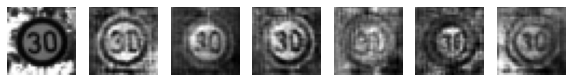

Epoch 5591 g_loss= 0.76447266 d_loss= 1.3921168 real_acc= 0.44 fake_acc= 0.64
Epoch 5592 g_loss= 0.8023832 d_loss= 1.3795614 real_acc= 0.48 fake_acc= 0.8
Epoch 5593 g_loss= 0.72549784 d_loss= 1.3951281 real_acc= 0.42 fake_acc= 0.66
Epoch 5594 g_loss= 0.79060227 d_loss= 1.3457285 real_acc= 0.54 fake_acc= 0.76
Epoch 5595 g_loss= 0.7580788 d_loss= 1.3451555 real_acc= 0.54 fake_acc= 0.66
Epoch 5596 g_loss= 0.74820185 d_loss= 1.3669021 real_acc= 0.54 fake_acc= 0.62
Epoch 5597 g_loss= 0.7308386 d_loss= 1.3772285 real_acc= 0.58 fake_acc= 0.6
Epoch 5598 g_loss= 0.7199186 d_loss= 1.3429546 real_acc= 0.64 fake_acc= 0.6
Epoch 5599 g_loss= 0.69789046 d_loss= 1.3530664 real_acc= 0.66 fake_acc= 0.54
Epoch 5600 g_loss= 0.6949837 d_loss= 1.3643785 real_acc= 0.68 fake_acc= 0.56


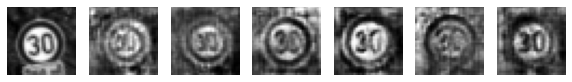

Epoch 5601 g_loss= 0.70245856 d_loss= 1.3639123 real_acc= 0.7 fake_acc= 0.48
Epoch 5602 g_loss= 0.7270863 d_loss= 1.4277997 real_acc= 0.52 fake_acc= 0.56
Epoch 5603 g_loss= 0.7491227 d_loss= 1.3679347 real_acc= 0.58 fake_acc= 0.74
Epoch 5604 g_loss= 0.7921309 d_loss= 1.3674884 real_acc= 0.44 fake_acc= 0.7
Epoch 5605 g_loss= 0.74566895 d_loss= 1.3589952 real_acc= 0.5 fake_acc= 0.64
Epoch 5606 g_loss= 0.7374379 d_loss= 1.3665539 real_acc= 0.6 fake_acc= 0.6
Epoch 5607 g_loss= 0.71139735 d_loss= 1.3306003 real_acc= 0.76 fake_acc= 0.44
Epoch 5608 g_loss= 0.70399064 d_loss= 1.3649883 real_acc= 0.66 fake_acc= 0.54
Epoch 5609 g_loss= 0.6927147 d_loss= 1.3635831 real_acc= 0.56 fake_acc= 0.42
Epoch 5610 g_loss= 0.66211647 d_loss= 1.3294837 real_acc= 0.8 fake_acc= 0.36


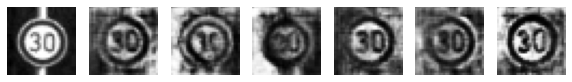

Epoch 5611 g_loss= 0.68120545 d_loss= 1.3989254 real_acc= 0.6 fake_acc= 0.36
Epoch 5612 g_loss= 0.6865167 d_loss= 1.3678524 real_acc= 0.7 fake_acc= 0.42
Epoch 5613 g_loss= 0.6928569 d_loss= 1.3431234 real_acc= 0.68 fake_acc= 0.5
Epoch 5614 g_loss= 0.68924975 d_loss= 1.3482571 real_acc= 0.68 fake_acc= 0.44
Epoch 5615 g_loss= 0.74228156 d_loss= 1.3052459 real_acc= 0.64 fake_acc= 0.6
Epoch 5616 g_loss= 0.7768028 d_loss= 1.287126 real_acc= 0.64 fake_acc= 0.72
Epoch 5617 g_loss= 0.7959745 d_loss= 1.291168 real_acc= 0.6 fake_acc= 0.72
Epoch 5618 g_loss= 0.76769644 d_loss= 1.3246541 real_acc= 0.56 fake_acc= 0.68
Epoch 5619 g_loss= 0.783377 d_loss= 1.3185962 real_acc= 0.64 fake_acc= 0.6
Epoch 5620 g_loss= 0.75623184 d_loss= 1.3070961 real_acc= 0.58 fake_acc= 0.64


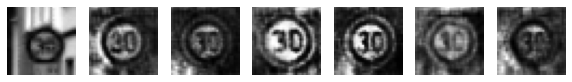

Epoch 5621 g_loss= 0.7440941 d_loss= 1.3061748 real_acc= 0.66 fake_acc= 0.56
Epoch 5622 g_loss= 0.69192624 d_loss= 1.3149734 real_acc= 0.76 fake_acc= 0.44
Epoch 5623 g_loss= 0.6837464 d_loss= 1.3210225 real_acc= 0.8 fake_acc= 0.42
Epoch 5624 g_loss= 0.7323445 d_loss= 1.2529519 real_acc= 0.88 fake_acc= 0.58
Epoch 5625 g_loss= 0.7411521 d_loss= 1.2575758 real_acc= 0.82 fake_acc= 0.58
Epoch 5626 g_loss= 0.7915068 d_loss= 1.2571716 real_acc= 0.74 fake_acc= 0.66
Epoch 5627 g_loss= 0.8000365 d_loss= 1.3451777 real_acc= 0.58 fake_acc= 0.64
Epoch 5628 g_loss= 0.8053921 d_loss= 1.3189375 real_acc= 0.46 fake_acc= 0.7
Epoch 5629 g_loss= 0.7924772 d_loss= 1.3747411 real_acc= 0.44 fake_acc= 0.68
Epoch 5630 g_loss= 0.7960925 d_loss= 1.3459008 real_acc= 0.46 fake_acc= 0.62


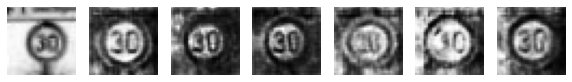

Epoch 5631 g_loss= 0.8044045 d_loss= 1.2873334 real_acc= 0.52 fake_acc= 0.78
Epoch 5632 g_loss= 0.76874304 d_loss= 1.3900647 real_acc= 0.54 fake_acc= 0.68
Epoch 5633 g_loss= 0.7608924 d_loss= 1.3011401 real_acc= 0.64 fake_acc= 0.62
Epoch 5634 g_loss= 0.7461132 d_loss= 1.3070537 real_acc= 0.66 fake_acc= 0.6
Epoch 5635 g_loss= 0.7685361 d_loss= 1.3302879 real_acc= 0.52 fake_acc= 0.7
Epoch 5636 g_loss= 0.7522618 d_loss= 1.3944354 real_acc= 0.5 fake_acc= 0.64
Epoch 5637 g_loss= 0.78279364 d_loss= 1.3227232 real_acc= 0.5 fake_acc= 0.68
Epoch 5638 g_loss= 0.779867 d_loss= 1.3823055 real_acc= 0.44 fake_acc= 0.72
Epoch 5639 g_loss= 0.8435506 d_loss= 1.4328382 real_acc= 0.26 fake_acc= 0.72
Epoch 5640 g_loss= 0.813257 d_loss= 1.4679747 real_acc= 0.4 fake_acc= 0.8


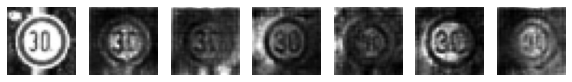

Epoch 5641 g_loss= 0.8464998 d_loss= 1.4364657 real_acc= 0.34 fake_acc= 0.76
Epoch 5642 g_loss= 0.7471579 d_loss= 1.4517418 real_acc= 0.38 fake_acc= 0.64
Epoch 5643 g_loss= 0.7410268 d_loss= 1.4924412 real_acc= 0.38 fake_acc= 0.58
Epoch 5644 g_loss= 0.6901855 d_loss= 1.4464672 real_acc= 0.56 fake_acc= 0.52
Epoch 5645 g_loss= 0.6893924 d_loss= 1.4564974 real_acc= 0.5 fake_acc= 0.5
Epoch 5646 g_loss= 0.68366086 d_loss= 1.4830897 real_acc= 0.48 fake_acc= 0.5
Epoch 5647 g_loss= 0.6409263 d_loss= 1.4639782 real_acc= 0.5 fake_acc= 0.42
Epoch 5648 g_loss= 0.7335349 d_loss= 1.5011351 real_acc= 0.42 fake_acc= 0.62
Epoch 5649 g_loss= 0.83934 d_loss= 1.4493827 real_acc= 0.3 fake_acc= 0.66
Epoch 5650 g_loss= 0.8227324 d_loss= 1.4565215 real_acc= 0.3 fake_acc= 0.76


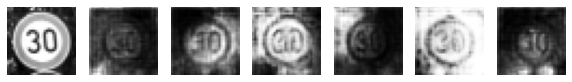

Epoch 5651 g_loss= 0.7266435 d_loss= 1.4371548 real_acc= 0.46 fake_acc= 0.62
Epoch 5652 g_loss= 0.69089735 d_loss= 1.4118459 real_acc= 0.58 fake_acc= 0.48
Epoch 5653 g_loss= 0.66571593 d_loss= 1.3974531 real_acc= 0.68 fake_acc= 0.38
Epoch 5654 g_loss= 0.6984488 d_loss= 1.4062424 real_acc= 0.56 fake_acc= 0.52
Epoch 5655 g_loss= 0.7127901 d_loss= 1.3528688 real_acc= 0.7 fake_acc= 0.6
Epoch 5656 g_loss= 0.6925998 d_loss= 1.4055398 real_acc= 0.62 fake_acc= 0.44
Epoch 5657 g_loss= 0.8023374 d_loss= 1.3779047 real_acc= 0.4 fake_acc= 0.64
Epoch 5658 g_loss= 0.8007684 d_loss= 1.379067 real_acc= 0.36 fake_acc= 0.68
Epoch 5659 g_loss= 0.73686105 d_loss= 1.3694965 real_acc= 0.52 fake_acc= 0.52
Epoch 5660 g_loss= 0.7344582 d_loss= 1.3529189 real_acc= 0.6 fake_acc= 0.56


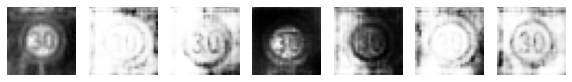

Epoch 5661 g_loss= 0.7505197 d_loss= 1.2970114 real_acc= 0.64 fake_acc= 0.66
Epoch 5662 g_loss= 0.70979273 d_loss= 1.3194332 real_acc= 0.74 fake_acc= 0.54
Epoch 5663 g_loss= 0.70491 d_loss= 1.3538749 real_acc= 0.7 fake_acc= 0.38
Epoch 5664 g_loss= 0.7140694 d_loss= 1.3247617 real_acc= 0.7 fake_acc= 0.46
Epoch 5665 g_loss= 0.71178216 d_loss= 1.333427 real_acc= 0.72 fake_acc= 0.42
Epoch 5666 g_loss= 0.707022 d_loss= 1.3173513 real_acc= 0.7 fake_acc= 0.44
Epoch 5667 g_loss= 0.7652684 d_loss= 1.3024256 real_acc= 0.74 fake_acc= 0.62
Epoch 5668 g_loss= 0.7614558 d_loss= 1.3007922 real_acc= 0.68 fake_acc= 0.52
Epoch 5669 g_loss= 0.7827636 d_loss= 1.3411605 real_acc= 0.62 fake_acc= 0.58
Epoch 5670 g_loss= 0.7459147 d_loss= 1.3569783 real_acc= 0.62 fake_acc= 0.56


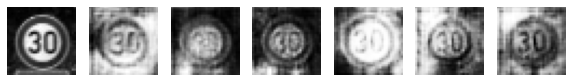

Epoch 5671 g_loss= 0.73743165 d_loss= 1.2678323 real_acc= 0.76 fake_acc= 0.56
Epoch 5672 g_loss= 0.68955773 d_loss= 1.2959678 real_acc= 0.78 fake_acc= 0.42
Epoch 5673 g_loss= 0.65063584 d_loss= 1.3215301 real_acc= 0.9 fake_acc= 0.3
Epoch 5674 g_loss= 0.67589843 d_loss= 1.339361 real_acc= 0.76 fake_acc= 0.38
Epoch 5675 g_loss= 0.68062043 d_loss= 1.3300517 real_acc= 0.72 fake_acc= 0.36
Epoch 5676 g_loss= 0.7071822 d_loss= 1.3470432 real_acc= 0.72 fake_acc= 0.44
Epoch 5677 g_loss= 0.7217392 d_loss= 1.3173819 real_acc= 0.64 fake_acc= 0.52
Epoch 5678 g_loss= 0.7455219 d_loss= 1.3299273 real_acc= 0.6 fake_acc= 0.66
Epoch 5679 g_loss= 0.760247 d_loss= 1.3720174 real_acc= 0.5 fake_acc= 0.6
Epoch 5680 g_loss= 0.7872984 d_loss= 1.3559264 real_acc= 0.38 fake_acc= 0.7


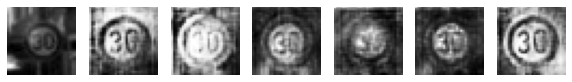

Epoch 5681 g_loss= 0.7452031 d_loss= 1.3718877 real_acc= 0.46 fake_acc= 0.64
Epoch 5682 g_loss= 0.7171769 d_loss= 1.4082086 real_acc= 0.48 fake_acc= 0.58
Epoch 5683 g_loss= 0.70736724 d_loss= 1.3981824 real_acc= 0.42 fake_acc= 0.58
Epoch 5684 g_loss= 0.69403666 d_loss= 1.3912354 real_acc= 0.54 fake_acc= 0.5
Epoch 5685 g_loss= 0.6563299 d_loss= 1.4108832 real_acc= 0.56 fake_acc= 0.42
Epoch 5686 g_loss= 0.64139754 d_loss= 1.3989055 real_acc= 0.64 fake_acc= 0.38
Epoch 5687 g_loss= 0.6539159 d_loss= 1.3510444 real_acc= 0.66 fake_acc= 0.42
Epoch 5688 g_loss= 0.64774024 d_loss= 1.3842511 real_acc= 0.58 fake_acc= 0.34
Epoch 5689 g_loss= 0.6744432 d_loss= 1.3628967 real_acc= 0.66 fake_acc= 0.42
Epoch 5690 g_loss= 0.7040509 d_loss= 1.3376093 real_acc= 0.64 fake_acc= 0.52


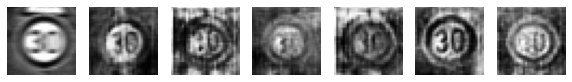

Epoch 5691 g_loss= 0.7018138 d_loss= 1.3567085 real_acc= 0.54 fake_acc= 0.64
Epoch 5692 g_loss= 0.6853315 d_loss= 1.389465 real_acc= 0.54 fake_acc= 0.52
Epoch 5693 g_loss= 0.7386849 d_loss= 1.3277416 real_acc= 0.56 fake_acc= 0.68
Epoch 5694 g_loss= 0.7261814 d_loss= 1.3855058 real_acc= 0.46 fake_acc= 0.62
Epoch 5695 g_loss= 0.7542733 d_loss= 1.2746578 real_acc= 0.7 fake_acc= 0.72
Epoch 5696 g_loss= 0.7628019 d_loss= 1.2926266 real_acc= 0.52 fake_acc= 0.8
Epoch 5697 g_loss= 0.7200159 d_loss= 1.3487234 real_acc= 0.52 fake_acc= 0.56
Epoch 5698 g_loss= 0.7203307 d_loss= 1.3205733 real_acc= 0.64 fake_acc= 0.64
Epoch 5699 g_loss= 0.7450261 d_loss= 1.3384631 real_acc= 0.5 fake_acc= 0.66
Epoch 5700 g_loss= 0.7125348 d_loss= 1.321414 real_acc= 0.68 fake_acc= 0.58


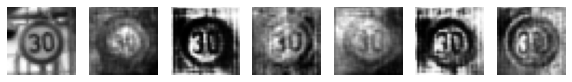

Epoch 5701 g_loss= 0.72581583 d_loss= 1.3061948 real_acc= 0.66 fake_acc= 0.62
Epoch 5702 g_loss= 0.7268097 d_loss= 1.2947292 real_acc= 0.62 fake_acc= 0.66
Epoch 5703 g_loss= 0.6787125 d_loss= 1.3403401 real_acc= 0.62 fake_acc= 0.5
Epoch 5704 g_loss= 0.72180855 d_loss= 1.2741379 real_acc= 0.6 fake_acc= 0.58
Epoch 5705 g_loss= 0.69777405 d_loss= 1.292058 real_acc= 0.74 fake_acc= 0.56
Epoch 5706 g_loss= 0.7238955 d_loss= 1.3594396 real_acc= 0.64 fake_acc= 0.56
Epoch 5707 g_loss= 0.69057673 d_loss= 1.3197734 real_acc= 0.68 fake_acc= 0.46
Epoch 5708 g_loss= 0.7558049 d_loss= 1.2888383 real_acc= 0.66 fake_acc= 0.68
Epoch 5709 g_loss= 0.72965354 d_loss= 1.2922016 real_acc= 0.64 fake_acc= 0.62
Epoch 5710 g_loss= 0.76489776 d_loss= 1.2931817 real_acc= 0.56 fake_acc= 0.74


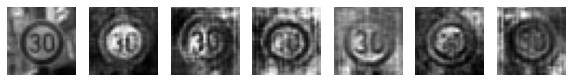

Epoch 5711 g_loss= 0.7694796 d_loss= 1.313705 real_acc= 0.48 fake_acc= 0.78
Epoch 5712 g_loss= 0.7905454 d_loss= 1.3197613 real_acc= 0.52 fake_acc= 0.84
Epoch 5713 g_loss= 0.77392924 d_loss= 1.2872782 real_acc= 0.62 fake_acc= 0.74
Epoch 5714 g_loss= 0.7683086 d_loss= 1.3063066 real_acc= 0.54 fake_acc= 0.72
Epoch 5715 g_loss= 0.7554062 d_loss= 1.2862618 real_acc= 0.66 fake_acc= 0.64
Epoch 5716 g_loss= 0.7473613 d_loss= 1.2963836 real_acc= 0.54 fake_acc= 0.62
Epoch 5717 g_loss= 0.7598846 d_loss= 1.3108876 real_acc= 0.52 fake_acc= 0.7
Epoch 5718 g_loss= 0.7439894 d_loss= 1.3384187 real_acc= 0.52 fake_acc= 0.64
Epoch 5719 g_loss= 0.7233532 d_loss= 1.257361 real_acc= 0.7 fake_acc= 0.58
Epoch 5720 g_loss= 0.7197847 d_loss= 1.3543372 real_acc= 0.52 fake_acc= 0.54


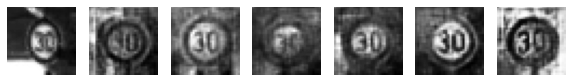

Epoch 5721 g_loss= 0.7225238 d_loss= 1.3681326 real_acc= 0.46 fake_acc= 0.54
Epoch 5722 g_loss= 0.7172996 d_loss= 1.2490523 real_acc= 0.72 fake_acc= 0.62
Epoch 5723 g_loss= 0.71764755 d_loss= 1.3031372 real_acc= 0.58 fake_acc= 0.52
Epoch 5724 g_loss= 0.7547836 d_loss= 1.3079705 real_acc= 0.52 fake_acc= 0.74
Epoch 5725 g_loss= 0.7468709 d_loss= 1.292631 real_acc= 0.54 fake_acc= 0.64
Epoch 5726 g_loss= 0.75136507 d_loss= 1.3705544 real_acc= 0.34 fake_acc= 0.66
Epoch 5727 g_loss= 0.7536171 d_loss= 1.3036773 real_acc= 0.48 fake_acc= 0.7
Epoch 5728 g_loss= 0.77836835 d_loss= 1.3323565 real_acc= 0.5 fake_acc= 0.72
Epoch 5729 g_loss= 0.7969026 d_loss= 1.3039697 real_acc= 0.48 fake_acc= 0.72
Epoch 5730 g_loss= 0.8187003 d_loss= 1.270417 real_acc= 0.48 fake_acc= 0.82


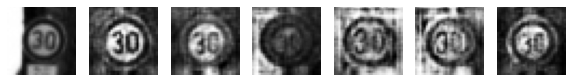

Epoch 5731 g_loss= 0.7873848 d_loss= 1.3402871 real_acc= 0.36 fake_acc= 0.78
Epoch 5732 g_loss= 0.76289934 d_loss= 1.3264463 real_acc= 0.52 fake_acc= 0.74
Epoch 5733 g_loss= 0.7422189 d_loss= 1.3724396 real_acc= 0.42 fake_acc= 0.64
Epoch 5734 g_loss= 0.7180656 d_loss= 1.3480291 real_acc= 0.56 fake_acc= 0.56
Epoch 5735 g_loss= 0.7016692 d_loss= 1.3525786 real_acc= 0.54 fake_acc= 0.6
Epoch 5736 g_loss= 0.686025 d_loss= 1.3877766 real_acc= 0.5 fake_acc= 0.48
Epoch 5737 g_loss= 0.68517995 d_loss= 1.3535058 real_acc= 0.58 fake_acc= 0.48
Epoch 5738 g_loss= 0.6956841 d_loss= 1.3695126 real_acc= 0.46 fake_acc= 0.52
Epoch 5739 g_loss= 0.70176816 d_loss= 1.355293 real_acc= 0.62 fake_acc= 0.58
Epoch 5740 g_loss= 0.729638 d_loss= 1.407884 real_acc= 0.3 fake_acc= 0.62


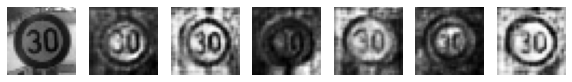

Epoch 5741 g_loss= 0.7429201 d_loss= 1.3830009 real_acc= 0.46 fake_acc= 0.74
Epoch 5742 g_loss= 0.77705336 d_loss= 1.3496275 real_acc= 0.38 fake_acc= 0.7
Epoch 5743 g_loss= 0.79673284 d_loss= 1.3973525 real_acc= 0.32 fake_acc= 0.8
Epoch 5744 g_loss= 0.76935303 d_loss= 1.3987845 real_acc= 0.28 fake_acc= 0.76
Epoch 5745 g_loss= 0.7400444 d_loss= 1.4354291 real_acc= 0.34 fake_acc= 0.74
Epoch 5746 g_loss= 0.7421392 d_loss= 1.4101715 real_acc= 0.34 fake_acc= 0.6
Epoch 5747 g_loss= 0.7222837 d_loss= 1.456162 real_acc= 0.28 fake_acc= 0.58
Epoch 5748 g_loss= 0.6959045 d_loss= 1.403229 real_acc= 0.48 fake_acc= 0.58
Epoch 5749 g_loss= 0.71880096 d_loss= 1.4378994 real_acc= 0.38 fake_acc= 0.58
Epoch 5750 g_loss= 0.6842567 d_loss= 1.497278 real_acc= 0.38 fake_acc= 0.46


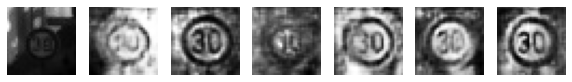

Epoch 5751 g_loss= 0.7187619 d_loss= 1.4210727 real_acc= 0.38 fake_acc= 0.58
Epoch 5752 g_loss= 0.669766 d_loss= 1.4162827 real_acc= 0.46 fake_acc= 0.46
Epoch 5753 g_loss= 0.6817553 d_loss= 1.4739699 real_acc= 0.36 fake_acc= 0.48
Epoch 5754 g_loss= 0.7115866 d_loss= 1.4381124 real_acc= 0.42 fake_acc= 0.6
Epoch 5755 g_loss= 0.70815825 d_loss= 1.4123921 real_acc= 0.46 fake_acc= 0.48
Epoch 5756 g_loss= 0.6990522 d_loss= 1.4359664 real_acc= 0.44 fake_acc= 0.44
Epoch 5757 g_loss= 0.6804903 d_loss= 1.4489841 real_acc= 0.48 fake_acc= 0.46
Epoch 5758 g_loss= 0.7274186 d_loss= 1.4200253 real_acc= 0.42 fake_acc= 0.68
Epoch 5759 g_loss= 0.71186835 d_loss= 1.4033277 real_acc= 0.52 fake_acc= 0.54
Epoch 5760 g_loss= 0.70739794 d_loss= 1.4143326 real_acc= 0.48 fake_acc= 0.46


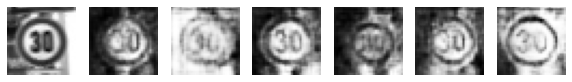

Epoch 5761 g_loss= 0.7214391 d_loss= 1.3952787 real_acc= 0.44 fake_acc= 0.62
Epoch 5762 g_loss= 0.7481067 d_loss= 1.3712447 real_acc= 0.44 fake_acc= 0.64
Epoch 5763 g_loss= 0.73007065 d_loss= 1.3888603 real_acc= 0.48 fake_acc= 0.54
Epoch 5764 g_loss= 0.7307832 d_loss= 1.3732126 real_acc= 0.54 fake_acc= 0.64
Epoch 5765 g_loss= 0.7600176 d_loss= 1.4213789 real_acc= 0.22 fake_acc= 0.56
Epoch 5766 g_loss= 0.75896513 d_loss= 1.3972943 real_acc= 0.4 fake_acc= 0.72
Epoch 5767 g_loss= 0.75963384 d_loss= 1.3744932 real_acc= 0.44 fake_acc= 0.68
Epoch 5768 g_loss= 0.73512244 d_loss= 1.362709 real_acc= 0.54 fake_acc= 0.68
Epoch 5769 g_loss= 0.73124045 d_loss= 1.3514757 real_acc= 0.58 fake_acc= 0.58
Epoch 5770 g_loss= 0.722884 d_loss= 1.3311623 real_acc= 0.56 fake_acc= 0.64


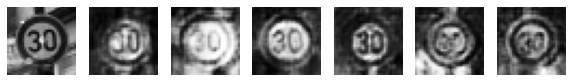

Epoch 5771 g_loss= 0.7505946 d_loss= 1.3277953 real_acc= 0.66 fake_acc= 0.62
Epoch 5772 g_loss= 0.76025385 d_loss= 1.3231769 real_acc= 0.6 fake_acc= 0.7
Epoch 5773 g_loss= 0.75806516 d_loss= 1.3003404 real_acc= 0.64 fake_acc= 0.8
Epoch 5774 g_loss= 0.73914045 d_loss= 1.3299502 real_acc= 0.64 fake_acc= 0.56
Epoch 5775 g_loss= 0.7859942 d_loss= 1.2902795 real_acc= 0.68 fake_acc= 0.78
Epoch 5776 g_loss= 0.78492516 d_loss= 1.2908854 real_acc= 0.76 fake_acc= 0.76
Epoch 5777 g_loss= 0.7872906 d_loss= 1.3100779 real_acc= 0.6 fake_acc= 0.7
Epoch 5778 g_loss= 0.78838027 d_loss= 1.3159995 real_acc= 0.58 fake_acc= 0.76
Epoch 5779 g_loss= 0.7731334 d_loss= 1.2808139 real_acc= 0.72 fake_acc= 0.68
Epoch 5780 g_loss= 0.7723895 d_loss= 1.2827418 real_acc= 0.72 fake_acc= 0.66


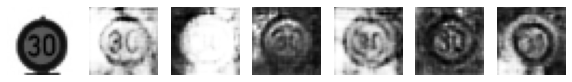

Epoch 5781 g_loss= 0.7867672 d_loss= 1.2666585 real_acc= 0.7 fake_acc= 0.76
Epoch 5782 g_loss= 0.75816566 d_loss= 1.2340367 real_acc= 0.9 fake_acc= 0.66
Epoch 5783 g_loss= 0.8032189 d_loss= 1.2589583 real_acc= 0.74 fake_acc= 0.82
Epoch 5784 g_loss= 0.7970034 d_loss= 1.2544858 real_acc= 0.78 fake_acc= 0.82
Epoch 5785 g_loss= 0.8122769 d_loss= 1.2030433 real_acc= 0.78 fake_acc= 0.8
Epoch 5786 g_loss= 0.7964393 d_loss= 1.2639418 real_acc= 0.82 fake_acc= 0.82
Epoch 5787 g_loss= 0.82118124 d_loss= 1.2365906 real_acc= 0.68 fake_acc= 0.8
Epoch 5788 g_loss= 0.8428492 d_loss= 1.2346156 real_acc= 0.72 fake_acc= 0.92
Epoch 5789 g_loss= 0.8321843 d_loss= 1.2541182 real_acc= 0.68 fake_acc= 0.84
Epoch 5790 g_loss= 0.87523735 d_loss= 1.2256817 real_acc= 0.62 fake_acc= 0.9


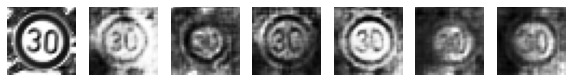

Epoch 5791 g_loss= 0.8282182 d_loss= 1.2029254 real_acc= 0.8 fake_acc= 0.78
Epoch 5792 g_loss= 0.8322394 d_loss= 1.1955296 real_acc= 0.8 fake_acc= 0.88
Epoch 5793 g_loss= 0.80421555 d_loss= 1.2296834 real_acc= 0.66 fake_acc= 0.88
Epoch 5794 g_loss= 0.7623439 d_loss= 1.2656262 real_acc= 0.74 fake_acc= 0.66
Epoch 5795 g_loss= 0.77565336 d_loss= 1.2508811 real_acc= 0.78 fake_acc= 0.66
Epoch 5796 g_loss= 0.7873162 d_loss= 1.206392 real_acc= 0.8 fake_acc= 0.74
Epoch 5797 g_loss= 0.7921924 d_loss= 1.2476485 real_acc= 0.72 fake_acc= 0.7
Epoch 5798 g_loss= 0.7765127 d_loss= 1.2794669 real_acc= 0.66 fake_acc= 0.74
Epoch 5799 g_loss= 0.782454 d_loss= 1.2497957 real_acc= 0.66 fake_acc= 0.78
Epoch 5800 g_loss= 0.8196991 d_loss= 1.2520056 real_acc= 0.62 fake_acc= 0.74


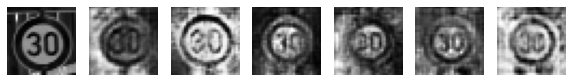

Epoch 5801 g_loss= 0.7988271 d_loss= 1.2767512 real_acc= 0.72 fake_acc= 0.66
Epoch 5802 g_loss= 0.7750054 d_loss= 1.2370062 real_acc= 0.76 fake_acc= 0.72
Epoch 5803 g_loss= 0.80564445 d_loss= 1.2885728 real_acc= 0.62 fake_acc= 0.7
Epoch 5804 g_loss= 0.77378345 d_loss= 1.3169794 real_acc= 0.66 fake_acc= 0.68
Epoch 5805 g_loss= 0.7680726 d_loss= 1.3241191 real_acc= 0.62 fake_acc= 0.64
Epoch 5806 g_loss= 0.7744359 d_loss= 1.2826216 real_acc= 0.58 fake_acc= 0.7
Epoch 5807 g_loss= 0.7907936 d_loss= 1.3212314 real_acc= 0.5 fake_acc= 0.7
Epoch 5808 g_loss= 0.75625396 d_loss= 1.3257226 real_acc= 0.6 fake_acc= 0.62
Epoch 5809 g_loss= 0.70324945 d_loss= 1.3422762 real_acc= 0.66 fake_acc= 0.46
Epoch 5810 g_loss= 0.72185165 d_loss= 1.2704568 real_acc= 0.74 fake_acc= 0.54


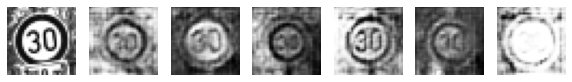

Epoch 5811 g_loss= 0.7562386 d_loss= 1.3377558 real_acc= 0.6 fake_acc= 0.6
Epoch 5812 g_loss= 0.7182222 d_loss= 1.3470738 real_acc= 0.62 fake_acc= 0.58
Epoch 5813 g_loss= 0.7171201 d_loss= 1.4178329 real_acc= 0.46 fake_acc= 0.46
Epoch 5814 g_loss= 0.7403579 d_loss= 1.3232608 real_acc= 0.66 fake_acc= 0.62
Epoch 5815 g_loss= 0.7592839 d_loss= 1.36178 real_acc= 0.52 fake_acc= 0.66
Epoch 5816 g_loss= 0.72951555 d_loss= 1.408082 real_acc= 0.5 fake_acc= 0.62
Epoch 5817 g_loss= 0.725872 d_loss= 1.3810964 real_acc= 0.54 fake_acc= 0.44
Epoch 5818 g_loss= 0.710871 d_loss= 1.3814714 real_acc= 0.54 fake_acc= 0.54
Epoch 5819 g_loss= 0.72203827 d_loss= 1.3517914 real_acc= 0.72 fake_acc= 0.56
Epoch 5820 g_loss= 0.72707444 d_loss= 1.3181264 real_acc= 0.62 fake_acc= 0.56


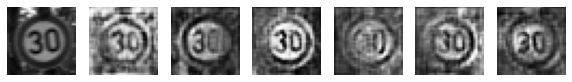

Epoch 5821 g_loss= 0.6848488 d_loss= 1.4525995 real_acc= 0.5 fake_acc= 0.42
Epoch 5822 g_loss= 0.68205446 d_loss= 1.4429497 real_acc= 0.54 fake_acc= 0.44
Epoch 5823 g_loss= 0.67983437 d_loss= 1.3744668 real_acc= 0.7 fake_acc= 0.5
Epoch 5824 g_loss= 0.7280066 d_loss= 1.2949617 real_acc= 0.74 fake_acc= 0.6
Epoch 5825 g_loss= 0.70662713 d_loss= 1.3731956 real_acc= 0.56 fake_acc= 0.48
Epoch 5826 g_loss= 0.71421295 d_loss= 1.4596472 real_acc= 0.52 fake_acc= 0.66
Epoch 5827 g_loss= 0.75659037 d_loss= 1.4021201 real_acc= 0.46 fake_acc= 0.7
Epoch 5828 g_loss= 0.76481116 d_loss= 1.4677703 real_acc= 0.36 fake_acc= 0.66
Epoch 5829 g_loss= 0.7501686 d_loss= 1.3704016 real_acc= 0.48 fake_acc= 0.66
Epoch 5830 g_loss= 0.7450735 d_loss= 1.4153626 real_acc= 0.5 fake_acc= 0.68


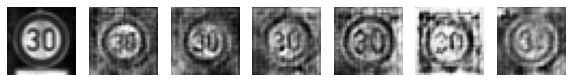

Epoch 5831 g_loss= 0.6935083 d_loss= 1.4990945 real_acc= 0.4 fake_acc= 0.46
Epoch 5832 g_loss= 0.6677898 d_loss= 1.5052707 real_acc= 0.5 fake_acc= 0.42
Epoch 5833 g_loss= 0.68066007 d_loss= 1.3742267 real_acc= 0.64 fake_acc= 0.56
Epoch 5834 g_loss= 0.6329076 d_loss= 1.4331436 real_acc= 0.68 fake_acc= 0.26
Epoch 5835 g_loss= 0.668935 d_loss= 1.4456153 real_acc= 0.5 fake_acc= 0.42
Epoch 5836 g_loss= 0.6525047 d_loss= 1.4408836 real_acc= 0.56 fake_acc= 0.42
Epoch 5837 g_loss= 0.64762396 d_loss= 1.4229057 real_acc= 0.62 fake_acc= 0.34
Epoch 5838 g_loss= 0.65353584 d_loss= 1.4647276 real_acc= 0.54 fake_acc= 0.42
Epoch 5839 g_loss= 0.6797949 d_loss= 1.3869553 real_acc= 0.54 fake_acc= 0.5
Epoch 5840 g_loss= 0.68675995 d_loss= 1.4748409 real_acc= 0.44 fake_acc= 0.32


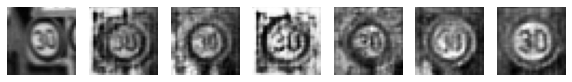

Epoch 5841 g_loss= 0.7119192 d_loss= 1.4244527 real_acc= 0.5 fake_acc= 0.6
Epoch 5842 g_loss= 0.72089577 d_loss= 1.4198947 real_acc= 0.48 fake_acc= 0.56
Epoch 5843 g_loss= 0.72058576 d_loss= 1.4704609 real_acc= 0.32 fake_acc= 0.58
Epoch 5844 g_loss= 0.67862993 d_loss= 1.4873049 real_acc= 0.44 fake_acc= 0.42
Epoch 5845 g_loss= 0.65959334 d_loss= 1.4567714 real_acc= 0.44 fake_acc= 0.34
Epoch 5846 g_loss= 0.6557908 d_loss= 1.4173658 real_acc= 0.6 fake_acc= 0.42
Epoch 5847 g_loss= 0.6247071 d_loss= 1.4267195 real_acc= 0.6 fake_acc= 0.24
Epoch 5848 g_loss= 0.6254105 d_loss= 1.4733231 real_acc= 0.5 fake_acc= 0.22
Epoch 5849 g_loss= 0.6141573 d_loss= 1.4379995 real_acc= 0.68 fake_acc= 0.22
Epoch 5850 g_loss= 0.6399106 d_loss= 1.3669026 real_acc= 0.78 fake_acc= 0.28


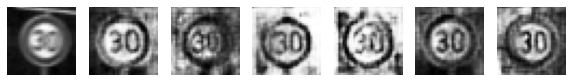

Epoch 5851 g_loss= 0.62749016 d_loss= 1.4269465 real_acc= 0.6 fake_acc= 0.24
Epoch 5852 g_loss= 0.66648847 d_loss= 1.4437978 real_acc= 0.52 fake_acc= 0.36
Epoch 5853 g_loss= 0.6917621 d_loss= 1.4183295 real_acc= 0.48 fake_acc= 0.46
Epoch 5854 g_loss= 0.71075284 d_loss= 1.4556816 real_acc= 0.36 fake_acc= 0.46
Epoch 5855 g_loss= 0.7147629 d_loss= 1.4034786 real_acc= 0.42 fake_acc= 0.56
Epoch 5856 g_loss= 0.7147246 d_loss= 1.430295 real_acc= 0.46 fake_acc= 0.56
Epoch 5857 g_loss= 0.7187402 d_loss= 1.4108553 real_acc= 0.5 fake_acc= 0.56
Epoch 5858 g_loss= 0.71825004 d_loss= 1.3975735 real_acc= 0.44 fake_acc= 0.52
Epoch 5859 g_loss= 0.71057683 d_loss= 1.4407793 real_acc= 0.42 fake_acc= 0.52
Epoch 5860 g_loss= 0.68075633 d_loss= 1.3818007 real_acc= 0.58 fake_acc= 0.48


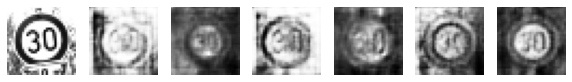

Epoch 5861 g_loss= 0.67180115 d_loss= 1.4136122 real_acc= 0.5 fake_acc= 0.34
Epoch 5862 g_loss= 0.6606072 d_loss= 1.4080105 real_acc= 0.62 fake_acc= 0.3
Epoch 5863 g_loss= 0.6683996 d_loss= 1.4072499 real_acc= 0.52 fake_acc= 0.4
Epoch 5864 g_loss= 0.6843775 d_loss= 1.3792336 real_acc= 0.58 fake_acc= 0.46
Epoch 5865 g_loss= 0.6888582 d_loss= 1.3347626 real_acc= 0.78 fake_acc= 0.34
Epoch 5866 g_loss= 0.73898596 d_loss= 1.322592 real_acc= 0.62 fake_acc= 0.62
Epoch 5867 g_loss= 0.7197423 d_loss= 1.3324583 real_acc= 0.68 fake_acc= 0.56
Epoch 5868 g_loss= 0.75927484 d_loss= 1.341461 real_acc= 0.48 fake_acc= 0.68
Epoch 5869 g_loss= 0.7760237 d_loss= 1.3391709 real_acc= 0.44 fake_acc= 0.74
Epoch 5870 g_loss= 0.75821775 d_loss= 1.3422253 real_acc= 0.44 fake_acc= 0.76


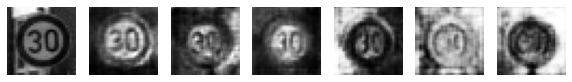

Epoch 5871 g_loss= 0.77225035 d_loss= 1.3497349 real_acc= 0.44 fake_acc= 0.74
Epoch 5872 g_loss= 0.78611875 d_loss= 1.3253273 real_acc= 0.4 fake_acc= 0.76
Epoch 5873 g_loss= 0.8136328 d_loss= 1.2956977 real_acc= 0.58 fake_acc= 0.84
Epoch 5874 g_loss= 0.81736994 d_loss= 1.2379557 real_acc= 0.66 fake_acc= 0.92
Epoch 5875 g_loss= 0.7988949 d_loss= 1.2684387 real_acc= 0.68 fake_acc= 0.78
Epoch 5876 g_loss= 0.76594007 d_loss= 1.3009968 real_acc= 0.62 fake_acc= 0.78
Epoch 5877 g_loss= 0.7431794 d_loss= 1.3062315 real_acc= 0.68 fake_acc= 0.7
Epoch 5878 g_loss= 0.73619944 d_loss= 1.2805665 real_acc= 0.74 fake_acc= 0.72
Epoch 5879 g_loss= 0.74514246 d_loss= 1.2922251 real_acc= 0.76 fake_acc= 0.64
Epoch 5880 g_loss= 0.74727744 d_loss= 1.2611849 real_acc= 0.82 fake_acc= 0.7


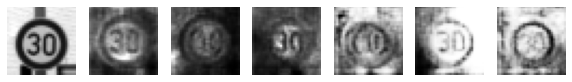

Epoch 5881 g_loss= 0.7387229 d_loss= 1.3120401 real_acc= 0.62 fake_acc= 0.7
Epoch 5882 g_loss= 0.7569005 d_loss= 1.269099 real_acc= 0.74 fake_acc= 0.7
Epoch 5883 g_loss= 0.7351091 d_loss= 1.308412 real_acc= 0.74 fake_acc= 0.7
Epoch 5884 g_loss= 0.79515386 d_loss= 1.3043706 real_acc= 0.62 fake_acc= 0.84
Epoch 5885 g_loss= 0.7917019 d_loss= 1.2472292 real_acc= 0.68 fake_acc= 0.7
Epoch 5886 g_loss= 0.79653096 d_loss= 1.3310505 real_acc= 0.52 fake_acc= 0.8
Epoch 5887 g_loss= 0.7810306 d_loss= 1.3346514 real_acc= 0.56 fake_acc= 0.72
Epoch 5888 g_loss= 0.7877891 d_loss= 1.3082395 real_acc= 0.6 fake_acc= 0.74
Epoch 5889 g_loss= 0.822739 d_loss= 1.261172 real_acc= 0.52 fake_acc= 0.8
Epoch 5890 g_loss= 0.77322227 d_loss= 1.2826085 real_acc= 0.66 fake_acc= 0.66


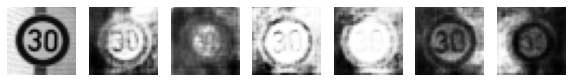

Epoch 5891 g_loss= 0.8158275 d_loss= 1.2432313 real_acc= 0.72 fake_acc= 0.76
Epoch 5892 g_loss= 0.78972894 d_loss= 1.2760594 real_acc= 0.74 fake_acc= 0.64
Epoch 5893 g_loss= 0.77938974 d_loss= 1.2922957 real_acc= 0.7 fake_acc= 0.7
Epoch 5894 g_loss= 0.7707487 d_loss= 1.2976855 real_acc= 0.66 fake_acc= 0.74
Epoch 5895 g_loss= 0.7805445 d_loss= 1.2528279 real_acc= 0.7 fake_acc= 0.62
Epoch 5896 g_loss= 0.82385117 d_loss= 1.282368 real_acc= 0.56 fake_acc= 0.74
Epoch 5897 g_loss= 0.78556955 d_loss= 1.2788153 real_acc= 0.66 fake_acc= 0.72
Epoch 5898 g_loss= 0.830771 d_loss= 1.2826979 real_acc= 0.66 fake_acc= 0.76
Epoch 5899 g_loss= 0.7703018 d_loss= 1.3067997 real_acc= 0.62 fake_acc= 0.62
Epoch 5900 g_loss= 0.8005997 d_loss= 1.267226 real_acc= 0.72 fake_acc= 0.74


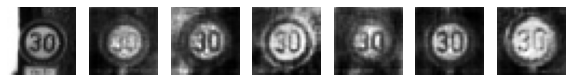

Epoch 5901 g_loss= 0.79113394 d_loss= 1.2761037 real_acc= 0.6 fake_acc= 0.7
Epoch 5902 g_loss= 0.7770778 d_loss= 1.3056479 real_acc= 0.64 fake_acc= 0.68
Epoch 5903 g_loss= 0.7836584 d_loss= 1.2852228 real_acc= 0.7 fake_acc= 0.66
Epoch 5904 g_loss= 0.7814821 d_loss= 1.3080083 real_acc= 0.58 fake_acc= 0.7
Epoch 5905 g_loss= 0.79917735 d_loss= 1.316915 real_acc= 0.56 fake_acc= 0.74
Epoch 5906 g_loss= 0.7676563 d_loss= 1.307395 real_acc= 0.62 fake_acc= 0.72
Epoch 5907 g_loss= 0.80373216 d_loss= 1.2752619 real_acc= 0.66 fake_acc= 0.76
Epoch 5908 g_loss= 0.72518355 d_loss= 1.3997388 real_acc= 0.5 fake_acc= 0.6
Epoch 5909 g_loss= 0.76022536 d_loss= 1.3484122 real_acc= 0.54 fake_acc= 0.62
Epoch 5910 g_loss= 0.8109776 d_loss= 1.2781045 real_acc= 0.62 fake_acc= 0.78


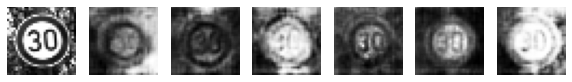

Epoch 5911 g_loss= 0.7541739 d_loss= 1.3060498 real_acc= 0.76 fake_acc= 0.68
Epoch 5912 g_loss= 0.76693404 d_loss= 1.332804 real_acc= 0.5 fake_acc= 0.64
Epoch 5913 g_loss= 0.7656429 d_loss= 1.3353858 real_acc= 0.58 fake_acc= 0.64
Epoch 5914 g_loss= 0.75447434 d_loss= 1.3583627 real_acc= 0.54 fake_acc= 0.64
Epoch 5915 g_loss= 0.7647721 d_loss= 1.2936088 real_acc= 0.72 fake_acc= 0.68
Epoch 5916 g_loss= 0.7375813 d_loss= 1.3790181 real_acc= 0.6 fake_acc= 0.44
Epoch 5917 g_loss= 0.733233 d_loss= 1.3904042 real_acc= 0.56 fake_acc= 0.46
Epoch 5918 g_loss= 0.7677458 d_loss= 1.2998564 real_acc= 0.66 fake_acc= 0.58
Epoch 5919 g_loss= 0.74093854 d_loss= 1.3935072 real_acc= 0.44 fake_acc= 0.54
Epoch 5920 g_loss= 0.71321344 d_loss= 1.380372 real_acc= 0.62 fake_acc= 0.5


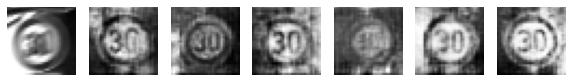

Epoch 5921 g_loss= 0.71925783 d_loss= 1.4038017 real_acc= 0.56 fake_acc= 0.46
Epoch 5922 g_loss= 0.7247742 d_loss= 1.3576217 real_acc= 0.64 fake_acc= 0.38
Epoch 5923 g_loss= 0.7255159 d_loss= 1.3300529 real_acc= 0.78 fake_acc= 0.48
Epoch 5924 g_loss= 0.72537637 d_loss= 1.3677613 real_acc= 0.62 fake_acc= 0.48
Epoch 5925 g_loss= 0.7282849 d_loss= 1.375411 real_acc= 0.54 fake_acc= 0.46
Epoch 5926 g_loss= 0.7356012 d_loss= 1.3701851 real_acc= 0.6 fake_acc= 0.48
Epoch 5927 g_loss= 0.7403309 d_loss= 1.3857138 real_acc= 0.6 fake_acc= 0.58
Epoch 5928 g_loss= 0.7215242 d_loss= 1.3670602 real_acc= 0.68 fake_acc= 0.44
Epoch 5929 g_loss= 0.72236854 d_loss= 1.3664455 real_acc= 0.64 fake_acc= 0.46
Epoch 5930 g_loss= 0.6987888 d_loss= 1.3948854 real_acc= 0.64 fake_acc= 0.4


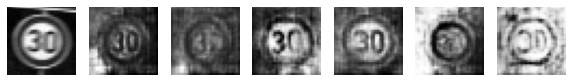

Epoch 5931 g_loss= 0.6987497 d_loss= 1.372439 real_acc= 0.64 fake_acc= 0.46
Epoch 5932 g_loss= 0.6831885 d_loss= 1.3774431 real_acc= 0.7 fake_acc= 0.38
Epoch 5933 g_loss= 0.6985361 d_loss= 1.3794277 real_acc= 0.62 fake_acc= 0.46
Epoch 5934 g_loss= 0.6953795 d_loss= 1.3720148 real_acc= 0.64 fake_acc= 0.42
Epoch 5935 g_loss= 0.6828621 d_loss= 1.3829844 real_acc= 0.66 fake_acc= 0.4
Epoch 5936 g_loss= 0.7322252 d_loss= 1.3997712 real_acc= 0.58 fake_acc= 0.54
Epoch 5937 g_loss= 0.7474744 d_loss= 1.4138863 real_acc= 0.5 fake_acc= 0.52
Epoch 5938 g_loss= 0.7428799 d_loss= 1.364181 real_acc= 0.52 fake_acc= 0.52
Epoch 5939 g_loss= 0.7518246 d_loss= 1.3554151 real_acc= 0.62 fake_acc= 0.5
Epoch 5940 g_loss= 0.71091837 d_loss= 1.3574086 real_acc= 0.68 fake_acc= 0.5


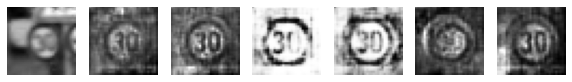

Epoch 5941 g_loss= 0.75710124 d_loss= 1.2929668 real_acc= 0.68 fake_acc= 0.62
Epoch 5942 g_loss= 0.7338109 d_loss= 1.3781052 real_acc= 0.56 fake_acc= 0.52
Epoch 5943 g_loss= 0.76232874 d_loss= 1.3585243 real_acc= 0.5 fake_acc= 0.58
Epoch 5944 g_loss= 0.7329976 d_loss= 1.33852 real_acc= 0.64 fake_acc= 0.52
Epoch 5945 g_loss= 0.72615033 d_loss= 1.4047916 real_acc= 0.58 fake_acc= 0.52
Epoch 5946 g_loss= 0.69932 d_loss= 1.3729453 real_acc= 0.6 fake_acc= 0.46
Epoch 5947 g_loss= 0.6789355 d_loss= 1.3416748 real_acc= 0.7 fake_acc= 0.46
Epoch 5948 g_loss= 0.67305315 d_loss= 1.3818407 real_acc= 0.72 fake_acc= 0.38
Epoch 5949 g_loss= 0.6535157 d_loss= 1.3388231 real_acc= 0.82 fake_acc= 0.32
Epoch 5950 g_loss= 0.66896075 d_loss= 1.3180573 real_acc= 0.8 fake_acc= 0.38


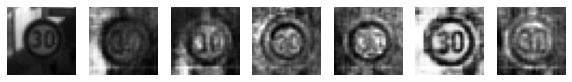

Epoch 5951 g_loss= 0.67751956 d_loss= 1.3570666 real_acc= 0.68 fake_acc= 0.38
Epoch 5952 g_loss= 0.68794656 d_loss= 1.34305 real_acc= 0.66 fake_acc= 0.4
Epoch 5953 g_loss= 0.70142907 d_loss= 1.3299208 real_acc= 0.68 fake_acc= 0.46
Epoch 5954 g_loss= 0.7068416 d_loss= 1.3065758 real_acc= 0.76 fake_acc= 0.54
Epoch 5955 g_loss= 0.74623567 d_loss= 1.3334664 real_acc= 0.58 fake_acc= 0.56
Epoch 5956 g_loss= 0.76715386 d_loss= 1.3262515 real_acc= 0.54 fake_acc= 0.54
Epoch 5957 g_loss= 0.7621098 d_loss= 1.3455508 real_acc= 0.54 fake_acc= 0.66
Epoch 5958 g_loss= 0.74210924 d_loss= 1.3617759 real_acc= 0.58 fake_acc= 0.58
Epoch 5959 g_loss= 0.72336763 d_loss= 1.2958614 real_acc= 0.68 fake_acc= 0.5
Epoch 5960 g_loss= 0.7060784 d_loss= 1.306987 real_acc= 0.6 fake_acc= 0.44


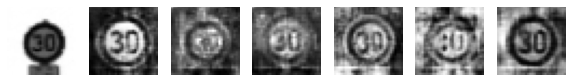

Epoch 5961 g_loss= 0.71897066 d_loss= 1.3444059 real_acc= 0.6 fake_acc= 0.56
Epoch 5962 g_loss= 0.70006007 d_loss= 1.3631539 real_acc= 0.6 fake_acc= 0.44
Epoch 5963 g_loss= 0.70815855 d_loss= 1.3351157 real_acc= 0.56 fake_acc= 0.54
Epoch 5964 g_loss= 0.7033891 d_loss= 1.3624119 real_acc= 0.52 fake_acc= 0.48
Epoch 5965 g_loss= 0.7236566 d_loss= 1.3889922 real_acc= 0.44 fake_acc= 0.54
Epoch 5966 g_loss= 0.7195113 d_loss= 1.3402541 real_acc= 0.56 fake_acc= 0.56
Epoch 5967 g_loss= 0.7627175 d_loss= 1.3299388 real_acc= 0.52 fake_acc= 0.68
Epoch 5968 g_loss= 0.7642485 d_loss= 1.2791911 real_acc= 0.58 fake_acc= 0.74
Epoch 5969 g_loss= 0.72702134 d_loss= 1.3091215 real_acc= 0.52 fake_acc= 0.62
Epoch 5970 g_loss= 0.70244336 d_loss= 1.3103828 real_acc= 0.66 fake_acc= 0.52


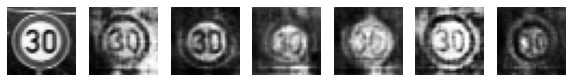

Epoch 5971 g_loss= 0.73252183 d_loss= 1.3198297 real_acc= 0.56 fake_acc= 0.62
Epoch 5972 g_loss= 0.7427722 d_loss= 1.2962763 real_acc= 0.68 fake_acc= 0.56
Epoch 5973 g_loss= 0.7168987 d_loss= 1.2746228 real_acc= 0.66 fake_acc= 0.64
Epoch 5974 g_loss= 0.75137216 d_loss= 1.2800412 real_acc= 0.58 fake_acc= 0.72
Epoch 5975 g_loss= 0.73760223 d_loss= 1.3358148 real_acc= 0.48 fake_acc= 0.68
Epoch 5976 g_loss= 0.7615736 d_loss= 1.2861121 real_acc= 0.56 fake_acc= 0.7
Epoch 5977 g_loss= 0.7355888 d_loss= 1.3418188 real_acc= 0.52 fake_acc= 0.62
Epoch 5978 g_loss= 0.7202084 d_loss= 1.2922564 real_acc= 0.6 fake_acc= 0.66
Epoch 5979 g_loss= 0.70989454 d_loss= 1.3495262 real_acc= 0.5 fake_acc= 0.48
Epoch 5980 g_loss= 0.73259735 d_loss= 1.3477824 real_acc= 0.46 fake_acc= 0.62


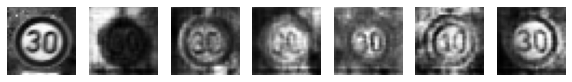

Epoch 5981 g_loss= 0.7824993 d_loss= 1.2856101 real_acc= 0.52 fake_acc= 0.8
Epoch 5982 g_loss= 0.77151597 d_loss= 1.3118179 real_acc= 0.44 fake_acc= 0.7
Epoch 5983 g_loss= 0.7533693 d_loss= 1.3320618 real_acc= 0.48 fake_acc= 0.66
Epoch 5984 g_loss= 0.7991178 d_loss= 1.3524206 real_acc= 0.3 fake_acc= 0.76
Epoch 5985 g_loss= 0.75590974 d_loss= 1.3188136 real_acc= 0.52 fake_acc= 0.7
Epoch 5986 g_loss= 0.76899195 d_loss= 1.3211119 real_acc= 0.48 fake_acc= 0.7
Epoch 5987 g_loss= 0.76120675 d_loss= 1.3771331 real_acc= 0.36 fake_acc= 0.64
Epoch 5988 g_loss= 0.79748416 d_loss= 1.3366059 real_acc= 0.4 fake_acc= 0.8
Epoch 5989 g_loss= 0.8016891 d_loss= 1.3481789 real_acc= 0.44 fake_acc= 0.76
Epoch 5990 g_loss= 0.769255 d_loss= 1.3231331 real_acc= 0.54 fake_acc= 0.62


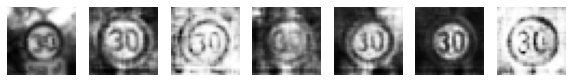

Epoch 5991 g_loss= 0.77553904 d_loss= 1.3464738 real_acc= 0.36 fake_acc= 0.74
Epoch 5992 g_loss= 0.7639812 d_loss= 1.3295023 real_acc= 0.42 fake_acc= 0.7
Epoch 5993 g_loss= 0.77692854 d_loss= 1.3286895 real_acc= 0.5 fake_acc= 0.64
Epoch 5994 g_loss= 0.7449668 d_loss= 1.370238 real_acc= 0.44 fake_acc= 0.64
Epoch 5995 g_loss= 0.7500279 d_loss= 1.3415308 real_acc= 0.48 fake_acc= 0.64
Epoch 5996 g_loss= 0.77550143 d_loss= 1.3336339 real_acc= 0.44 fake_acc= 0.64
Epoch 5997 g_loss= 0.7760205 d_loss= 1.3573707 real_acc= 0.32 fake_acc= 0.76
Epoch 5998 g_loss= 0.73994285 d_loss= 1.2950172 real_acc= 0.6 fake_acc= 0.64
Epoch 5999 g_loss= 0.7526815 d_loss= 1.3470099 real_acc= 0.46 fake_acc= 0.7
Done


In [32]:
epochs = 2000
for epoch in range(epochs):
    # take some random samples
    new_samples = sample_from_dataset(50,samples)
    # perform one training step (epoch)
    do_step(new_samples)
    
    if epoch % 10 == 0:
        # show one real image and some fake images generated by generator using noise seed
        #display.clear_output(wait=True)
        num_examples_to_generate = 6
        seed = tf.random.normal([num_examples_to_generate, noise_dim])
        predictions = generator(seed, training=False)
        fig = plt.figure(figsize=(10,10))
        r = random.randrange(len(samples))
        plt.subplot(1, num_examples_to_generate+1, 1)
        plt.imshow(samples[r, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')
        for i in range(predictions.shape[0]):
            plt.subplot(1, num_examples_to_generate+1, i+2)
            #plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
            plt.imshow(predictions[i, :, :, 0], cmap='gray')
            plt.axis('off')
        plt.show()    
print("Done")

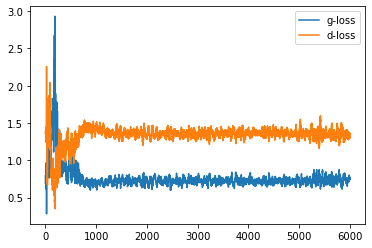

In [33]:
nph = np.array(history)

plt.plot(nph[:,0], label='g-loss')
plt.plot(nph[:,1], label='d-loss')
plt.legend()
plt.show()

In [39]:
nph = np.array(history)

plt.plot(nph[:,2], label='acc-real')
plt.plot(nph[:,3], label='acc-fak
plt.legend()e')
plt.show()

SyntaxError: EOL while scanning string literal (<ipython-input-39-1de3057ed035>, line 4)

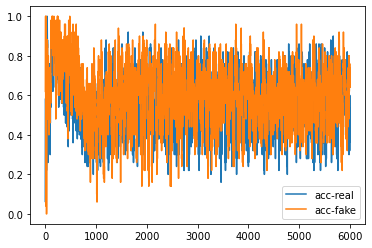

In [40]:
nph = np.array(history)

plt.plot(nph[:,2], label='acc-real')
plt.plot(nph[:,3], label='acc-fake')
plt.legend()
plt.show()

In [38]:
generator.save_weights('generator2_6000_weights')